In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install numpy scipy sklearn
!pip install jax
!pip install chex
!pip install attr
!pip install optax



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sklearn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
sys.path.append(r"C:\Users\zhossai3\Desktop\Fair_Imputation") 


import Utils
import CMI
import Inject_Missing_Values
import RR_imputer
import Sinkhorn_CMI
import SinkhornImputation
import SoftImpute



c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [3]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler

from Utils import *
from SoftImpute import softimpute, cv_softimpute
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import *
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from CMI import *
from Experiment import *
from sklearn.model_selection import KFold

from Inject_Missing_Values import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

**Load Data**

In [4]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
groundTruth = pd.read_csv(r'C:\Users\zhossai3\Desktop\Fair_Imputation\Data\Student_performance_data _.csv', delimiter=',', header=0)


In [5]:
groundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 261.8 KB


Checking Number of unique values

In [6]:
groundTruth.nunique()

Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

In [7]:
print("Age",groundTruth['Age'].unique())
print("Gender",groundTruth['Gender'].unique())
print("Ethnicity",groundTruth['Ethnicity'].unique())
print("ParentalEducation",groundTruth['ParentalEducation'].unique())
print("StudyTimeWeekly",groundTruth['StudyTimeWeekly'].unique())
print('Absences',groundTruth['Absences'].unique())
print('Tutoring',groundTruth['Tutoring'].unique())
print('ParentalSupport',groundTruth['ParentalSupport'].unique())
print('Extracurricular',groundTruth['Extracurricular'].unique())
print('Sports',groundTruth['Sports'].unique())
print('Music',groundTruth['Music'].unique())
print('Volunteering',groundTruth['Volunteering'].unique())
print('GPA',groundTruth['GPA'].unique())
print('GradeClass',groundTruth['GradeClass'].unique())

Age [17 18 15 16]
Gender [1 0]
Ethnicity [0 2 1 3]
ParentalEducation [2 1 3 4 0]
StudyTimeWeekly [19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]
Absences [ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]
Tutoring [1 0]
ParentalSupport [2 1 3 4 0]
Extracurricular [0 1]
Sports [0 1]
Music [1 0]
Volunteering [0 1]
GPA [2.92919559 3.04291483 0.11260225 ... 1.14233288 1.80329676 2.14001388]
GradeClass [2 1 4 3 0]


In [8]:
groundTruth.head(5)

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   17       1          0                  2        19.833723         7   
1   18       0          0                  1        15.408756         0   
2   15       0          2                  3         4.210570        26   
3   17       1          0                  3        10.028829        14   
4   17       1          0                  2         4.672495        17   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0         1                2                0       0      1             0   
1         0                1                0       0      0             0   
2         0                2                0       0      0             0   
3         0                3                1       0      0             0   
4         1                3                0       0      0             0   

        GPA  GradeClass  
0  2.929196           2  
1  3.042915           1  
2  0.112602           4  
3  2.054218           3  
4  1.288061           4

In [9]:
scaler = StandardScaler()
groundTruth_scaled = pd.DataFrame(scaler.fit_transform(groundTruth), columns=groundTruth.columns)
print(groundTruth_scaled)


           Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0     0.472919  0.978492  -0.853391           0.253711         1.780336   
1     1.362944 -1.021981  -0.853391          -0.746087         0.997376   
2    -1.307132 -1.021981   1.091641           1.253509        -0.984045   
3     0.472919  0.978492  -0.853391           1.253509         0.045445   
4     0.472919  0.978492  -0.853391           0.253711        -0.902311   
...        ...       ...        ...                ...              ...   
2387  1.362944  0.978492  -0.853391           1.253509         0.160762   
2388  0.472919 -1.021981  -0.853391          -0.746087        -0.387285   
2389 -0.417106  0.978492  -0.853391           0.253711        -0.524895   
2390 -0.417106  0.978492   0.119125          -1.745885         0.467950   
2391 -0.417106  0.978492  -0.853391           0.253711         1.424008   

      Absences  Tutoring  ParentalSupport  Extracurricular    Sports  \
0    -0.890822  1.522371   

In [10]:
X= groundTruth_scaled.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth_scaled.iloc[:, -1]  # Selects all rows and only the last column

Converting GroudTruth to Tensor

In [11]:
groundTruth_tensor = torch.tensor((groundTruth_scaled.to_numpy()))

In [12]:
print(torch.unique(groundTruth_tensor[:,0])) 
print(torch.unique(groundTruth_tensor[:,1]))# coloumn 1 is sex where 1 is male and 0 is female.after scaling male is 0.6703 and female is -1.4919

tensor([-1.3071, -0.4171,  0.4729,  1.3629])
tensor([-1.0220,  0.9785])


In [13]:
print("Age",groundTruth_scaled['Age'].unique())
print("Gender",groundTruth_scaled['Gender'].unique())
print("Ethnicity",groundTruth_scaled['Ethnicity'].unique())
print("ParentalEducation",groundTruth_scaled['ParentalEducation'].unique())
print("StudyTimeWeekly",groundTruth_scaled['StudyTimeWeekly'].unique())
print('Absences',groundTruth_scaled['Absences'].unique())
print('Tutoring',groundTruth_scaled['Tutoring'].unique())
print('ParentalSupport',groundTruth_scaled['ParentalSupport'].unique())
print('Extracurricular',groundTruth_scaled['Extracurricular'].unique())
print('Sports',groundTruth_scaled['Sports'].unique())
print('Music',groundTruth_scaled['Music'].unique())
print('Volunteering',groundTruth_scaled['Volunteering'].unique())
print('GPA',groundTruth_scaled['GPA'].unique())
print('GradeClass',groundTruth_scaled['GradeClass'].unique())

Age [ 0.47291901  1.36294441 -1.30713178 -0.41710638]
Gender [ 0.97849211 -1.02198065]
Ethnicity [-0.85339088  1.09164102  0.11912507  2.06415697]
ParentalEducation [ 0.25371131 -0.7460868   1.25350942  2.25330753 -1.74588491]
StudyTimeWeekly [ 1.78033552  0.99737625 -0.98404514 ... -0.52489493  0.46794965
  1.42400846]
Absences [-0.89082237 -1.71769358  1.35354235 -0.06395116  0.29042222 -0.536449
  0.88104451 -1.59956912 -0.41832454  0.0541733   0.76292005 -0.65457345
  0.17229776  1.70791572 -1.48144467  1.23541789  0.64479559 -1.12707129
 -0.77269791 -0.30020008  1.4716668   0.99916897 -1.36332021 -0.18207562
 -1.00894683  1.58979126 -1.24519575  0.40854668  0.52667113  1.11729343]
Tutoring [ 1.52237132 -0.65686997]
ParentalSupport [-0.10874395 -0.99955054  0.78206265  1.67286924 -1.89035714]
Extracurricular [-0.78847633  1.2682689 ]
Sports [-0.66013204  1.51484845]
Music [ 2.01954358 -0.49516139]
Volunteering [-0.43186565  2.31553495]
GPA [ 1.11808631  1.24237446 -1.96027719 ... -

In [14]:
print("minimum: ",groundTruth_tensor.min())
print("maximum:",groundTruth_tensor.max())
print("mean: ",groundTruth_tensor.mean())
print("median: ", groundTruth_tensor.median())

minimum:  tensor(-2.4186)
maximum: tensor(2.3155)
mean:  tensor(3.2675e-17)
median:  tensor(-0.4319)


Determining the appropriate columns for bucketization along with their respective bucket sizes, and identifying the variables X, Y, and Z for Conditional Mutual Information (CMI) computation.

In [15]:
bucket_specs = {
    0:4,
    1:2,
    2: 4,   
    4: 5,  # studytime weekly
    5: 5, #absances
    6: 2, #Tutoring
    


}

# Define multiple attributes for X, Y, Z
X_cols = [0,1,2]  # Bucketized sensitive attributes (e.g., sex, race, age)
Y_cols = [13]     # Bucketized outcome-related attributes
Z_cols = [4,5,6]  

**CMI for GroundTruth**

In [16]:
#groundTruth_tensor = groundTruth_tensor.float()
groundTruth_tensor.requires_grad=True
cmi_groundTruth = CMI.c_m_i(groundTruth_tensor,bucket_specs,X_cols, Y_cols, Z_cols)
print(cmi_groundTruth)

tensor(0.4473, grad_fn=<ClampBackward1>)


Generating MCAR 25%, and added the target coloumn with the 25% missing MCAR data

In [17]:
generator_mcar25 = Inject_Missing_Values()
miss_mcar25,index_mcar25 = generator_mcar25.MCAR(X,missing_rate=25)
print(type(miss_mcar25))
total_missing_percentage_mcar25= miss_mcar25.isnull().sum().sum() / miss_mcar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mcar25:.2f}%")

missing_percentage = (miss_mcar25.isnull().sum() / len(miss_mcar25)) * 100
print(missing_percentage)

miss_mcar25 = pd.concat([miss_mcar25, Y], axis=1) #adding the target coloumn

<class 'pandas.core.frame.DataFrame'>
Total Missing Percentage MAR25: 25.00%
Age                  25.418060
Gender               23.369565
Ethnicity            26.045151
ParentalEducation    25.919732
StudyTimeWeekly      25.877926
Absences             24.498328
Tutoring             25.627090
ParentalSupport      24.707358
Extracurricular      24.581940
Sports               24.080268
Music                24.707358
Volunteering         25.083612
GPA                  25.083612
dtype: float64


In [18]:
miss_mcar25_numpy = scale(miss_mcar25) #z-score scaling
#miss_mcar25_numpy = miss_mcar25.to_numpy()
miss_mcar25_tensor = torch.tensor(miss_mcar25_numpy) #converting to tensor

In [19]:
print(torch.unique(miss_mcar25_tensor[:,1]))

tensor([-1.0293,  0.9715,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     n

Applying Sinkhorn algorithm to MCAR 25% data

In [20]:
#only Sinkhorn
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
print(epsilon_mcar25)
mask_mcar25 = torch.isnan(miss_mcar25_tensor).double()


on_sk_imputer_mcar25 = SinkhornImputation(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mcar25, on_sk_maes25mcar, on_sk_rmses25mcar = on_sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mcar25_numpy = on_sk_imp_mcar25.detach().cpu().numpy()
on_sk_mae_mcar25 = MAE(on_sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
on_sk_rmse_mcar25 = RMSE(on_sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print("MAE:", on_sk_mae_mcar25)


0.511514119038161


INFO:root:batchsize = 128, epsilon = 0.5115
INFO:root:Iteration 0:	 Loss: 3.3792	 Validation MAE: 0.8692	RMSE: 1.0044
INFO:root:Iteration 50:	 Loss: 3.2433	 Validation MAE: 0.8259	RMSE: 0.9959
INFO:root:Iteration 100:	 Loss: 3.1436	 Validation MAE: 0.8062	RMSE: 0.9930
INFO:root:Iteration 150:	 Loss: 3.0439	 Validation MAE: 0.7921	RMSE: 0.9897
INFO:root:Iteration 200:	 Loss: 3.3301	 Validation MAE: 0.7809	RMSE: 0.9883
INFO:root:Iteration 250:	 Loss: 3.0304	 Validation MAE: 0.7727	RMSE: 0.9871
INFO:root:Iteration 300:	 Loss: 3.1984	 Validation MAE: 0.7649	RMSE: 0.9862
INFO:root:Iteration 350:	 Loss: 3.1632	 Validation MAE: 0.7608	RMSE: 0.9876
INFO:root:Iteration 400:	 Loss: 3.2237	 Validation MAE: 0.7567	RMSE: 0.9878
INFO:root:Iteration 450:	 Loss: 3.2517	 Validation MAE: 0.7535	RMSE: 0.9895
INFO:root:Iteration 500:	 Loss: 3.1674	 Validation MAE: 0.7497	RMSE: 0.9898
INFO:root:Iteration 550:	 Loss: 3.0241	 Validation MAE: 0.7479	RMSE: 0.9905
INFO:root:Iteration 600:	 Loss: 3.0824	 Validat

MAE: tensor(0.7389, grad_fn=<DivBackward0>)


Calculating CMI after applying the Sinkhorn Imputation (only Sinkhorn algorithm)

In [21]:
#only CMI
on_cmi_missmcar25 = CMI.c_m_i(on_sk_imp_mcar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:", on_cmi_missmcar25)
print("MAE:",on_sk_mae_mcar25)

CMI: tensor(0.4169, grad_fn=<ClampBackward1>)
MAE: tensor(0.7389, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MCAR 25%

In [22]:
#sinkhorn_CMI
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mcar25)
mask_mcar25  = torch.isnan(miss_mcar25_tensor).double()


sk_imputer_mcar25 = SinkhornImputation_CMI(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi = 500)
sk_imp_mcar25, sk_maes25mcar, sk_rmses25mcar,cmi_loss_mcar25,sinkhorn_loss_mcar25, lamda_cmi_mcar25 = sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mcar25_numpy = sk_imp_mcar25.detach().cpu().numpy()

sk_mae_mcar25 = MAE(sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
sk_rmse_mcar25 = RMSE(sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print("MAE:",sk_mae_mcar25)





0.5142443770647247


INFO:root:Iteration 0:	 Loss: 3.4974	 Validation MAE: 0.8682	RMSE: 1.0031
INFO:root:Iteration 50:	 Loss: 3.6188	 Validation MAE: 0.8284	RMSE: 1.0106
INFO:root:Iteration 100:	 Loss: 3.6388	 Validation MAE: 0.8093	RMSE: 1.0051
INFO:root:Iteration 150:	 Loss: 3.5248	 Validation MAE: 0.7989	RMSE: 1.0031
INFO:root:Iteration 200:	 Loss: 3.8995	 Validation MAE: 0.7922	RMSE: 1.0025
INFO:root:Iteration 250:	 Loss: 3.6717	 Validation MAE: 0.7876	RMSE: 1.0033
INFO:root:Iteration 300:	 Loss: 4.1128	 Validation MAE: 0.7837	RMSE: 1.0036
INFO:root:Iteration 350:	 Loss: 3.7842	 Validation MAE: 0.7808	RMSE: 1.0052
INFO:root:Iteration 400:	 Loss: 3.9830	 Validation MAE: 0.7779	RMSE: 1.0053
INFO:root:Iteration 450:	 Loss: 4.2544	 Validation MAE: 0.7769	RMSE: 1.0069
INFO:root:Iteration 500:	 Loss: 4.0334	 Validation MAE: 0.7758	RMSE: 1.0071
INFO:root:Iteration 550:	 Loss: 3.9571	 Validation MAE: 0.7740	RMSE: 1.0077
INFO:root:Iteration 600:	 Loss: 4.1524	 Validation MAE: 0.7736	RMSE: 1.0093
INFO:root:Itera

MAE: tensor(1.0534, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [23]:
#CMI
sk_cmi_mcar25 = CMI.c_m_i(sk_imp_mcar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",sk_cmi_mcar25)
print("MAE",sk_mae_mcar25)

CMI tensor(0.0001, grad_fn=<ClampBackward1>)
MAE tensor(1.0534, grad_fn=<DivBackward0>)


In [24]:
print(mask_mcar25)

tensor([[0., 1., 1.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])


Mean imputation, MAE and CMI

In [25]:

mean_imp_mcar25 = SimpleImputer().fit_transform(miss_mcar25_tensor)
mean_imp_mcar25_torch = torch.tensor(mean_imp_mcar25)
mean_mae_mcar25 = MAE(mean_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)

print("MAE",mean_mae_mcar25)

cmi_mean_mcar25 = CMI.c_m_i(mean_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_mean_mcar25)

MAE tensor(0.8672, grad_fn=<DivBackward0>)
CMI tensor(0.5279, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [26]:
ice_imp_mcar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mcar25_tensor)
ice_imp_mcar25_torch = torch.tensor(ice_imp_mcar25)
ice_mae_mcar25 = MAE(ice_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)
print("MAE",ice_mae_mcar25)

cmi_ice_mcar25 = CMI.c_m_i(ice_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_ice_mcar25)

MAE tensor(0.8267, grad_fn=<DivBackward0>)
CMI tensor(0.4024, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [27]:
cv_error_mcar25, grid_lambda_mcar25 = cv_softimpute(miss_mcar25_numpy, grid_len=15)
lbda_mcar25 = grid_lambda_mcar25[np.argmin(cv_error_mcar25)]
soft_imp_mcar25 = softimpute((miss_mcar25_numpy), lbda_mcar25)[1]
soft_imp_mcar25_torch = torch.tensor(soft_imp_mcar25)

soft_mae_mcar25 = MAE(soft_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)
print("MAE",soft_mae_mcar25)

cmi_soft_mcar25 = CMI.c_m_i(soft_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_soft_mcar25)

MAE tensor(0.7841, grad_fn=<DivBackward0>)
CMI tensor(0.4030, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Iteration

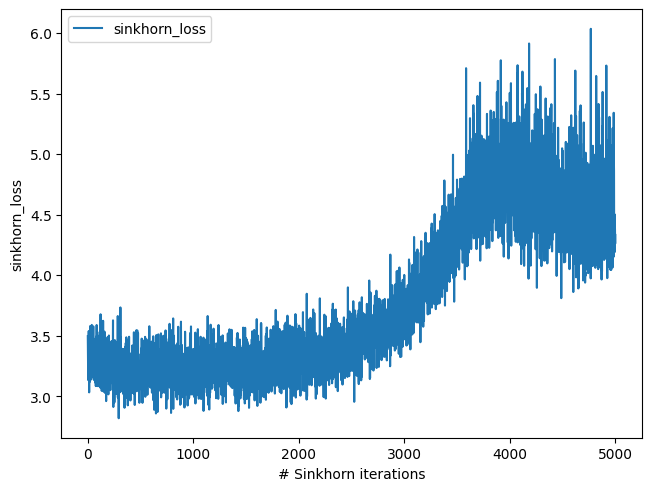

In [28]:
sinkhorn_loss_mcar25 = torch.tensor(sinkhorn_loss_mcar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mcar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

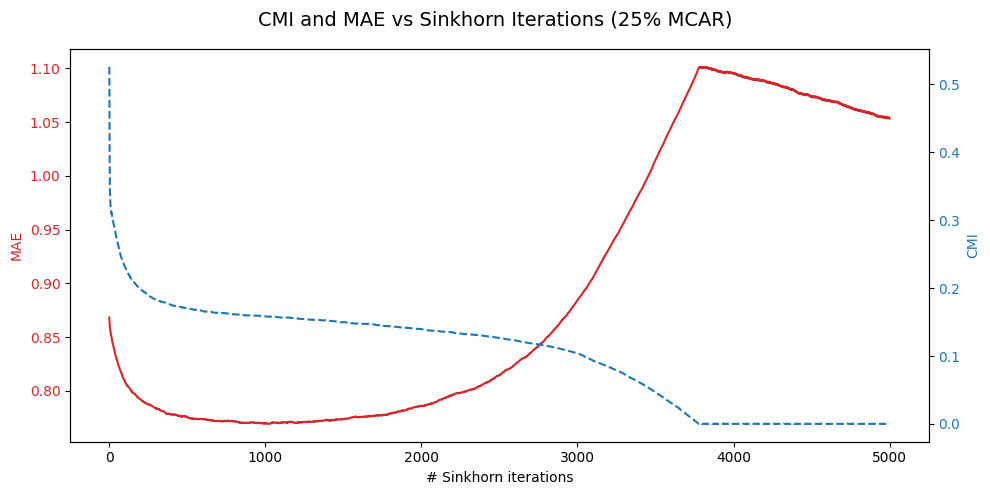

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mcar25
mae_array = sk_maes25mcar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MCAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

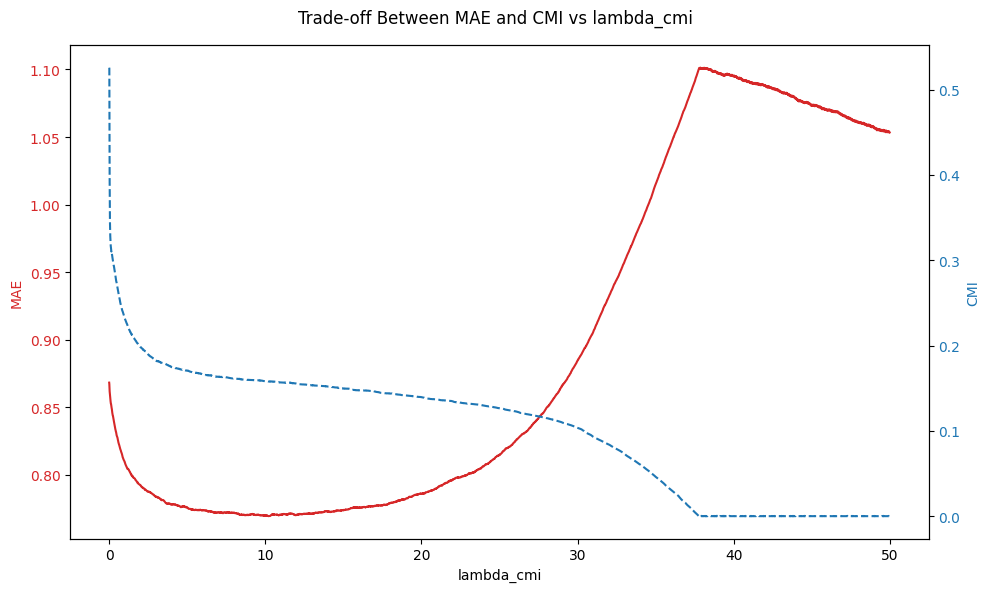

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mcar25 # list of length 2000 from your model
mae_history = sk_maes25mcar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mcar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


In [31]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert to arrays
mae_array_mcar25 = np.array(sk_maes25mcar)
cmi_array_mcar25 = np.array(cmi_loss_mcar25)
lambda_array_mcar25 = np.array(lamda_cmi_mcar25)

# OPTIONAL: Skip very low lambda values (e.g., lambda = 0)
min_index = 10  # or 0 if you want to include everything

# ---- Option 1: Visual Match (Rescale CMI to MAE's range) ----
min_mae_mcar25, max_mae_mcar25 = mae_array_mcar25.min(), mae_array_mcar25.max()
min_cmi_mcar25, max_cmi_mcar25 = cmi_array_mcar25.min(), cmi_array_mcar25.max()

# Rescale CMI to the MAE axis range
cmi_rescaled_mcar25 = (cmi_array_mcar25 - min_cmi_mcar25) / (max_cmi_mcar25 - min_cmi_mcar25) * (max_mae_mcar25 - min_mae_mcar25) + min_mae_mcar25

# Compute difference between MAE and rescaled CMI
diff_mcar25 = np.abs(mae_array_mcar25[min_index:] - cmi_rescaled_mcar25[min_index:])
intersection_idx_mcar25 = np.argmin(diff_mcar25) + min_index  # add offset

# ---- Extract Values at Intersection ----
lambda_intersection_mcra25 = lambda_array_mcar25[intersection_idx_mcar25]
mae_val_mcar25 = mae_array_mcar25[intersection_idx_mcar25]
cmi_val_mcar25 = cmi_array_mcar25[intersection_idx_mcar25]

# ---- Display Result ----
print("Estimated Visual Intersection Point MCAR25:")
print(f"  lambda_cmi_mcar25 = {lambda_intersection_mcra25:.4f}")
print(f"  MAE_mcar25        = {mae_val_mcar25:.4f}")
print(f"  CMI_mcar25        = {cmi_val_mcar25:.4f}")


Estimated Visual Intersection Point MCAR25:
  lambda_cmi_mcar25 = 27.5600
  MAE_mcar25        = 0.8430
  CMI_mcar25        = 0.1169


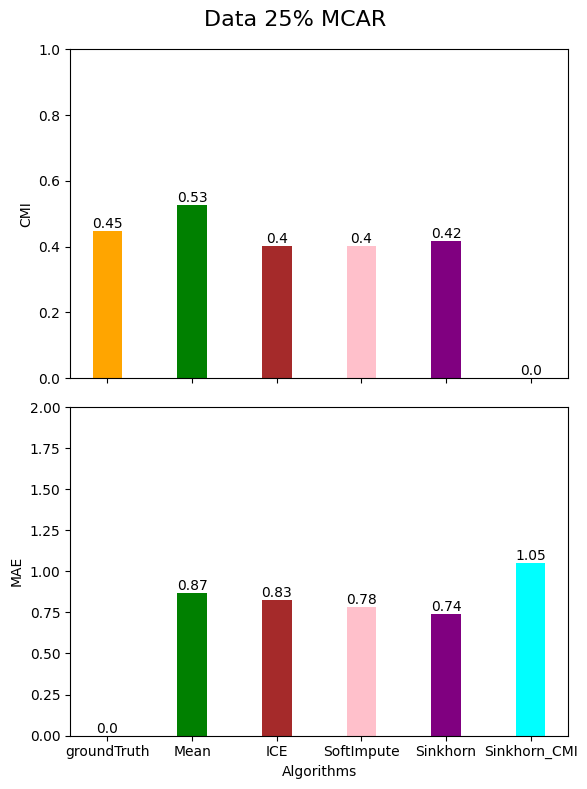

In [32]:

# Define values and categories
values_cmi_mcar25 = [cmi_groundTruth.detach(),cmi_mean_mcar25.detach(),cmi_ice_mcar25.detach(),cmi_soft_mcar25.detach(),on_cmi_missmcar25.detach(),sk_cmi_mcar25.detach()]
values_maes_mcar25 = [0.0,mean_mae_mcar25.detach(),ice_mae_mcar25.detach(), soft_mae_mcar25.detach(),on_sk_mae_mcar25.detach(),sk_mae_mcar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MCAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mcar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mcar25, color=colors, width=bar_width)
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


**25% MAR**

In [33]:
mean_gpa = groundTruth_scaled["GPA"].mean()

dependencies_mar = {"ParentalEducation": {
        "influencers": ["Ethnicity"],
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Ethnicity"]<1 else 0.1
    },
    "ParentalSupport": {
        "influencers": ["Gender"],
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"]==0.97849211 else 0.1 
    },
    "StudyTimeWeekly": {
        "influencers": ["GPA"],
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["GPA"]<=mean_gpa else 0.1 
    },
    "Absences": {
        "influencers": ["Tutoring"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Tutoring"]==1.52237132 else 0.1
    },
    "Extracurricular": {
        "influencers": ["Gender"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"]==0.97849211 else 0.1 
    },
    
    "Volunteering": {
        "influencers": ["Age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Age"]<=0.47 else 0.1
    },

    "Sports": {
        "influencers": ["Gender"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"]==0.97849211 else 0.1 
    },


     "Music": {
        "influencers": ["Ethnicity"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Ethnicity"]<=1.09164102 else 0.1 
    }
     
}


Generating MAR 25%, and added the target coloumn with the 25% missing MAR data

In [34]:
generator_mar25 = Inject_Missing_Values()
miss_mar25,index_mar25 = generator_mar25.MAR(X,dependencies_mar,missing_rate=25)
miss_mar25 = pd.concat([miss_mar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mar25 = miss_mar25.isnull().sum().sum() / miss_mar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

Total Missing Percentage MAR25: 23.21%


In [35]:
missing_percentage = (miss_mar25.isnull().sum() / len(miss_mar25)) * 100
print(missing_percentage)

Age                   0.000000
Gender                0.000000
Ethnicity             0.000000
ParentalEducation    60.660535
StudyTimeWeekly      51.630435
Absences             23.871237
Tutoring              0.000000
ParentalSupport      25.250836
Extracurricular      25.041806
Sports               25.209030
Music                60.827759
Volunteering         52.508361
GPA                   0.000000
GradeClass            0.000000
dtype: float64


In [36]:
miss_mar25_numpy = miss_mar25.to_numpy()
miss_mar25_tensor = torch.tensor(miss_mar25_numpy) #converting to tensor

In [37]:
print(miss_mar25.head(5))

        Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0  0.472919  0.978492  -0.853391           0.253711         1.780336   
1  1.362944 -1.021981  -0.853391                NaN         0.997376   
2 -1.307132 -1.021981   1.091641           1.253509              NaN   
3  0.472919  0.978492  -0.853391                NaN         0.045445   
4  0.472919  0.978492  -0.853391                NaN              NaN   

   Absences  Tutoring  ParentalSupport  Extracurricular    Sports     Music  \
0 -0.890822  1.522371              NaN        -0.788476       NaN       NaN   
1       NaN -0.656870        -0.999551              NaN -0.660132 -0.495161   
2  1.353542 -0.656870        -0.108744        -0.788476       NaN -0.495161   
3 -0.063951 -0.656870         0.782063              NaN -0.660132       NaN   
4  0.290422  1.522371         0.782063        -0.788476       NaN       NaN   

   Volunteering       GPA  GradeClass  
0     -0.431866  1.118086   -0.797387  
1     -0.431

Applying Sinkhorn algorithm to MAR 25% data

In [38]:
#only Sinkhorn
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
print(epsilon_mar25)
mask_mar25= torch.isnan(miss_mar25_tensor).double()


on_sk_imputer_mar25 = SinkhornImputation(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mar25, on_sk_maes25mar, on_sk_rmses25mar = on_sk_imputer_mar25.fit_transform(miss_mar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mar25_numpy = on_sk_imp_mar25.detach().cpu().numpy()
on_sk_mae_mar25 = MAE(on_sk_imp_mar25,groundTruth_tensor , mask_mar25)
on_sk_rmse_mar25 = RMSE(on_sk_imp_mar25, groundTruth_tensor, mask_mar25)
print("MAE:",on_sk_mae_mar25)

INFO:root:batchsize = 128, epsilon = 0.5121


0.5120915332428121


INFO:root:Iteration 0:	 Loss: 2.9897	 Validation MAE: 0.8264	RMSE: 1.0040
INFO:root:Iteration 50:	 Loss: 2.8766	 Validation MAE: 0.7872	RMSE: 0.9983


INFO:root:Iteration 100:	 Loss: 3.1180	 Validation MAE: 0.7667	RMSE: 0.9943
INFO:root:Iteration 150:	 Loss: 3.1349	 Validation MAE: 0.7551	RMSE: 0.9939
INFO:root:Iteration 200:	 Loss: 2.8845	 Validation MAE: 0.7451	RMSE: 0.9931
INFO:root:Iteration 250:	 Loss: 3.1365	 Validation MAE: 0.7387	RMSE: 0.9943
INFO:root:Iteration 300:	 Loss: 2.8609	 Validation MAE: 0.7332	RMSE: 0.9953
INFO:root:Iteration 350:	 Loss: 3.0461	 Validation MAE: 0.7276	RMSE: 0.9953
INFO:root:Iteration 400:	 Loss: 3.1406	 Validation MAE: 0.7226	RMSE: 0.9955
INFO:root:Iteration 450:	 Loss: 3.1082	 Validation MAE: 0.7178	RMSE: 0.9959
INFO:root:Iteration 500:	 Loss: 3.1365	 Validation MAE: 0.7128	RMSE: 0.9962
INFO:root:Iteration 550:	 Loss: 2.8967	 Validation MAE: 0.7099	RMSE: 0.9971
INFO:root:Iteration 600:	 Loss: 3.0682	 Validation MAE: 0.7072	RMSE: 0.9971
INFO:root:Iteration 650:	 Loss: 3.0814	 Validation MAE: 0.7056	RMSE: 0.9979
INFO:root:Iteration 700:	 Loss: 2.8464	 Validation MAE: 0.7046	RMSE: 0.9982
INFO:root:It

MAE: tensor(0.6966, grad_fn=<DivBackward0>)


CMI for Sinkhorn Imputation

In [39]:
#only CMI
on_cmi_missmar25 = CMI.c_m_i(on_sk_imp_mar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",on_cmi_missmar25)
print("MAE:",on_sk_mae_mar25)

CMI: tensor(0.3582, grad_fn=<ClampBackward1>)
MAE: tensor(0.6966, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MAR 25% data

In [40]:
#sinkhorn_CMI
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mar25)
mask_mar25 = torch.isnan(miss_mar25_tensor).double()



sk_imputer_mar25 = SinkhornImputation_CMI(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi = 500)
sk_imp_mar25, sk_maes25mar, sk_rmses25mar,cmi_loss_mar25,sinkhorn_loss_mar25,lamda_cmi_mar25 = sk_imputer_mar25.fit_transform(miss_mar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mar25_numpy = sk_imp_mar25.detach().cpu().numpy()

sk_mae_mar25 = MAE(sk_imp_mar25,groundTruth_tensor , mask_mar25)
sk_rmse_mar25 = RMSE(sk_imp_mar25, groundTruth_tensor, mask_mar25)
print("MAE:",sk_mae_mar25)


0.5093479885574137


INFO:root:Iteration 0:	 Loss: 3.4070	 Validation MAE: 0.8249	RMSE: 1.0034


INFO:root:Iteration 50:	 Loss: 3.1606	 Validation MAE: 0.7871	RMSE: 1.0008
INFO:root:Iteration 100:	 Loss: 3.3851	 Validation MAE: 0.7716	RMSE: 1.0023
INFO:root:Iteration 150:	 Loss: 3.1142	 Validation MAE: 0.7635	RMSE: 1.0055
INFO:root:Iteration 200:	 Loss: 3.3637	 Validation MAE: 0.7571	RMSE: 1.0089
INFO:root:Iteration 250:	 Loss: 3.4185	 Validation MAE: 0.7530	RMSE: 1.0126
INFO:root:Iteration 300:	 Loss: 3.4212	 Validation MAE: 0.7495	RMSE: 1.0156
INFO:root:Iteration 350:	 Loss: 3.6629	 Validation MAE: 0.7464	RMSE: 1.0177
INFO:root:Iteration 400:	 Loss: 3.7787	 Validation MAE: 0.7438	RMSE: 1.0195
INFO:root:Iteration 450:	 Loss: 4.1848	 Validation MAE: 0.7419	RMSE: 1.0223
INFO:root:Iteration 500:	 Loss: 3.9262	 Validation MAE: 0.7405	RMSE: 1.0245
INFO:root:Iteration 550:	 Loss: 3.7174	 Validation MAE: 0.7387	RMSE: 1.0258
INFO:root:Iteration 600:	 Loss: 4.0070	 Validation MAE: 0.7379	RMSE: 1.0274
INFO:root:Iteration 650:	 Loss: 4.4906	 Validation MAE: 0.7362	RMSE: 1.0280
INFO:root:Ite

MAE: tensor(0.7341, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [41]:
#CMI
cmi_mar25 = CMI.c_m_i(sk_imp_mar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mar25)
print("MAE:",sk_mae_mar25)

CMI: tensor(0.1801, grad_fn=<ClampBackward1>)
MAE: tensor(0.7341, grad_fn=<DivBackward0>)


Mean Imputation, CMI and MAE

In [42]:

mean_imp_mar25 = SimpleImputer().fit_transform(miss_mar25_tensor)
mean_imp_mar25_torch = torch.tensor(mean_imp_mar25)
mean_mae_mar25 = MAE(mean_imp_mar25_torch, groundTruth_tensor , mask_mar25)

print("MAE:",mean_mae_mar25)

cmi_mean_mar25 = CMI.c_m_i(mean_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mean_mar25)

MAE: tensor(0.8240, grad_fn=<DivBackward0>)
CMI: tensor(0.4340, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [43]:
ice_imp_mar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mar25_tensor)
ice_imp_mar25_torch = torch.tensor(ice_imp_mar25)
ice_mae_mar25 = MAE(ice_imp_mar25_torch, groundTruth_tensor , mask_mar25)
print("MAE:",ice_mae_mar25)

cmi_ice_mar25 = CMI.c_m_i(ice_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_ice_mar25)

MAE: tensor(0.7944, grad_fn=<DivBackward0>)
CMI: tensor(0.4071, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [44]:
cv_error_mar25, grid_lambda_mar25 = cv_softimpute(miss_mar25_numpy, grid_len=15)
lbda_mar25 = grid_lambda_mar25[np.argmin(cv_error_mar25)]
soft_imp_mar25 = softimpute((miss_mar25_numpy), lbda_mar25)[1]
soft_imp_mar25_torch = torch.tensor(soft_imp_mar25)

soft_mae_mar25 = MAE(soft_imp_mar25_torch, groundTruth_tensor , mask_mar25)
print("MAE:",soft_mae_mar25)

cmi_soft_mar25 = CMI.c_m_i(soft_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_soft_mar25)

MAE: tensor(0.7741, grad_fn=<DivBackward0>)
CMI: tensor(0.3498, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Iterations

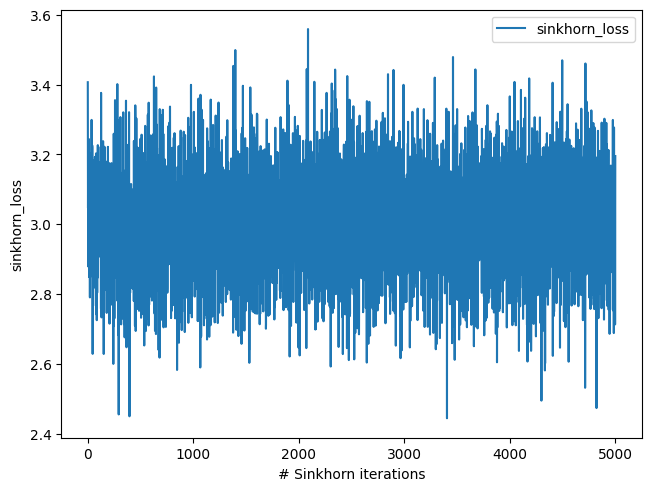

In [45]:
sinkhorn_loss_mar25 = torch.tensor(sinkhorn_loss_mar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

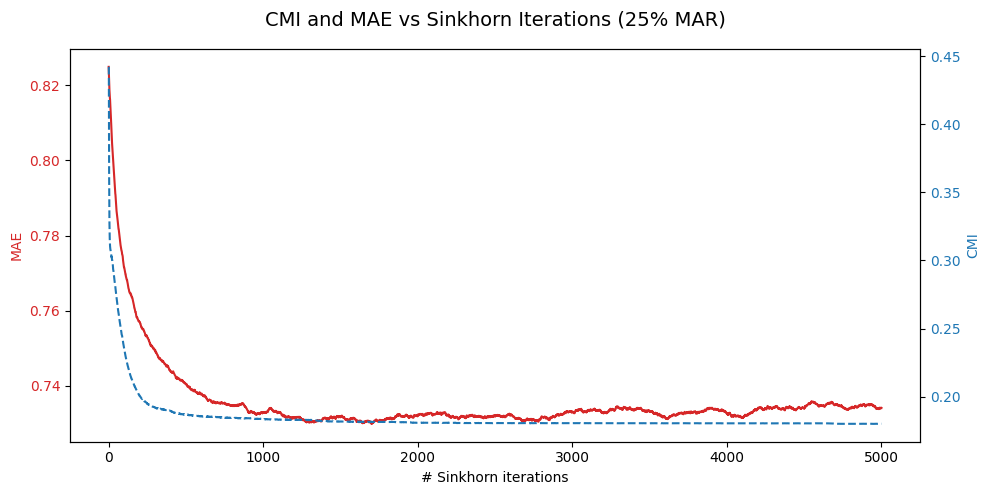

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mar25
mae_array = sk_maes25mar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

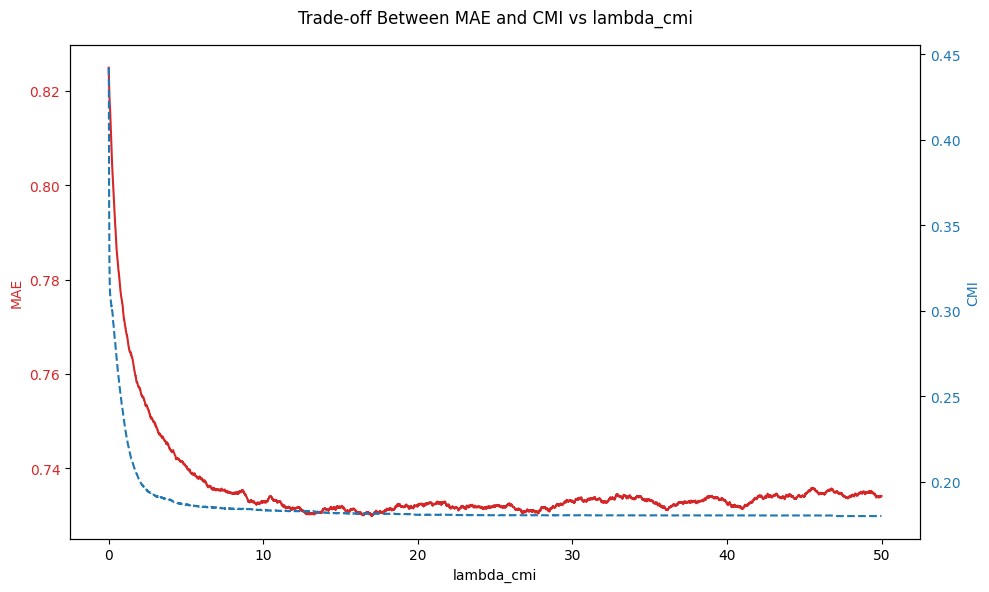

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mar25 # list of length 2000 from your model
mae_history = sk_maes25mar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


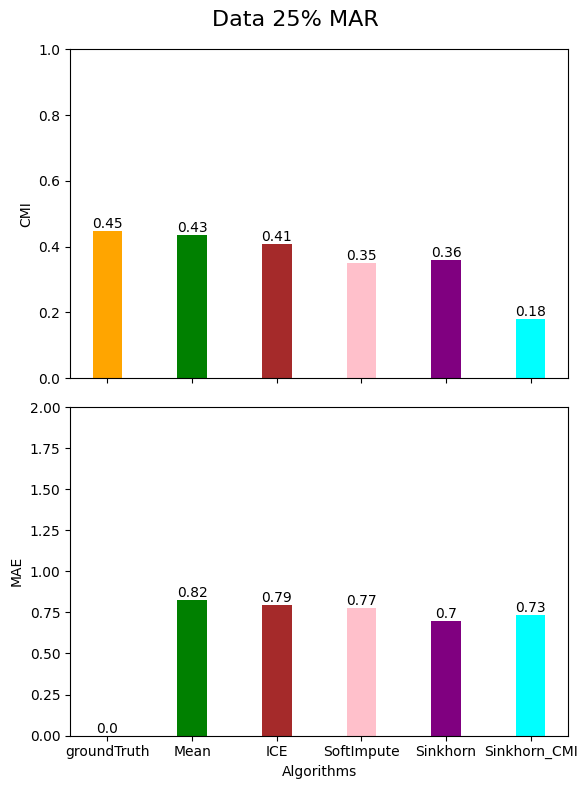

In [48]:

# Define values and categories
values_cmi_mar25 = [cmi_groundTruth.detach(),cmi_mean_mar25.detach(),cmi_ice_mar25.detach(),cmi_soft_mar25.detach(),on_cmi_missmar25.detach(),cmi_mar25.detach()]
values_maes_mar25 = [0.0,mean_mae_mar25.detach(),ice_mae_mar25.detach(), soft_mae_mar25.detach(),on_sk_mae_mar25.detach(),sk_mae_mar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mar25, color=colors, width=bar_width)
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show() #display 


**25% MNAR**

In [49]:
mean_ParentalEducation = groundTruth_scaled["ParentalEducation"].mean()
median_ParentalSupport = groundTruth_scaled["ParentalSupport"].median()
mean_StudyTimeWeekly = groundTruth_scaled["StudyTimeWeekly"].median()
mean_Absences = groundTruth_scaled["Absences"].median()
median_gpa = groundTruth_scaled["GPA"].median()






dependencies_mnar = {"ParentalEducation": {
       
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["ParentalEducation"] < mean_ParentalEducation else 0.1
    },
    "ParentalSupport": {
        
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["ParentalSupport"]>= median_ParentalSupport else 0.1 
    },
    "StudyTimeWeekly": {
        
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["StudyTimeWeekly"] <= mean_StudyTimeWeekly  else 0.1 
    },
    "Absences": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Absences"] >= mean_Absences else 0.1
    },
    "Extracurricular": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Extracurricular"] == 1.2682689 else 0.1 
    },
    
    "Volunteering": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Volunteering"] == 2.31553495 else 0.1
    },

    "Sports": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Sports"] == 1.51484845 else 0.1 
    },


    "Music": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Music"] == 2.01954358 else 0.1 
    },
    "Age": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Age"] < 0.47 else 0.1 
    },
    "Gender": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"] == 0.97849211 else 0.1 
    },
    "GPA": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["GPA"] >= median_gpa else 0.1 
    },

    "Ethnicity": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Ethnicity"] < 1.09164102 else 0.1 
    }
     



}



Generating MNAR 25%, and added the target coloumn with the 25% missing MNAR data

In [50]:
generator_mnar25 = Inject_Missing_Values()
miss_mnar25,index_mnar25 = generator_mnar25.MNAR(X,dependencies_mnar,missing_rate=25)

miss_mnar25 = pd.concat([miss_mnar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mnar25 = miss_mnar25.isnull().sum().sum() / miss_mnar25.size * 100
print(f"Total Missing Percentage MNAR25: {total_missing_percentage_mnar25:.2f}%")

Total Missing Percentage MNAR25: 23.21%


In [51]:
missing_percentage = (miss_mnar25.isnull().sum() / len(miss_mnar25)) * 100
print(missing_percentage)

Age                  35.535117
Gender               14.924749
Ethnicity            41.764214
ParentalEducation    30.058528
StudyTimeWeekly      33.737458
Absences             34.489967
Tutoring              0.000000
ParentalSupport      41.931438
Extracurricular      13.754181
Sports               15.008361
Music                14.088629
Volunteering         15.217391
GPA                  34.489967
GradeClass            0.000000
dtype: float64


In [52]:
miss_mnar25_numpy = miss_mnar25.to_numpy()
miss_mnar25_tensor = torch.tensor(miss_mnar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MNAR 25% data

In [53]:
#only Sinkhorn
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
print(epsilon_mnar25)
mask_mnar25= torch.isnan(miss_mnar25_tensor).double()


on_sk_imputer_mnar25 = SinkhornImputation(eps=epsilon_mnar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mnar25, on_sk_maes25mnar, on_sk_rmses25mnar = on_sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mnar25_numpy = on_sk_imp_mnar25.detach().cpu().numpy()
on_sk_mae_mnar25 = MAE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
on_sk_rmse_mnar25 = RMSE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print("MAE:",on_sk_mae_mnar25)

INFO:root:batchsize = 128, epsilon = 0.5129


0.5129307494254284


INFO:root:Iteration 0:	 Loss: 3.2178	 Validation MAE: 0.9380	RMSE: 1.0790
INFO:root:Iteration 50:	 Loss: 3.1494	 Validation MAE: 0.9104	RMSE: 1.0686


INFO:root:Iteration 100:	 Loss: 3.2470	 Validation MAE: 0.8963	RMSE: 1.0624
INFO:root:Iteration 150:	 Loss: 3.1690	 Validation MAE: 0.8847	RMSE: 1.0553
INFO:root:Iteration 200:	 Loss: 3.3025	 Validation MAE: 0.8745	RMSE: 1.0499
INFO:root:Iteration 250:	 Loss: 3.1464	 Validation MAE: 0.8671	RMSE: 1.0466
INFO:root:Iteration 300:	 Loss: 3.1039	 Validation MAE: 0.8613	RMSE: 1.0439
INFO:root:Iteration 350:	 Loss: 3.2402	 Validation MAE: 0.8555	RMSE: 1.0410
INFO:root:Iteration 400:	 Loss: 2.8834	 Validation MAE: 0.8506	RMSE: 1.0393
INFO:root:Iteration 450:	 Loss: 3.4584	 Validation MAE: 0.8451	RMSE: 1.0362
INFO:root:Iteration 500:	 Loss: 3.1359	 Validation MAE: 0.8410	RMSE: 1.0345
INFO:root:Iteration 550:	 Loss: 2.9451	 Validation MAE: 0.8390	RMSE: 1.0350
INFO:root:Iteration 600:	 Loss: 3.3184	 Validation MAE: 0.8345	RMSE: 1.0329
INFO:root:Iteration 650:	 Loss: 2.9692	 Validation MAE: 0.8314	RMSE: 1.0318
INFO:root:Iteration 700:	 Loss: 2.9077	 Validation MAE: 0.8278	RMSE: 1.0303
INFO:root:It

MAE: tensor(0.8064, grad_fn=<DivBackward0>)


CMI for Sinkhorn Imputation

In [54]:
#only CMI
on_cmi_missmnar25 = CMI.c_m_i(on_sk_imp_mnar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",on_cmi_missmnar25)
print("MAE:",on_sk_mae_mnar25)

CMI: tensor(0.4394, grad_fn=<ClampBackward1>)
MAE: tensor(0.8064, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MNAR 25% data

In [55]:
#sinkhorn_CMI
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mnar25)
mask_mnar25 = torch.isnan(miss_mnar25_tensor).double()


sk_imputer_mnar25 = SinkhornImputation_CMI(eps = epsilon_mnar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi=500)
sk_imp_mnar25, sk_maes25mnar, sk_rmses25mnar,cmi_loss_mnar25, sinkhorn_loss_mnar25, lamda_cmi_mnar25 = sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mnar25_numpy = sk_imp_mnar25.detach().cpu().numpy()

sk_mae_mnar25 = MAE(sk_imp_mnar25, groundTruth_tensor , mask_mnar25)
sk_rmse_mnar25 = RMSE(sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print("MAE:",sk_mae_mnar25)





0.5148073829241437


INFO:root:Iteration 0:	 Loss: 3.3804	 Validation MAE: 0.9388	RMSE: 1.0806


INFO:root:Iteration 50:	 Loss: 3.5377	 Validation MAE: 0.9163	RMSE: 1.0875
INFO:root:Iteration 100:	 Loss: 3.7630	 Validation MAE: 0.8992	RMSE: 1.0780
INFO:root:Iteration 150:	 Loss: 3.4533	 Validation MAE: 0.8862	RMSE: 1.0713
INFO:root:Iteration 200:	 Loss: 3.7478	 Validation MAE: 0.8766	RMSE: 1.0657
INFO:root:Iteration 250:	 Loss: 3.6792	 Validation MAE: 0.8701	RMSE: 1.0623
INFO:root:Iteration 300:	 Loss: 4.0163	 Validation MAE: 0.8656	RMSE: 1.0611
INFO:root:Iteration 350:	 Loss: 3.9733	 Validation MAE: 0.8609	RMSE: 1.0585
INFO:root:Iteration 400:	 Loss: 4.0683	 Validation MAE: 0.8566	RMSE: 1.0567
INFO:root:Iteration 450:	 Loss: 4.3277	 Validation MAE: 0.8541	RMSE: 1.0567
INFO:root:Iteration 500:	 Loss: 4.2023	 Validation MAE: 0.8520	RMSE: 1.0566
INFO:root:Iteration 550:	 Loss: 4.3586	 Validation MAE: 0.8500	RMSE: 1.0563
INFO:root:Iteration 600:	 Loss: 4.5211	 Validation MAE: 0.8491	RMSE: 1.0570
INFO:root:Iteration 650:	 Loss: 4.6066	 Validation MAE: 0.8470	RMSE: 1.0574
INFO:root:Ite

MAE: tensor(1.1651, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [56]:
#CMI
cmi_mnar25 = CMI.c_m_i(sk_imp_mnar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mnar25)
print("MAE:",sk_mae_mnar25)

CMI: tensor(0.0002, grad_fn=<ClampBackward1>)
MAE: tensor(1.1651, grad_fn=<DivBackward0>)


Mean Imputation, CMI and MAE

In [57]:

mean_imp_mnar25 = SimpleImputer().fit_transform(miss_mnar25_tensor)
mean_imp_mnar25_torch = torch.tensor(mean_imp_mnar25)
mean_mae_mnar25 = MAE(mean_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)

print("MAE:",mean_mae_mnar25)

cmi_mean_mnar25 = CMI.c_m_i(mean_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mean_mnar25)

MAE: tensor(0.9374, grad_fn=<DivBackward0>)
CMI: tensor(0.4994, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [58]:
ice_imp_mnar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mnar25_tensor)
ice_imp_mnar25_torch = torch.tensor(ice_imp_mnar25)
ice_mae_mnar25 = MAE(ice_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)
print("MAE:",ice_mae_mnar25)

cmi_ice_mnar25 = CMI.c_m_i(ice_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_ice_mnar25)

MAE: tensor(0.8173, grad_fn=<DivBackward0>)
CMI: tensor(0.4549, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [59]:
cv_error_mnar25, grid_lambda_mnar25 = cv_softimpute(miss_mnar25_numpy, grid_len=15)
lbda_mnar25 = grid_lambda_mnar25[np.argmin(cv_error_mnar25)]
soft_imp_mnar25 = softimpute((miss_mnar25_numpy), lbda_mnar25)[1]
soft_imp_mnar25_torch = torch.tensor(soft_imp_mnar25)

soft_mae_mnar25 = MAE(soft_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)
print("MAE:",soft_mae_mnar25)

cmi_soft_mnar25 = CMI.c_m_i(soft_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_soft_mnar25)

MAE: tensor(0.7196, grad_fn=<DivBackward0>)
CMI: tensor(0.4309, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Interations

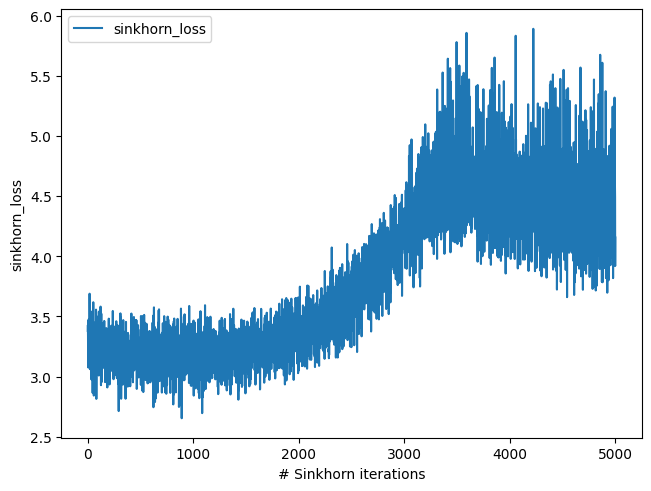

In [60]:
sinkhorn_loss_mnar25 = torch.tensor(sinkhorn_loss_mnar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mnar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mnar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

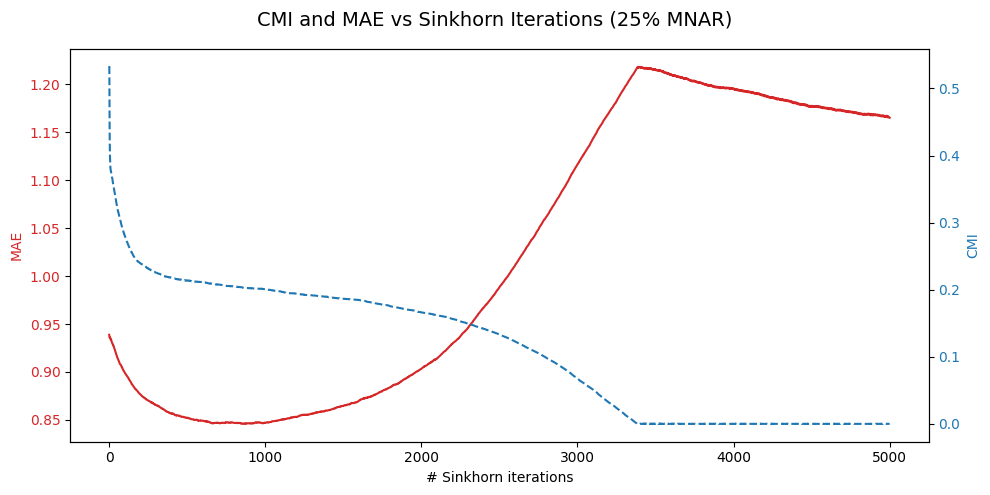

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mnar25
mae_array = sk_maes25mnar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MNAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

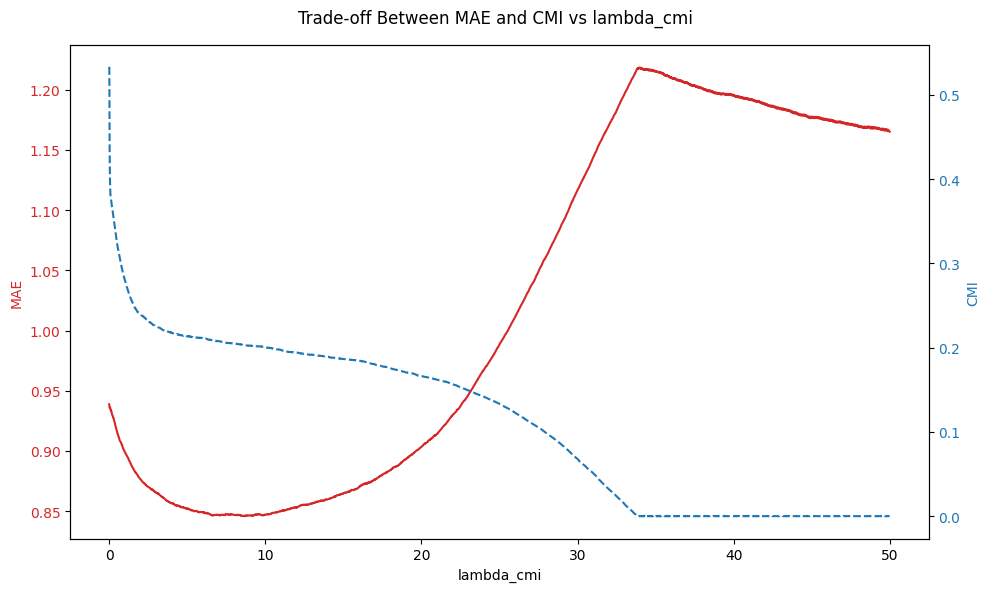

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mnar25 # list of length 2000 from your model
mae_history = sk_maes25mnar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mnar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


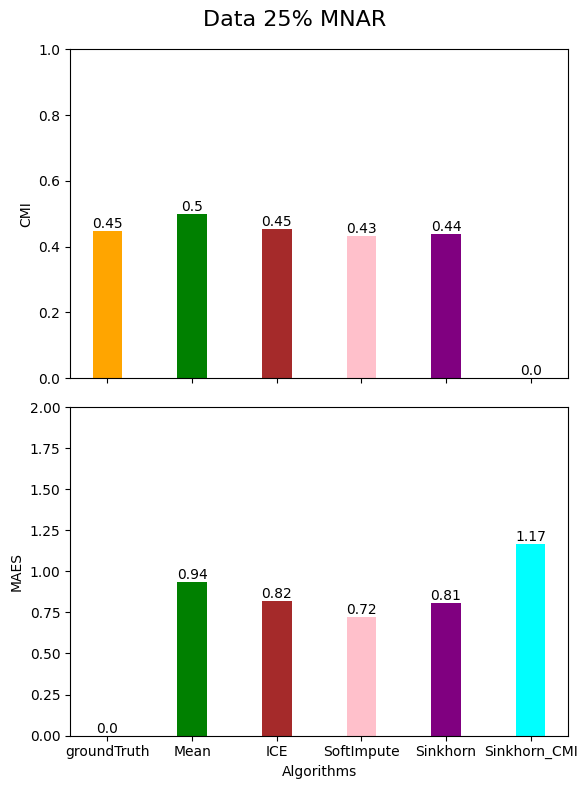

In [63]:

# Define values and categories
values_cmi_mnar25 = [cmi_groundTruth.detach(),cmi_mean_mnar25.detach(),cmi_ice_mnar25.detach(),cmi_soft_mnar25.detach(),on_cmi_missmnar25.detach(),cmi_mnar25.detach()]
values_maes_mnar25 = [0.0,mean_mae_mnar25.detach(),ice_mae_mnar25.detach(), soft_mae_mnar25.detach(),on_sk_mae_mnar25.detach(),sk_mae_mnar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MNAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mnar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAES bars and add values on top
bars2 = ax2.bar(index, values_maes_mnar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


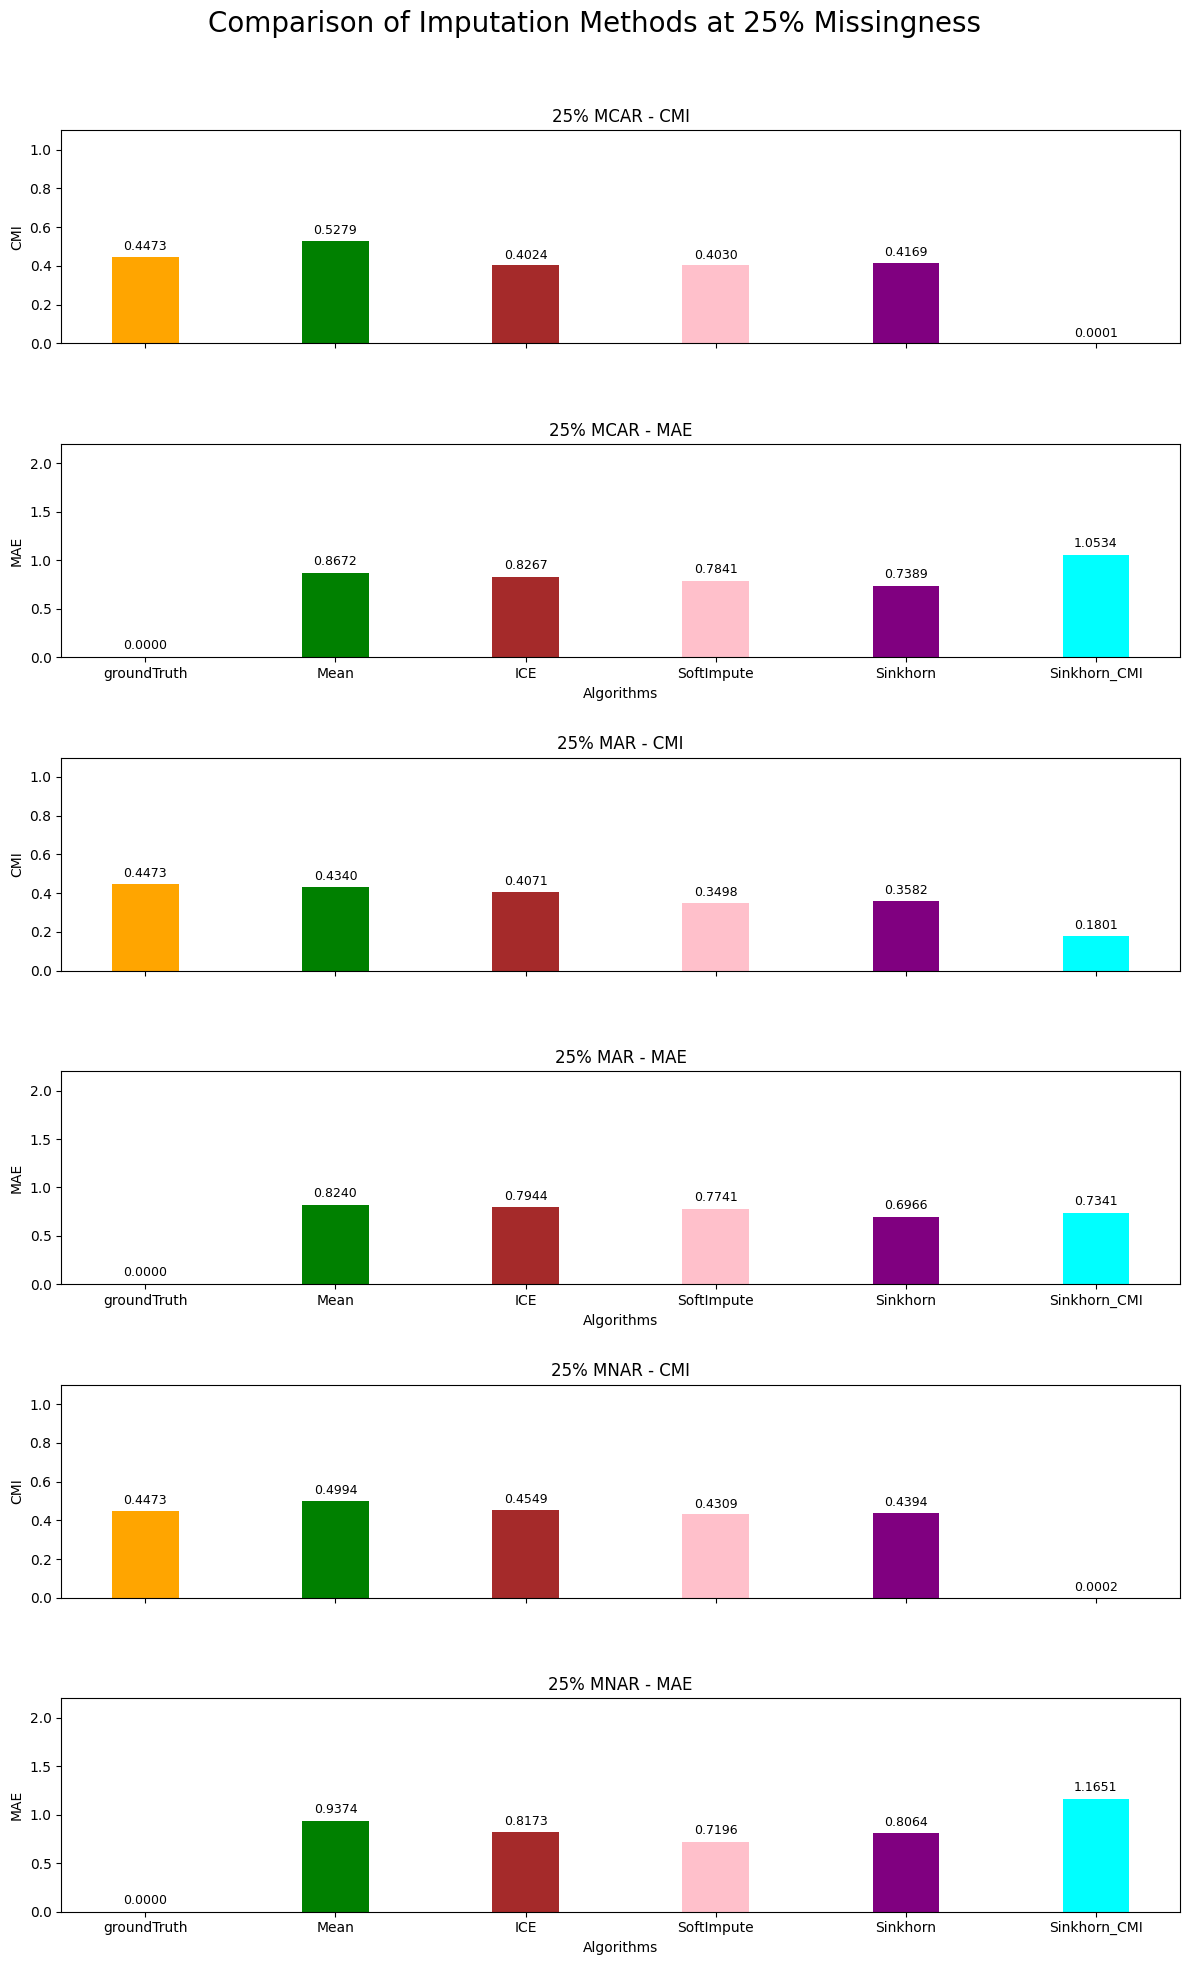

In [64]:
fig, axes = plt.subplots(6, 1, figsize=(12, 20), sharex=False)
fig.suptitle('Comparison of Imputation Methods at 25% Missingness', fontsize=20)

# MCAR, MAR, MNAR order
plot_data = [
    ("25% MCAR", values_cmi_mcar25, values_maes_mcar25),
    ("25% MAR", values_cmi_mar25, values_maes_mar25),
    ("25% MNAR", values_cmi_mnar25, values_maes_mnar25),
]

for i, (title, cmi_vals, mae_vals) in enumerate(plot_data):
    ax_cmi = axes[i * 2]
    ax_mae = axes[i * 2 + 1]

    # ----------------- CMI Plot -----------------
    bars1 = ax_cmi.bar(index, cmi_vals, color=colors, width=bar_width)
    ax_cmi.set_ylabel("CMI")
    ax_cmi.set_ylim(0, 1.1)
    ax_cmi.set_title(f"{title} - CMI")
    for bar in bars1:
        yval = bar.get_height()
        ax_cmi.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.4f}", ha='center', va='bottom', fontsize=9)

    # Remove x-axis labels and ticks for CMI
    ax_cmi.set_xticks(index)
    ax_cmi.set_xticklabels([])

    # ----------------- MAE Plot -----------------
    bars2 = ax_mae.bar(index, mae_vals, color=colors, width=bar_width)
    ax_mae.set_ylabel("MAE")
    ax_mae.set_ylim(0, 2.2)
    ax_mae.set_title(f"{title} - MAE")
    for bar in bars2:
        yval = bar.get_height()
        ax_mae.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f"{yval:.4f}", ha='center', va='bottom', fontsize=9)

    ax_mae.set_xticks(index)
    ax_mae.set_xticklabels(categories, fontsize=10, rotation=0)
    ax_mae.set_xlabel("Algorithms")

plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=2.5)
plt.show()


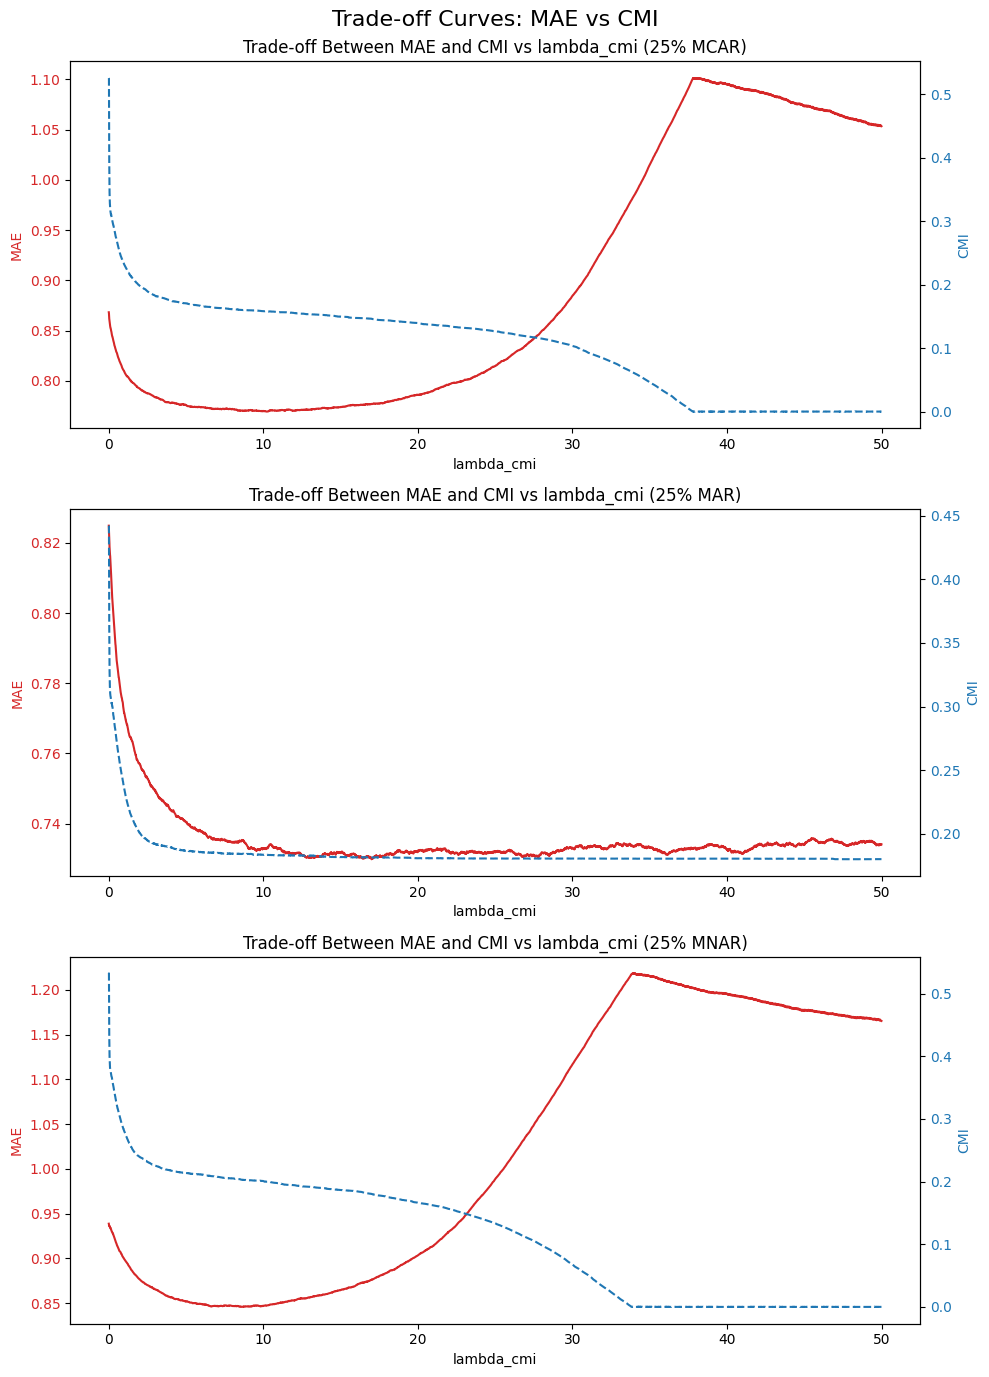

In [65]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

# New order: MCAR, MAR, MNAR
datasets = [
    ("25% MCAR", lamda_cmi_mcar25, sk_maes25mcar, cmi_loss_mcar25),
    ("25% MAR", lamda_cmi_mar25, sk_maes25mar, cmi_loss_mar25),
    ("25% MNAR", lamda_cmi_mnar25, sk_maes25mnar, cmi_loss_mnar25),
]

for i, (title, lambda_vals, mae_vals, cmi_vals) in enumerate(datasets):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # MAE (left y-axis)
    ax1.set_ylabel('MAE', color='tab:red')
    ax1.plot(lambda_vals, mae_vals, color='tab:red', label='MAE')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # CMI (right y-axis)
    ax2.set_ylabel('CMI', color='tab:blue')
    ax2.plot(lambda_vals, cmi_vals, color='tab:blue', linestyle='--', label='CMI')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    ax1.set_title(f'Trade-off Between MAE and CMI vs lambda_cmi ({title})')
    ax1.set_xlabel('lambda_cmi')

plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.suptitle('Trade-off Curves: MAE vs CMI', fontsize=16)
plt.show()


### MCAR

### 5% MCAR

In [69]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mcar_sk_mae5, mcar_sk_cmi5, mcar_skCmi_mae5, mcar_skCmi_cmi5, mcar_mean_mae5, mcar_mean_cmi5, mcar_ice_mae5, mcar_ice_cmi5, mcar_soft_mae5,  mcar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.6413
INFO:root:Iteration 0:	 Loss: 4.0174	 Validation MAE: 0.8746	RMSE: 1.0117
INFO:root:Iteration 50:	 Loss: 3.9867	 Validation MAE: 0.8315	RMSE: 1.0020
INFO:root:Iteration 100:	 Loss: 3.7624	 Validation MAE: 0.8098	RMSE: 0.9971
INFO:root:Iteration 150:	 Loss: 3.8269	 Validation MAE: 0.7980	RMSE: 0.9951
INFO:root:Iteration 200:	 Loss: 3.6960	 Validation MAE: 0.7886	RMSE: 0.9933
INFO:root:Iteration 250:	 Loss: 3.8550	 Validation MAE: 0.7790	RMSE: 0.9892
INFO:root:Iteration 300:	 Loss: 3.9318	 Validation MAE: 0.7715	RMSE: 0.9867
INFO:root:Iteration 350:	 Loss: 3.8197	 Validation MAE: 0.7642	RMSE: 0.9845
INFO:root:Iteration 400:	 Loss: 3.7482	 Validation MAE: 0.7564	RMSE: 0.9800
INFO:root:Iteration 450:	 Loss: 3.7085	 Validation MAE: 0.7548	RMSE: 0.9824
INFO:root:Iteration 500:	 Loss: 3.9353	 Validation MAE: 0.7509	RMSE: 0.9819
INFO:root:Iteration 550:	 Loss: 3.8233	 Validation MAE: 0.7480	RMSE: 0.9830
INFO:root:Iteration 600:	 Loss: 3.7304	 Validat

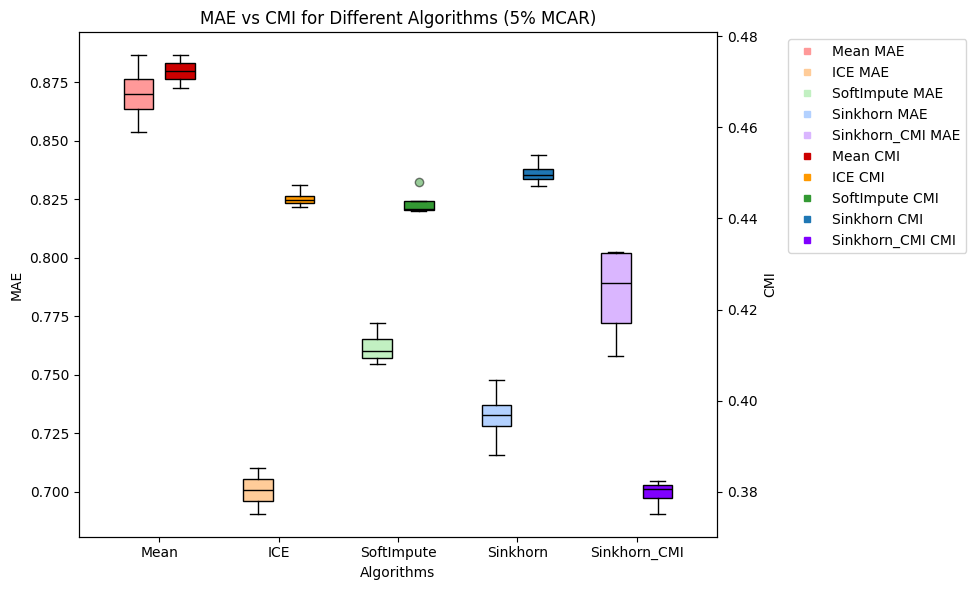

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar5 = {
    'Mean': mcar_mean_cmi5,
    'ICE': mcar_ice_cmi5,
    'SoftImpute': mcar_soft_cmi5,
    'Sinkhorn': mcar_sk_cmi5,
    'Sinkhorn_CMI': mcar_skCmi_cmi5
}
mae_data_mcar5 = {
    'Mean': mcar_mean_mae5,
    'ICE': mcar_ice_mae5,
    'SoftImpute': mcar_soft_mae5,
    'Sinkhorn': mcar_sk_mae5,
    'Sinkhorn_CMI': mcar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar5[algo]
    cmi_vals = cmi_data_mcar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 10% MCAR

In [71]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae10, mcar_sk_cmi10, mcar_skCmi_mae10, mcar_skCmi_cmi10, mcar_mean_mae10, mcar_mean_cmi10, mcar_ice_mae10, mcar_ice_cmi10, mcar_soft_mae10, mcar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.6126
INFO:root:Iteration 0:	 Loss: 3.7630	 Validation MAE: 0.8580	RMSE: 0.9949
INFO:root:Iteration 50:	 Loss: 3.7640	 Validation MAE: 0.8079	RMSE: 0.9803
INFO:root:Iteration 100:	 Loss: 3.9391	 Validation MAE: 0.7839	RMSE: 0.9719
INFO:root:Iteration 150:	 Loss: 3.6870	 Validation MAE: 0.7690	RMSE: 0.9656
INFO:root:Iteration 200:	 Loss: 3.7129	 Validation MAE: 0.7613	RMSE: 0.9655
INFO:root:Iteration 250:	 Loss: 3.8415	 Validation MAE: 0.7526	RMSE: 0.9629
INFO:root:Iteration 300:	 Loss: 3.7280	 Validation MAE: 0.7452	RMSE: 0.9603
INFO:root:Iteration 350:	 Loss: 3.6375	 Validation MAE: 0.7405	RMSE: 0.9606
INFO:root:Iteration 400:	 Loss: 3.4636	 Validation MAE: 0.7363	RMSE: 0.9606
INFO:root:Iteration 450:	 Loss: 3.5066	 Validation MAE: 0.7327	RMSE: 0.9616
INFO:root:Iteration 500:	 Loss: 3.8852	 Validation MAE: 0.7279	RMSE: 0.9605
INFO:root:Iteration 550:	 Loss: 3.5535	 Validation MAE: 0.7252	RMSE: 0.9613
INFO:root:Iteration 600:	 Loss: 3.6676	 Validat

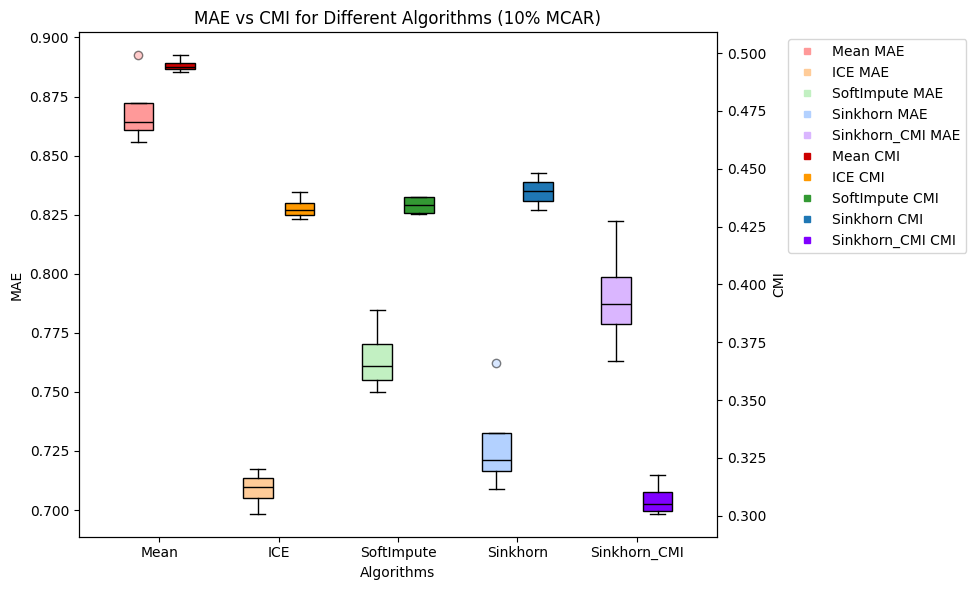

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar10 = {
    'Mean': mcar_mean_cmi10,
    'ICE': mcar_ice_cmi10,
    'SoftImpute': mcar_soft_cmi10,
    'Sinkhorn': mcar_sk_cmi10,
    'Sinkhorn_CMI': mcar_skCmi_cmi10
}
mae_data_mcar10 = {
    'Mean': mcar_mean_mae10,
    'ICE': mcar_ice_mae10,
    'SoftImpute': mcar_soft_mae10,
    'Sinkhorn': mcar_sk_mae10,
    'Sinkhorn_CMI': mcar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar10[algo]
    cmi_vals = cmi_data_mcar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MCAR

In [73]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae15, mcar_sk_cmi15, mcar_skCmi_mae15, mcar_skCmi_cmi15, mcar_mean_mae15, mcar_mean_cmi15, mcar_ice_mae15, mcar_ice_cmi15, mcar_soft_mae15, mcar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5771
INFO:root:Iteration 0:	 Loss: 3.5929	 Validation MAE: 0.8666	RMSE: 0.9985


INFO:root:Iteration 50:	 Loss: 3.5588	 Validation MAE: 0.8186	RMSE: 0.9834
INFO:root:Iteration 100:	 Loss: 3.7503	 Validation MAE: 0.7977	RMSE: 0.9787
INFO:root:Iteration 150:	 Loss: 3.7494	 Validation MAE: 0.7846	RMSE: 0.9766
INFO:root:Iteration 200:	 Loss: 3.5990	 Validation MAE: 0.7730	RMSE: 0.9736
INFO:root:Iteration 250:	 Loss: 3.6999	 Validation MAE: 0.7643	RMSE: 0.9725
INFO:root:Iteration 300:	 Loss: 3.4451	 Validation MAE: 0.7560	RMSE: 0.9702
INFO:root:Iteration 350:	 Loss: 3.5750	 Validation MAE: 0.7513	RMSE: 0.9706
INFO:root:Iteration 400:	 Loss: 3.2503	 Validation MAE: 0.7462	RMSE: 0.9712
INFO:root:Iteration 450:	 Loss: 3.4984	 Validation MAE: 0.7425	RMSE: 0.9710
INFO:root:Iteration 500:	 Loss: 3.5605	 Validation MAE: 0.7386	RMSE: 0.9718
INFO:root:Iteration 550:	 Loss: 3.3865	 Validation MAE: 0.7354	RMSE: 0.9714
INFO:root:Iteration 600:	 Loss: 3.5577	 Validation MAE: 0.7343	RMSE: 0.9717
INFO:root:Iteration 650:	 Loss: 3.2400	 Validation MAE: 0.7335	RMSE: 0.9720
INFO:root:Ite

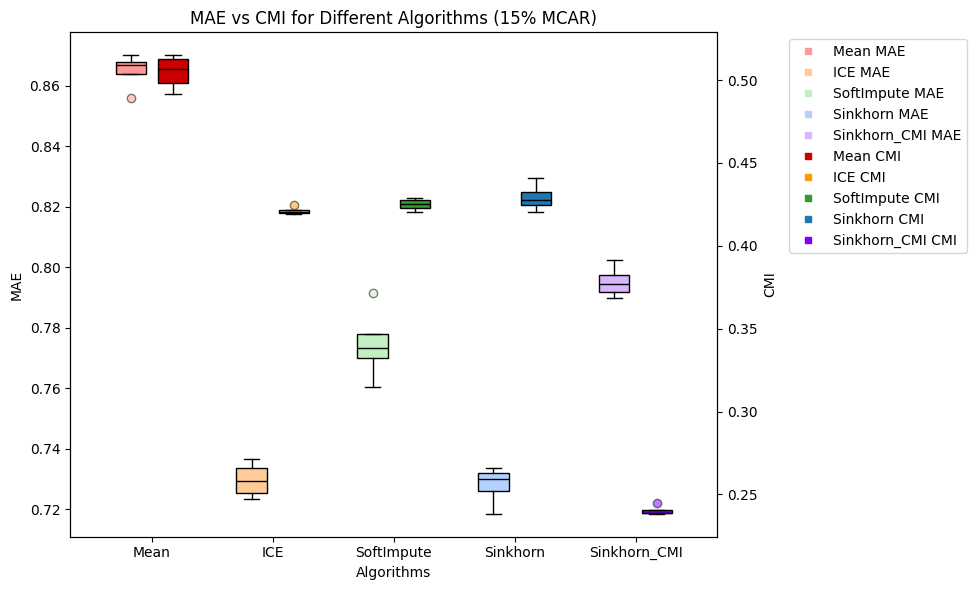

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar15 = {
    'Mean': mcar_mean_cmi15,
    'ICE': mcar_ice_cmi15,
    'SoftImpute': mcar_soft_cmi15,
    'Sinkhorn': mcar_sk_cmi15,
    'Sinkhorn_CMI': mcar_skCmi_cmi15
}
mae_data_mcar15 = {
    'Mean': mcar_mean_mae15,
    'ICE': mcar_ice_mae15,
    'SoftImpute': mcar_soft_mae15,
    'Sinkhorn': mcar_sk_mae15,
    'Sinkhorn_CMI': mcar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar15[algo]
    cmi_vals = cmi_data_mcar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae20, mcar_sk_cmi20, mcar_skCmi_mae20, mcar_skCmi_cmi20, mcar_mean_mae20, mcar_mean_cmi20, mcar_ice_mae20, mcar_ice_cmi20, mcar_soft_mae20, mcar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5451
INFO:root:Iteration 0:	 Loss: 3.5545	 Validation MAE: 0.8758	RMSE: 1.0163
INFO:root:Iteration 50:	 Loss: 3.3119	 Validation MAE: 0.8285	RMSE: 1.0061
INFO:root:Iteration 100:	 Loss: 3.3054	 Validation MAE: 0.8075	RMSE: 1.0027
INFO:root:Iteration 150:	 Loss: 3.4568	 Validation MAE: 0.7926	RMSE: 0.9993
INFO:root:Iteration 200:	 Loss: 3.2879	 Validation MAE: 0.7829	RMSE: 0.9984
INFO:root:Iteration 250:	 Loss: 3.3932	 Validation MAE: 0.7758	RMSE: 0.9976
INFO:root:Iteration 300:	 Loss: 3.2683	 Validation MAE: 0.7681	RMSE: 0.9965
INFO:root:Iteration 350:	 Loss: 3.2670	 Validation MAE: 0.7618	RMSE: 0.9959
INFO:root:Iteration 400:	 Loss: 3.3746	 Validation MAE: 0.7580	RMSE: 0.9963
INFO:root:Iteration 450:	 Loss: 3.2083	 Validation MAE: 0.7548	RMSE: 0.9963
INFO:root:Iteration 500:	 Loss: 3.1377	 Validation MAE: 0.7506	RMSE: 0.9952
INFO:root:Iteration 550:	 Loss: 3.1725	 Validation MAE: 0.7483	RMSE: 0.9956
INFO:root:Iteration 600:	 Loss: 3.1167	 Validat

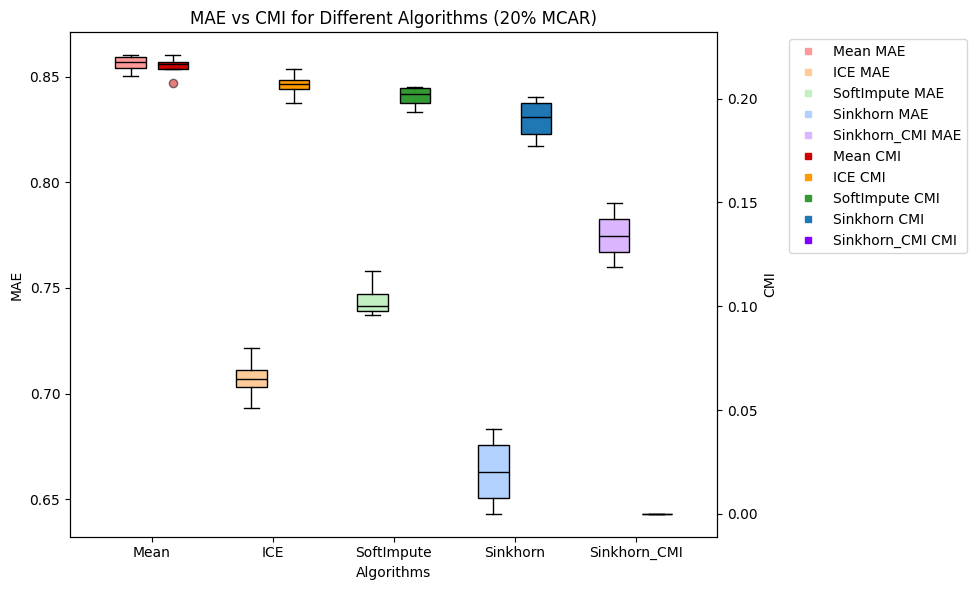

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar20 = {
    'Mean': mcar_mean_cmi20,
    'ICE': mcar_ice_cmi20,
    'SoftImpute': mcar_soft_cmi20,
    'Sinkhorn': mcar_sk_cmi20,
    'Sinkhorn_CMI': mcar_skCmi_cmi20
}
mae_data_mcar20 = {
    'Mean': mcar_mean_mae20,
    'ICE': mcar_ice_mae20,
    'SoftImpute': mcar_soft_mae20,
    'Sinkhorn': mcar_sk_mae20,
    'Sinkhorn_CMI': mcar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar20[algo]
    cmi_vals = cmi_data_mcar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae25, mcar_sk_cmi25, mcar_skCmi_mae25, mcar_skCmi_cmi25, mcar_mean_mae25, mcar_mean_cmi25, mcar_ice_mae25, mcar_ice_cmi25, mcar_soft_mae25, mcar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

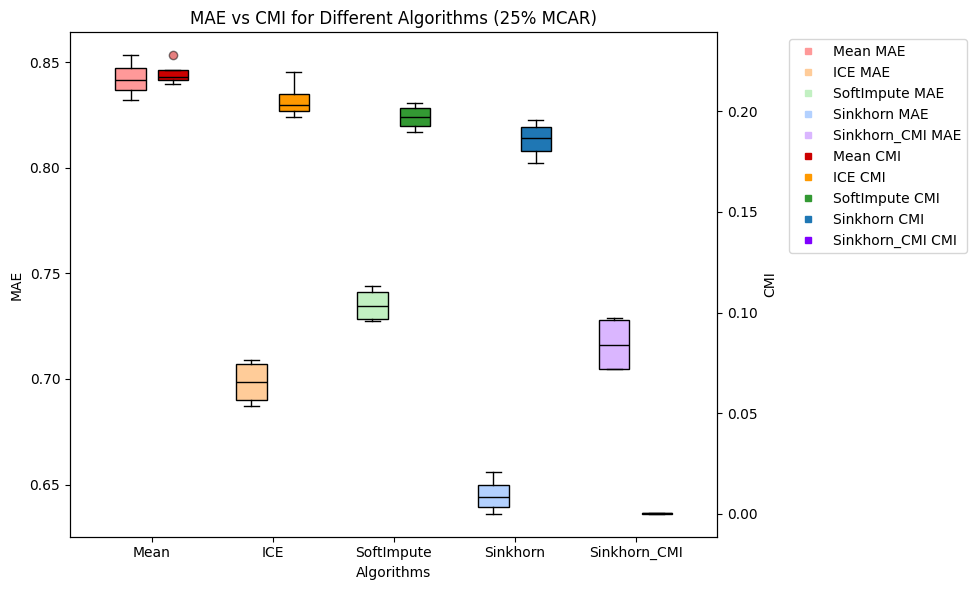

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar25 = {
    'Mean': mcar_mean_cmi25,
    'ICE': mcar_ice_cmi25,
    'SoftImpute': mcar_soft_cmi25,
    'Sinkhorn': mcar_sk_cmi25,
    'Sinkhorn_CMI': mcar_skCmi_cmi25
}
mae_data_mcar25 = {
    'Mean': mcar_mean_mae25,
    'ICE': mcar_ice_mae25,
    'SoftImpute': mcar_soft_mae25,
    'Sinkhorn': mcar_sk_mae25,
    'Sinkhorn_CMI': mcar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar25[algo]
    cmi_vals = cmi_data_mcar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae30, mcar_sk_cmi30, mcar_skCmi_mae30, mcar_skCmi_cmi30, mcar_mean_mae30, mcar_mean_cmi30, mcar_ice_mae30, mcar_ice_cmi30, mcar_soft_mae30, mcar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

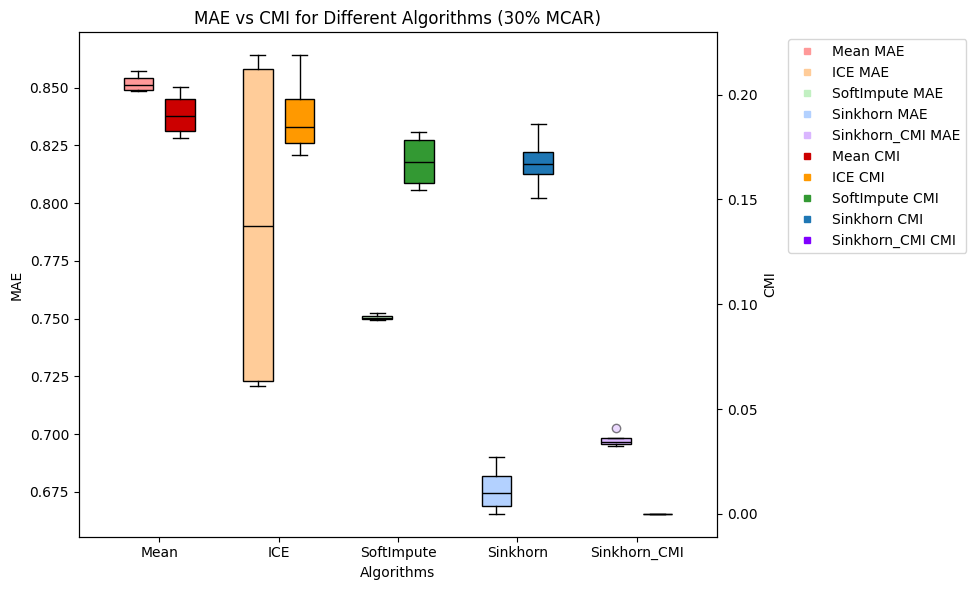

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar30 = {
    'Mean': mcar_mean_cmi30,
    'ICE': mcar_ice_cmi30,
    'SoftImpute': mcar_soft_cmi30,
    'Sinkhorn': mcar_sk_cmi30,
    'Sinkhorn_CMI': mcar_skCmi_cmi30
}
mae_data_mcar30 = {
    'Mean': mcar_mean_mae30,
    'ICE': mcar_ice_mae30,
    'SoftImpute': mcar_soft_mae30,
    'Sinkhorn': mcar_sk_mae30,
    'Sinkhorn_CMI': mcar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar30[algo]
    cmi_vals = cmi_data_mcar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


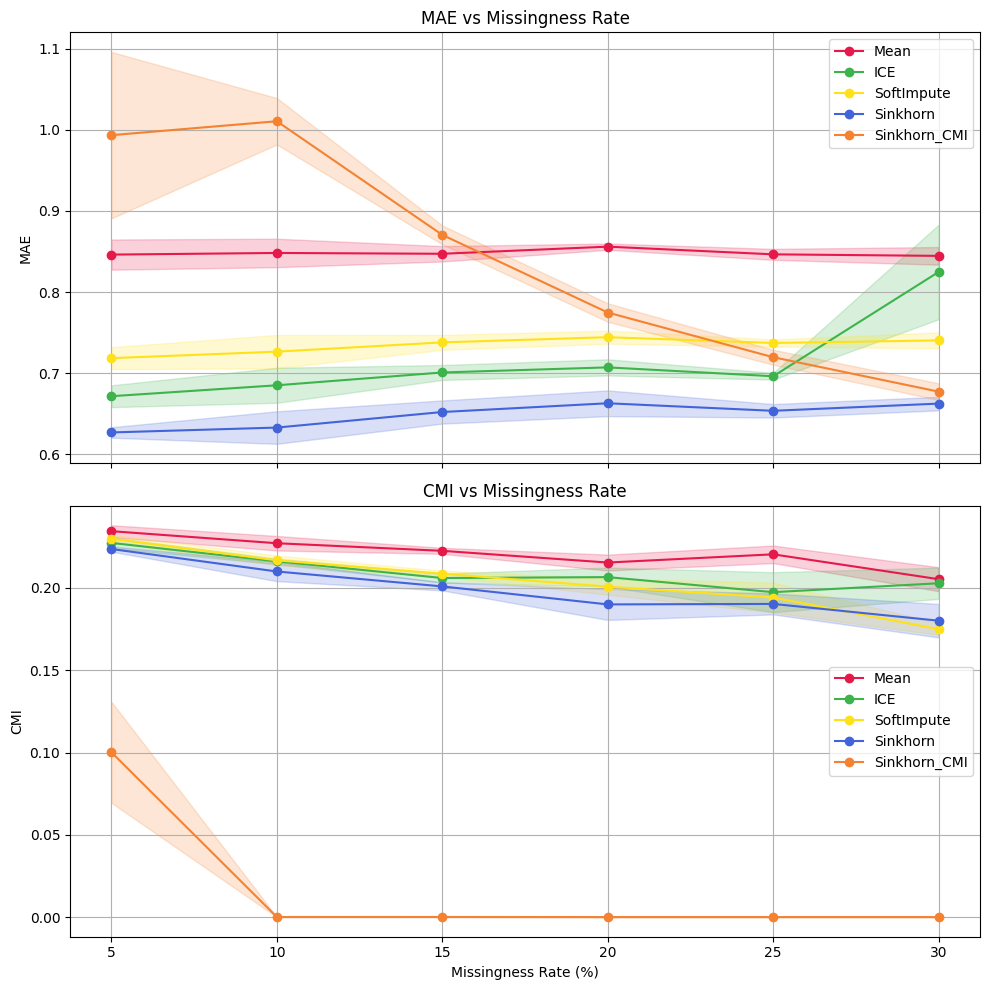

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mcar_mean_mae5, mcar_mean_mae10, mcar_mean_mae15, mcar_mean_mae20, mcar_mean_mae25, mcar_mean_mae30],
    'ICE': [mcar_ice_mae5, mcar_ice_mae10, mcar_ice_mae15, mcar_ice_mae20, mcar_ice_mae25, mcar_ice_mae30],
    'SoftImpute': [mcar_soft_mae5, mcar_soft_mae10, mcar_soft_mae15, mcar_soft_mae20, mcar_soft_mae25, mcar_soft_mae30],
    'Sinkhorn': [mcar_sk_mae5, mcar_sk_mae10, mcar_sk_mae15, mcar_sk_mae20, mcar_sk_mae25, mcar_sk_mae30],
    'Sinkhorn_CMI': [mcar_skCmi_mae5, mcar_skCmi_mae10, mcar_skCmi_mae15, mcar_skCmi_mae20, mcar_skCmi_mae25, mcar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mcar_mean_cmi5, mcar_mean_cmi10, mcar_mean_cmi15, mcar_mean_cmi20, mcar_mean_cmi25, mcar_mean_cmi30],
    'ICE': [mcar_ice_cmi5, mcar_ice_cmi10, mcar_ice_cmi15, mcar_ice_cmi20, mcar_ice_cmi25, mcar_ice_cmi30],
    'SoftImpute': [mcar_soft_cmi5, mcar_soft_cmi10, mcar_soft_cmi15, mcar_soft_cmi20, mcar_soft_cmi25, mcar_soft_cmi30],
    'Sinkhorn': [mcar_sk_cmi5, mcar_sk_cmi10, mcar_sk_cmi15, mcar_sk_cmi20, mcar_sk_cmi25, mcar_sk_cmi30],
    'Sinkhorn_CMI': [mcar_skCmi_cmi5, mcar_skCmi_cmi10, mcar_skCmi_cmi15, mcar_skCmi_cmi20, mcar_skCmi_cmi25, mcar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


### MAR

### 5% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mar_sk_mae5, mar_sk_cmi5, mar_skCmi_mae5, mar_skCmi_cmi5, mar_mean_mae5, mar_mean_cmi5, mar_ice_mae5, mar_ice_cmi5, mar_soft_mae5, mar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5471
INFO:root:Iteration 0:	 Loss: 2.5363	 Validation MAE: 0.8500	RMSE: 1.0160
INFO:root:Iteration 50:	 Loss: 2.5270	 Validation MAE: 0.7527	RMSE: 0.9762
INFO:root:Iteration 100:	 Loss: 2.5225	 Validation MAE: 0.7199	RMSE: 0.9624
INFO:root:Iteration 150:	 Loss: 2.6113	 Validation MAE: 0.6950	RMSE: 0.9496
INFO:root:Iteration 200:	 Loss: 2.5113	 Validation MAE: 0.6853	RMSE: 0.9488
INFO:root:Iteration 250:	 Loss: 2.6707	 Validation MAE: 0.6739	RMSE: 0.9457
INFO:root:Iteration 300:	 Loss: 2.3179	 Validation MAE: 0.6694	RMSE: 0.9458
INFO:root:Iteration 350:	 Loss: 2.4568	 Validation MAE: 0.6623	RMSE: 0.9459
INFO:root:Iteration 400:	 Loss: 3.1045	 Validation MAE: 0.6543	RMSE: 0.9414
INFO:root:Iteration 450:	 Loss: 2.3202	 Validation MAE: 0.6496	RMSE: 0.9351
INFO:root:Iteration 500:	 Loss: 2.3357	 Validation MAE: 0.6479	RMSE: 0.9359
INFO:root:Iteration 550:	 Loss: 2.5682	 Validation MAE: 0.6459	RMSE: 0.9372
INFO:root:Iteration 600:	 Loss: 2.4206	 Validat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar5 = {
    'Mean': mar_mean_cmi5,
    'ICE': mar_ice_cmi5,
    'SoftImpute': mar_soft_cmi5,
    'Sinkhorn': mar_sk_cmi5,
    'Sinkhorn_CMI': mar_skCmi_cmi5
}
mae_data_mar5 = {
    'Mean': mar_mean_mae5,
    'ICE': mar_ice_mae5,
    'SoftImpute': mar_soft_mae5,
    'Sinkhorn': mar_sk_mae5,
    'Sinkhorn_CMI': mar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar5[algo]
    cmi_vals = cmi_data_mar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### 10% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae10, mar_sk_cmi10, mar_skCmi_mae10, mar_skCmi_cmi10, mar_mean_mae10, mar_mean_cmi10, mar_ice_mae10, mar_ice_cmi10, mar_soft_mae10, mar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5221
INFO:root:Iteration 0:	 Loss: 2.5271	 Validation MAE: 0.8781	RMSE: 1.0560
INFO:root:Iteration 50:	 Loss: 2.2761	 Validation MAE: 0.7727	RMSE: 1.0074
INFO:root:Iteration 100:	 Loss: 2.4283	 Validation MAE: 0.7362	RMSE: 0.9919
INFO:root:Iteration 150:	 Loss: 2.2363	 Validation MAE: 0.7174	RMSE: 0.9874
INFO:root:Iteration 200:	 Loss: 2.5400	 Validation MAE: 0.7016	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 2.4012	 Validation MAE: 0.6914	RMSE: 0.9786
INFO:root:Iteration 300:	 Loss: 2.2598	 Validation MAE: 0.6838	RMSE: 0.9752
INFO:root:Iteration 350:	 Loss: 2.3362	 Validation MAE: 0.6745	RMSE: 0.9715
INFO:root:Iteration 400:	 Loss: 2.1902	 Validation MAE: 0.6716	RMSE: 0.9710
INFO:root:Iteration 450:	 Loss: 2.2093	 Validation MAE: 0.6664	RMSE: 0.9683
INFO:root:Iteration 500:	 Loss: 2.0970	 Validation MAE: 0.6621	RMSE: 0.9652
INFO:root:Iteration 550:	 Loss: 2.2531	 Validation MAE: 0.6634	RMSE: 0.9681
INFO:root:Iteration 600:	 Loss: 2.1888	 Validat

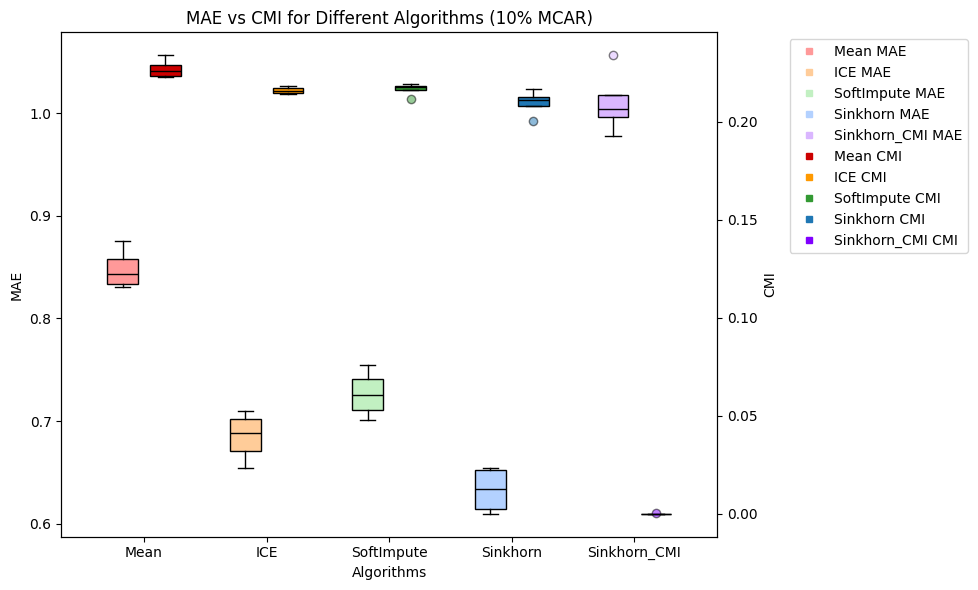

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar10 = {
    'Mean': mar_mean_cmi10,
    'ICE': mar_ice_cmi10,
    'SoftImpute': mar_soft_cmi10,
    'Sinkhorn': mar_sk_cmi10,
    'Sinkhorn_CMI': mar_skCmi_cmi10
}
mae_data_mar10 = {
    'Mean': mar_mean_mae10,
    'ICE': mar_ice_mae10,
    'SoftImpute': mar_soft_mae10,
    'Sinkhorn': mar_sk_mae10,
    'Sinkhorn_CMI': mar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar10[algo]
    cmi_vals = cmi_data_mar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae15, mar_sk_cmi15, mar_skCmi_mae15, mar_skCmi_cmi15, mar_mean_mae15, mar_mean_cmi15, mar_ice_mae15, mar_ice_cmi15, mar_soft_mae15, mar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4912
INFO:root:Iteration 0:	 Loss: 2.3263	 Validation MAE: 0.8430	RMSE: 1.0001
INFO:root:Iteration 50:	 Loss: 2.2554	 Validation MAE: 0.7537	RMSE: 0.9683
INFO:root:Iteration 100:	 Loss: 2.1644	 Validation MAE: 0.7223	RMSE: 0.9587
INFO:root:Iteration 150:	 Loss: 2.1129	 Validation MAE: 0.7047	RMSE: 0.9549
INFO:root:Iteration 200:	 Loss: 2.2498	 Validation MAE: 0.6947	RMSE: 0.9549
INFO:root:Iteration 250:	 Loss: 2.3506	 Validation MAE: 0.6846	RMSE: 0.9502
INFO:root:Iteration 300:	 Loss: 2.3762	 Validation MAE: 0.6805	RMSE: 0.9491
INFO:root:Iteration 350:	 Loss: 2.2683	 Validation MAE: 0.6780	RMSE: 0.9505
INFO:root:Iteration 400:	 Loss: 2.1121	 Validation MAE: 0.6742	RMSE: 0.9512
INFO:root:Iteration 450:	 Loss: 2.0293	 Validation MAE: 0.6711	RMSE: 0.9531
INFO:root:Iteration 500:	 Loss: 1.9154	 Validation MAE: 0.6678	RMSE: 0.9527
INFO:root:Iteration 550:	 Loss: 2.2961	 Validation MAE: 0.6696	RMSE: 0.9558
INFO:root:Iteration 600:	 Loss: 2.2112	 Validat

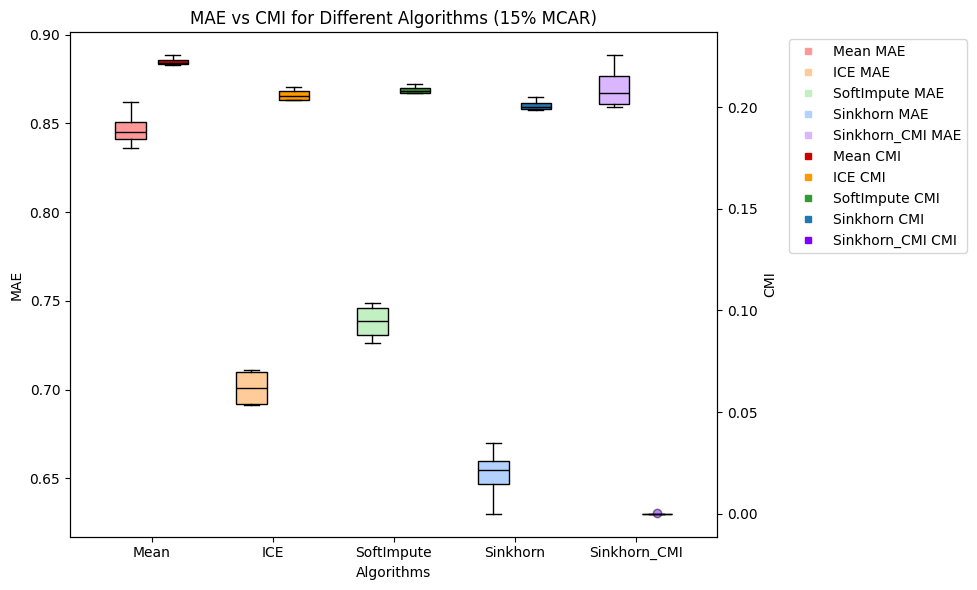

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar15 = {
    'Mean': mar_mean_cmi15,
    'ICE': mar_ice_cmi15,
    'SoftImpute': mar_soft_cmi15,
    'Sinkhorn': mar_sk_cmi15,
    'Sinkhorn_CMI': mar_skCmi_cmi15
}
mae_data_mar15 = {
    'Mean': mar_mean_mae15,
    'ICE': mar_ice_mae15,
    'SoftImpute': mar_soft_mae15,
    'Sinkhorn': mar_sk_mae15,
    'Sinkhorn_CMI': mar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar15[algo]
    cmi_vals = cmi_data_mar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae20, mar_sk_cmi20, mar_skCmi_mae20, mar_skCmi_cmi20, mar_mean_mae20, mar_mean_cmi20, mar_ice_mae20, mar_ice_cmi20, mar_soft_mae20, mar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4633
INFO:root:Iteration 0:	 Loss: 2.6567	 Validation MAE: 0.8531	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 2.0398	 Validation MAE: 0.7599	RMSE: 0.9735
INFO:root:Iteration 100:	 Loss: 2.0552	 Validation MAE: 0.7289	RMSE: 0.9665
INFO:root:Iteration 150:	 Loss: 1.9240	 Validation MAE: 0.7126	RMSE: 0.9637
INFO:root:Iteration 200:	 Loss: 2.1285	 Validation MAE: 0.6986	RMSE: 0.9621
INFO:root:Iteration 250:	 Loss: 2.0264	 Validation MAE: 0.6875	RMSE: 0.9557
INFO:root:Iteration 300:	 Loss: 1.9867	 Validation MAE: 0.6799	RMSE: 0.9551
INFO:root:Iteration 350:	 Loss: 2.2002	 Validation MAE: 0.6740	RMSE: 0.9539
INFO:root:Iteration 400:	 Loss: 1.9239	 Validation MAE: 0.6739	RMSE: 0.9562
INFO:root:Iteration 450:	 Loss: 1.9685	 Validation MAE: 0.6706	RMSE: 0.9567
INFO:root:Iteration 500:	 Loss: 2.0511	 Validation MAE: 0.6688	RMSE: 0.9559
INFO:root:Iteration 550:	 Loss: 2.2345	 Validation MAE: 0.6661	RMSE: 0.9552
INFO:root:Iteration 600:	 Loss: 2.0395	 Validat

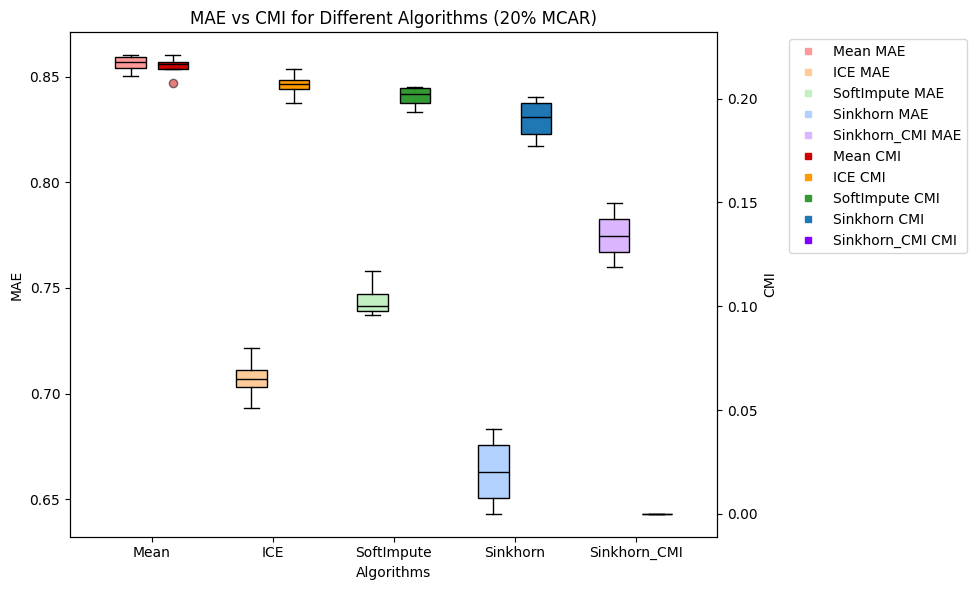

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar20 = {
    'Mean': mar_mean_cmi20,
    'ICE': mar_ice_cmi20,
    'SoftImpute': mar_soft_cmi20,
    'Sinkhorn': mar_sk_cmi20,
    'Sinkhorn_CMI': mar_skCmi_cmi20
}
mae_data_mar20 = {
    'Mean': mar_mean_mae20,
    'ICE': mar_ice_mae20,
    'SoftImpute': mar_soft_mae20,
    'Sinkhorn': mar_sk_mae20,
    'Sinkhorn_CMI': mar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar20[algo]
    cmi_vals = cmi_data_mar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae25, mar_sk_cmi25, mar_skCmi_mae25, mar_skCmi_cmi25, mar_mean_mae25, mar_mean_cmi25, mar_ice_mae25, mar_ice_cmi25, mar_soft_mae25, mar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

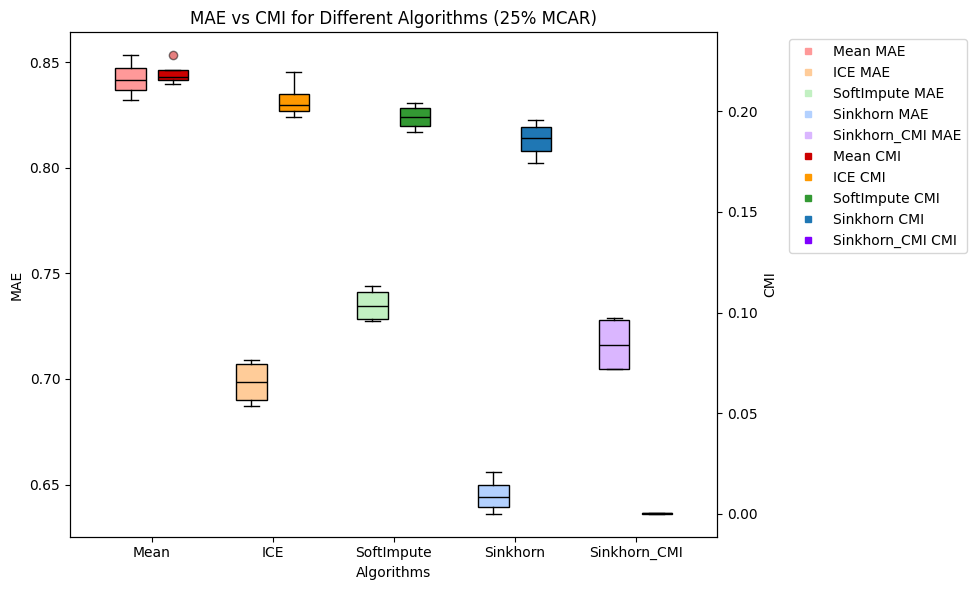

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar25 = {
    'Mean': mar_mean_cmi25,
    'ICE': mar_ice_cmi25,
    'SoftImpute': mar_soft_cmi25,
    'Sinkhorn': mar_sk_cmi25,
    'Sinkhorn_CMI': mar_skCmi_cmi25
}
mae_data_mar25 = {
    'Mean': mar_mean_mae25,
    'ICE': mar_ice_mae25,
    'SoftImpute': mar_soft_mae25,
    'Sinkhorn': mar_sk_mae25,
    'Sinkhorn_CMI': mar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar25[algo]
    cmi_vals = cmi_data_mar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae30, mar_sk_cmi30, mar_skCmi_mae30, mar_skCmi_cmi30, mar_mean_mae30, mar_mean_cmi30, mar_ice_mae30, mar_ice_cmi30, mar_soft_mae30, mar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

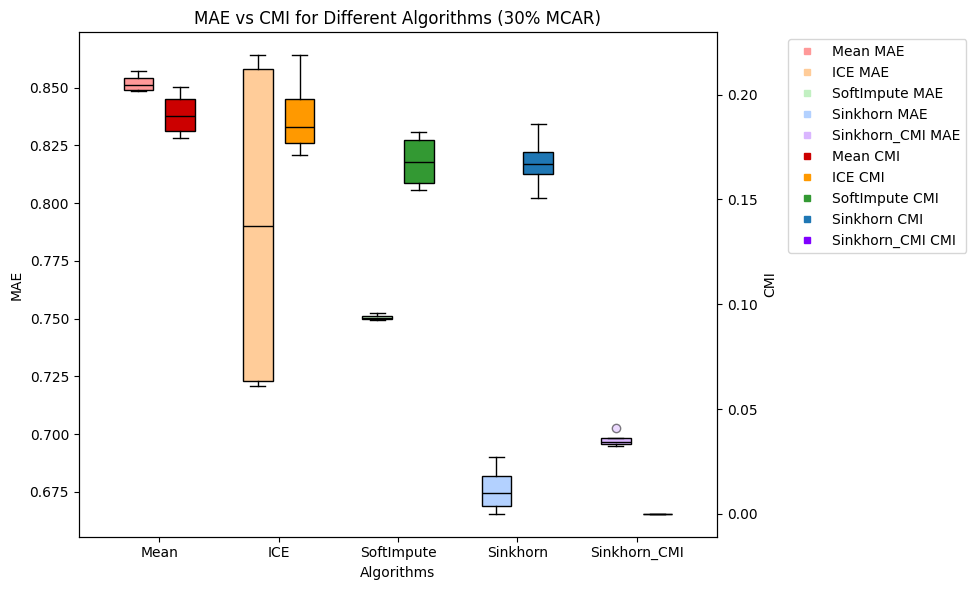

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar30 = {
    'Mean': mar_mean_cmi30,
    'ICE': mar_ice_cmi30,
    'SoftImpute': mar_soft_cmi30,
    'Sinkhorn': mar_sk_cmi30,
    'Sinkhorn_CMI': mar_skCmi_cmi30
}
mae_data_mar30 = {
    'Mean': mar_mean_mae30,
    'ICE': mar_ice_mae30,
    'SoftImpute': mar_soft_mae30,
    'Sinkhorn': mar_sk_mae30,
    'Sinkhorn_CMI': mar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar30[algo]
    cmi_vals = cmi_data_mar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


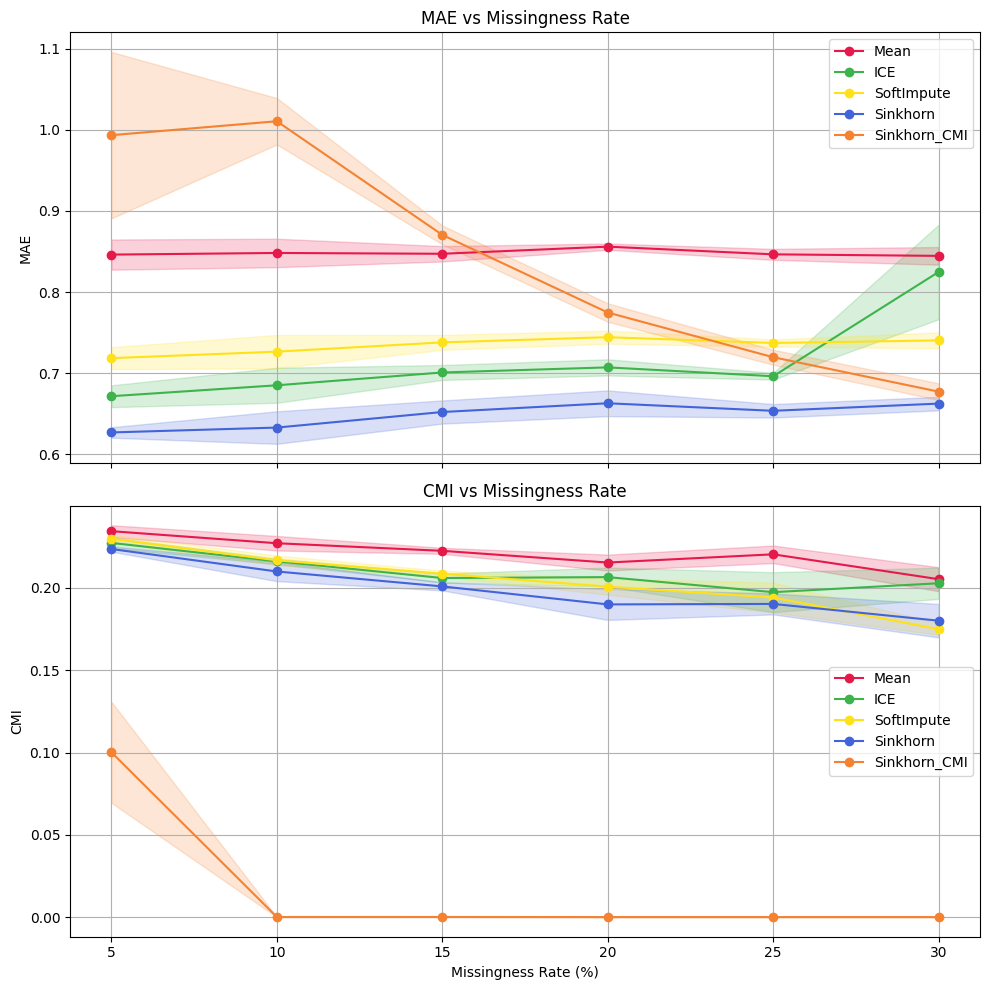

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mar_mean_mae5, mar_mean_mae10, mar_mean_mae15, mar_mean_mae20, mar_mean_mae25, mar_mean_mae30],
    'ICE': [mar_ice_mae5, mar_ice_mae10, mar_ice_mae15, mar_ice_mae20, mar_ice_mae25, mar_ice_mae30],
    'SoftImpute': [mar_soft_mae5, mar_soft_mae10, mar_soft_mae15, mar_soft_mae20, mar_soft_mae25, mar_soft_mae30],
    'Sinkhorn': [mar_sk_mae5, mar_sk_mae10, mar_sk_mae15, mar_sk_mae20, mar_sk_mae25, mar_sk_mae30],
    'Sinkhorn_CMI': [mar_skCmi_mae5, mar_skCmi_mae10, mar_skCmi_mae15, mar_skCmi_mae20, mar_skCmi_mae25, mar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mar_mean_cmi5, mar_mean_cmi10, mar_mean_cmi15, mar_mean_cmi20, mar_mean_cmi25, mar_mean_cmi30],
    'ICE': [mar_ice_cmi5, mar_ice_cmi10, mar_ice_cmi15, mar_ice_cmi20, mar_ice_cmi25, mar_ice_cmi30],
    'SoftImpute': [mar_soft_cmi5, mar_soft_cmi10, mar_soft_cmi15, mar_soft_cmi20, mar_soft_cmi25, mar_soft_cmi30],
    'Sinkhorn': [mar_sk_cmi5, mar_sk_cmi10, mar_sk_cmi15, mar_sk_cmi20, mar_sk_cmi25, mar_sk_cmi30],
    'Sinkhorn_CMI': [mar_skCmi_cmi5, mar_skCmi_cmi10, mar_skCmi_cmi15, mar_skCmi_cmi20, mar_skCmi_cmi25, mar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate MAR (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


### MNAR

### 5% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mnar_sk_mae5, mnar_sk_cmi5, mnar_skCmi_mae5, mnar_skCmi_cmi5, mnar_mean_mae5, mnar_mean_cmi5, mnar_ice_mae5, mnar_ice_cmi5, mnar_soft_mae5,  mnar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5471
INFO:root:Iteration 0:	 Loss: 2.5363	 Validation MAE: 0.8500	RMSE: 1.0160
INFO:root:Iteration 50:	 Loss: 2.5270	 Validation MAE: 0.7527	RMSE: 0.9762
INFO:root:Iteration 100:	 Loss: 2.5225	 Validation MAE: 0.7199	RMSE: 0.9624
INFO:root:Iteration 150:	 Loss: 2.6113	 Validation MAE: 0.6950	RMSE: 0.9496
INFO:root:Iteration 200:	 Loss: 2.5113	 Validation MAE: 0.6853	RMSE: 0.9488
INFO:root:Iteration 250:	 Loss: 2.6707	 Validation MAE: 0.6739	RMSE: 0.9457
INFO:root:Iteration 300:	 Loss: 2.3179	 Validation MAE: 0.6694	RMSE: 0.9458
INFO:root:Iteration 350:	 Loss: 2.4568	 Validation MAE: 0.6623	RMSE: 0.9459
INFO:root:Iteration 400:	 Loss: 3.1045	 Validation MAE: 0.6543	RMSE: 0.9414
INFO:root:Iteration 450:	 Loss: 2.3202	 Validation MAE: 0.6496	RMSE: 0.9351
INFO:root:Iteration 500:	 Loss: 2.3357	 Validation MAE: 0.6479	RMSE: 0.9359
INFO:root:Iteration 550:	 Loss: 2.5682	 Validation MAE: 0.6459	RMSE: 0.9372
INFO:root:Iteration 600:	 Loss: 2.4206	 Validat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar5 = {
    'Mean': mnar_mean_cmi5,
    'ICE': mnar_ice_cmi5,
    'SoftImpute': mnar_soft_cmi5,
    'Sinkhorn': mnar_sk_cmi5,
    'Sinkhorn_CMI': mnar_skCmi_cmi5
}
mae_data_mnar5 = {
    'Mean': mnar_mean_mae5,
    'ICE': mnar_ice_mae5,
    'SoftImpute': mnar_soft_mae5,
    'Sinkhorn': mnar_sk_mae5,
    'Sinkhorn_CMI': mnar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar5[algo]
    cmi_vals = cmi_data_mnar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### 10% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae10, mnar_sk_cmi10, mnar_skCmi_mae10, mnar_skCmi_cmi10, mnar_mean_mae10, mnar_mean_cmi10, mnar_ice_mae10, mnar_ice_cmi10, mnar_soft_mae10, mnar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5221
INFO:root:Iteration 0:	 Loss: 2.5271	 Validation MAE: 0.8781	RMSE: 1.0560
INFO:root:Iteration 50:	 Loss: 2.2761	 Validation MAE: 0.7727	RMSE: 1.0074
INFO:root:Iteration 100:	 Loss: 2.4283	 Validation MAE: 0.7362	RMSE: 0.9919
INFO:root:Iteration 150:	 Loss: 2.2363	 Validation MAE: 0.7174	RMSE: 0.9874
INFO:root:Iteration 200:	 Loss: 2.5400	 Validation MAE: 0.7016	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 2.4012	 Validation MAE: 0.6914	RMSE: 0.9786
INFO:root:Iteration 300:	 Loss: 2.2598	 Validation MAE: 0.6838	RMSE: 0.9752
INFO:root:Iteration 350:	 Loss: 2.3362	 Validation MAE: 0.6745	RMSE: 0.9715
INFO:root:Iteration 400:	 Loss: 2.1902	 Validation MAE: 0.6716	RMSE: 0.9710
INFO:root:Iteration 450:	 Loss: 2.2093	 Validation MAE: 0.6664	RMSE: 0.9683
INFO:root:Iteration 500:	 Loss: 2.0970	 Validation MAE: 0.6621	RMSE: 0.9652
INFO:root:Iteration 550:	 Loss: 2.2531	 Validation MAE: 0.6634	RMSE: 0.9681
INFO:root:Iteration 600:	 Loss: 2.1888	 Validat

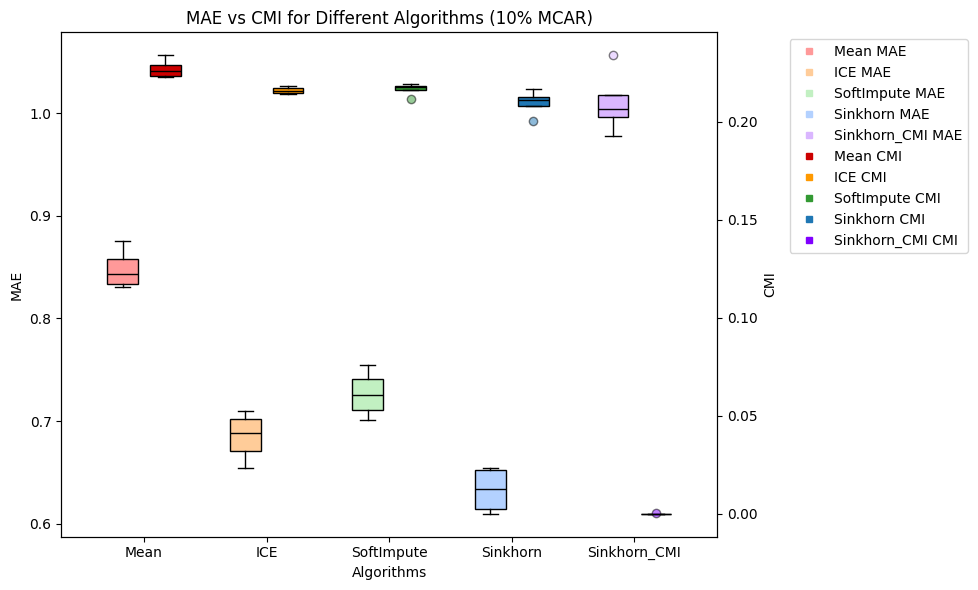

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar10 = {
    'Mean': mnar_mean_cmi10,
    'ICE': mnar_ice_cmi10,
    'SoftImpute': mnar_soft_cmi10,
    'Sinkhorn': mnar_sk_cmi10,
    'Sinkhorn_CMI': mnar_skCmi_cmi10
}
mae_data_mnar10 = {
    'Mean': mnar_mean_mae10,
    'ICE': mnar_ice_mae10,
    'SoftImpute': mnar_soft_mae10,
    'Sinkhorn': mnar_sk_mae10,
    'Sinkhorn_CMI': mnar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar10[algo]
    cmi_vals = cmi_data_mnar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae15, mnar_sk_cmi15, mnar_skCmi_mae15, mnar_skCmi_cmi15, mnar_mean_mae15, mnar_mean_cmi15, mnar_ice_mae15, mnar_ice_cmi15, mnar_soft_mae15, mnar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4912
INFO:root:Iteration 0:	 Loss: 2.3263	 Validation MAE: 0.8430	RMSE: 1.0001
INFO:root:Iteration 50:	 Loss: 2.2554	 Validation MAE: 0.7537	RMSE: 0.9683
INFO:root:Iteration 100:	 Loss: 2.1644	 Validation MAE: 0.7223	RMSE: 0.9587
INFO:root:Iteration 150:	 Loss: 2.1129	 Validation MAE: 0.7047	RMSE: 0.9549
INFO:root:Iteration 200:	 Loss: 2.2498	 Validation MAE: 0.6947	RMSE: 0.9549
INFO:root:Iteration 250:	 Loss: 2.3506	 Validation MAE: 0.6846	RMSE: 0.9502
INFO:root:Iteration 300:	 Loss: 2.3762	 Validation MAE: 0.6805	RMSE: 0.9491
INFO:root:Iteration 350:	 Loss: 2.2683	 Validation MAE: 0.6780	RMSE: 0.9505
INFO:root:Iteration 400:	 Loss: 2.1121	 Validation MAE: 0.6742	RMSE: 0.9512
INFO:root:Iteration 450:	 Loss: 2.0293	 Validation MAE: 0.6711	RMSE: 0.9531
INFO:root:Iteration 500:	 Loss: 1.9154	 Validation MAE: 0.6678	RMSE: 0.9527
INFO:root:Iteration 550:	 Loss: 2.2961	 Validation MAE: 0.6696	RMSE: 0.9558
INFO:root:Iteration 600:	 Loss: 2.2112	 Validat

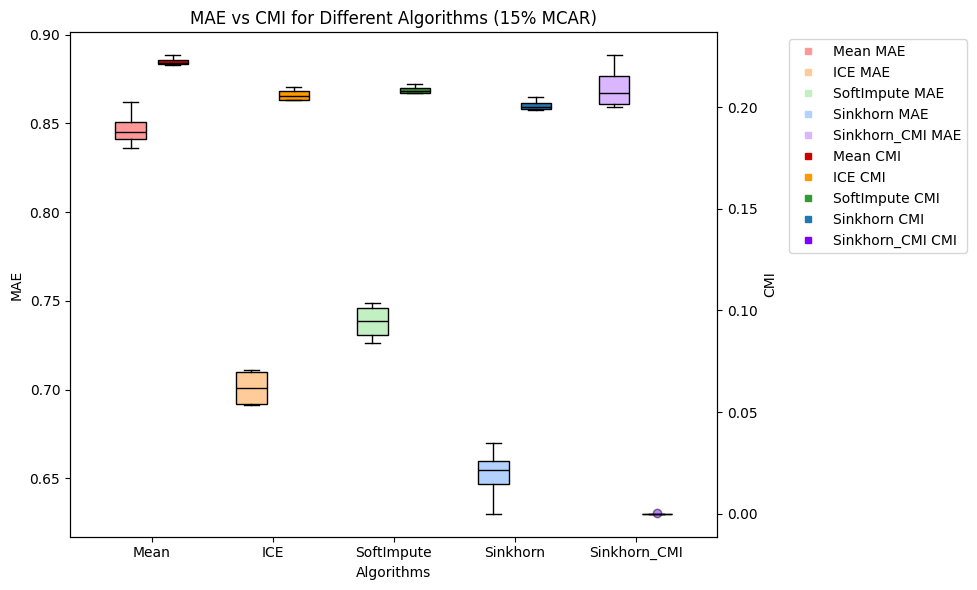

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar15 = {
    'Mean': mnar_mean_cmi15,
    'ICE': mnar_ice_cmi15,
    'SoftImpute': mnar_soft_cmi15,
    'Sinkhorn': mnar_sk_cmi15,
    'Sinkhorn_CMI': mnar_skCmi_cmi15
}
mae_data_mnar15 = {
    'Mean': mnar_mean_mae15,
    'ICE': mnar_ice_mae15,
    'SoftImpute': mnar_soft_mae15,
    'Sinkhorn': mnar_sk_mae15,
    'Sinkhorn_CMI': mnar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar15[algo]
    cmi_vals = cmi_data_mnar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae20, mnar_sk_cmi20, mnar_skCmi_mae20, mnar_skCmi_cmi20, mnar_mean_mae20, mnar_mean_cmi20, mnar_ice_mae20, mnar_ice_cmi20, mnar_soft_mae20, mnar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4633
INFO:root:Iteration 0:	 Loss: 2.6567	 Validation MAE: 0.8531	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 2.0398	 Validation MAE: 0.7599	RMSE: 0.9735
INFO:root:Iteration 100:	 Loss: 2.0552	 Validation MAE: 0.7289	RMSE: 0.9665
INFO:root:Iteration 150:	 Loss: 1.9240	 Validation MAE: 0.7126	RMSE: 0.9637
INFO:root:Iteration 200:	 Loss: 2.1285	 Validation MAE: 0.6986	RMSE: 0.9621
INFO:root:Iteration 250:	 Loss: 2.0264	 Validation MAE: 0.6875	RMSE: 0.9557
INFO:root:Iteration 300:	 Loss: 1.9867	 Validation MAE: 0.6799	RMSE: 0.9551
INFO:root:Iteration 350:	 Loss: 2.2002	 Validation MAE: 0.6740	RMSE: 0.9539
INFO:root:Iteration 400:	 Loss: 1.9239	 Validation MAE: 0.6739	RMSE: 0.9562
INFO:root:Iteration 450:	 Loss: 1.9685	 Validation MAE: 0.6706	RMSE: 0.9567
INFO:root:Iteration 500:	 Loss: 2.0511	 Validation MAE: 0.6688	RMSE: 0.9559
INFO:root:Iteration 550:	 Loss: 2.2345	 Validation MAE: 0.6661	RMSE: 0.9552
INFO:root:Iteration 600:	 Loss: 2.0395	 Validat

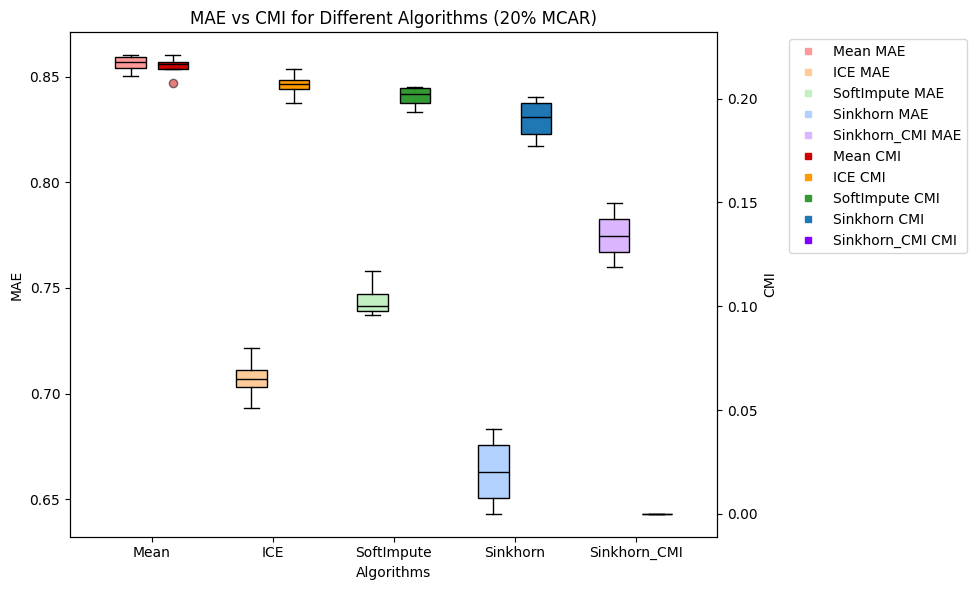

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar20 = {
    'Mean': mnar_mean_cmi20,
    'ICE': mnar_ice_cmi20,
    'SoftImpute': mnar_soft_cmi20,
    'Sinkhorn': mnar_sk_cmi20,
    'Sinkhorn_CMI': mnar_skCmi_cmi20
}
mae_data_mnar20 = {
    'Mean': mnar_mean_mae20,
    'ICE': mnar_ice_mae20,
    'SoftImpute': mnar_soft_mae20,
    'Sinkhorn': mnar_sk_mae20,
    'Sinkhorn_CMI': mnar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar20[algo]
    cmi_vals = cmi_data_mnar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae25, mnar_sk_cmi25, mnar_skCmi_mae25, mnar_skCmi_cmi25, mnar_mean_mae25, mnar_mean_cmi25, mnar_ice_mae25, mnar_ice_cmi25, mnar_soft_mae25, mnar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

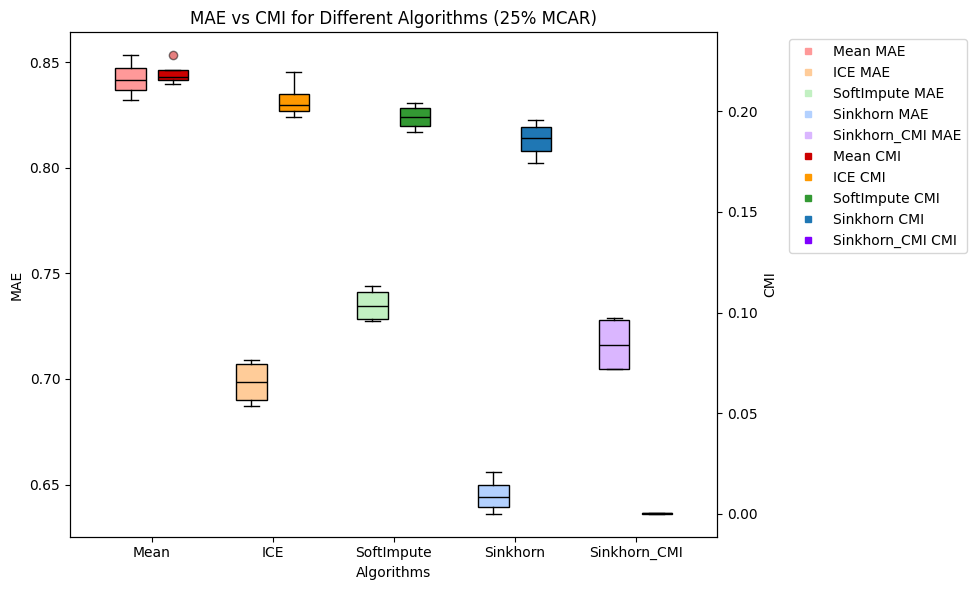

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar25 = {
    'Mean': mnar_mean_cmi25,
    'ICE': mnar_ice_cmi25,
    'SoftImpute': mnar_soft_cmi25,
    'Sinkhorn': mnar_sk_cmi25,
    'Sinkhorn_CMI': mnar_skCmi_cmi25
}
mae_data_mnar25 = {
    'Mean': mnar_mean_mae25,
    'ICE': mnar_ice_mae25,
    'SoftImpute': mnar_soft_mae25,
    'Sinkhorn': mnar_sk_mae25,
    'Sinkhorn_CMI': mnar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar25[algo]
    cmi_vals = cmi_data_mnar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae30, mnar_sk_cmi30, mnar_skCmi_mae30, mnar_skCmi_cmi30, mnar_mean_mae30, mnar_mean_cmi30, mnar_ice_mae30, mnar_ice_cmi30, mnar_soft_mae30, mnar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

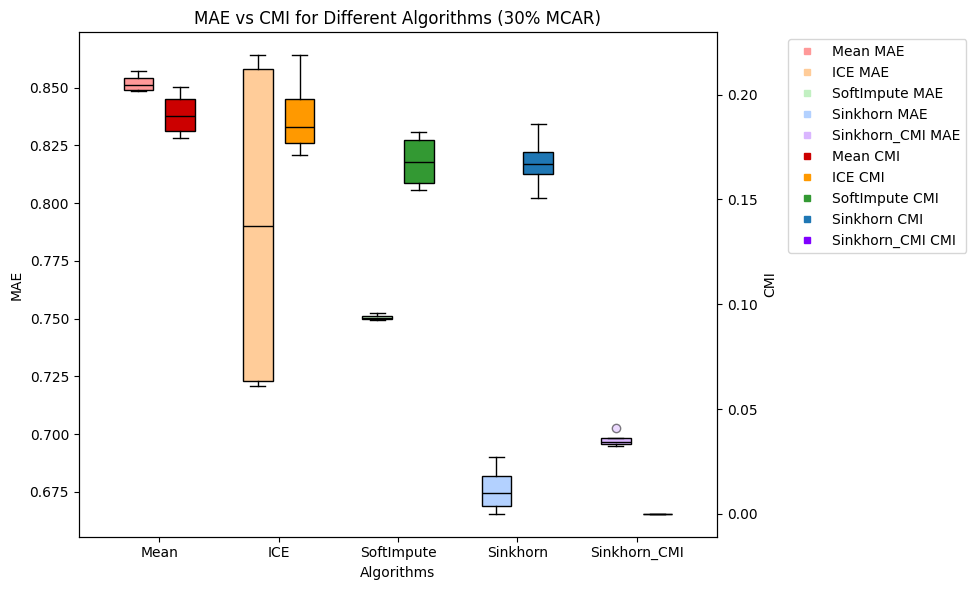

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar30 = {
    'Mean': mnar_mean_cmi30,
    'ICE': mnar_ice_cmi30,
    'SoftImpute': mnar_soft_cmi30,
    'Sinkhorn': mnar_sk_cmi30,
    'Sinkhorn_CMI': mnar_skCmi_cmi30
}
mae_data_mnar30 = {
    'Mean': mnar_mean_mae30,
    'ICE': mnar_ice_mae30,
    'SoftImpute': mnar_soft_mae30,
    'Sinkhorn': mnar_sk_mae30,
    'Sinkhorn_CMI': mnar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar30[algo]
    cmi_vals = cmi_data_mnar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


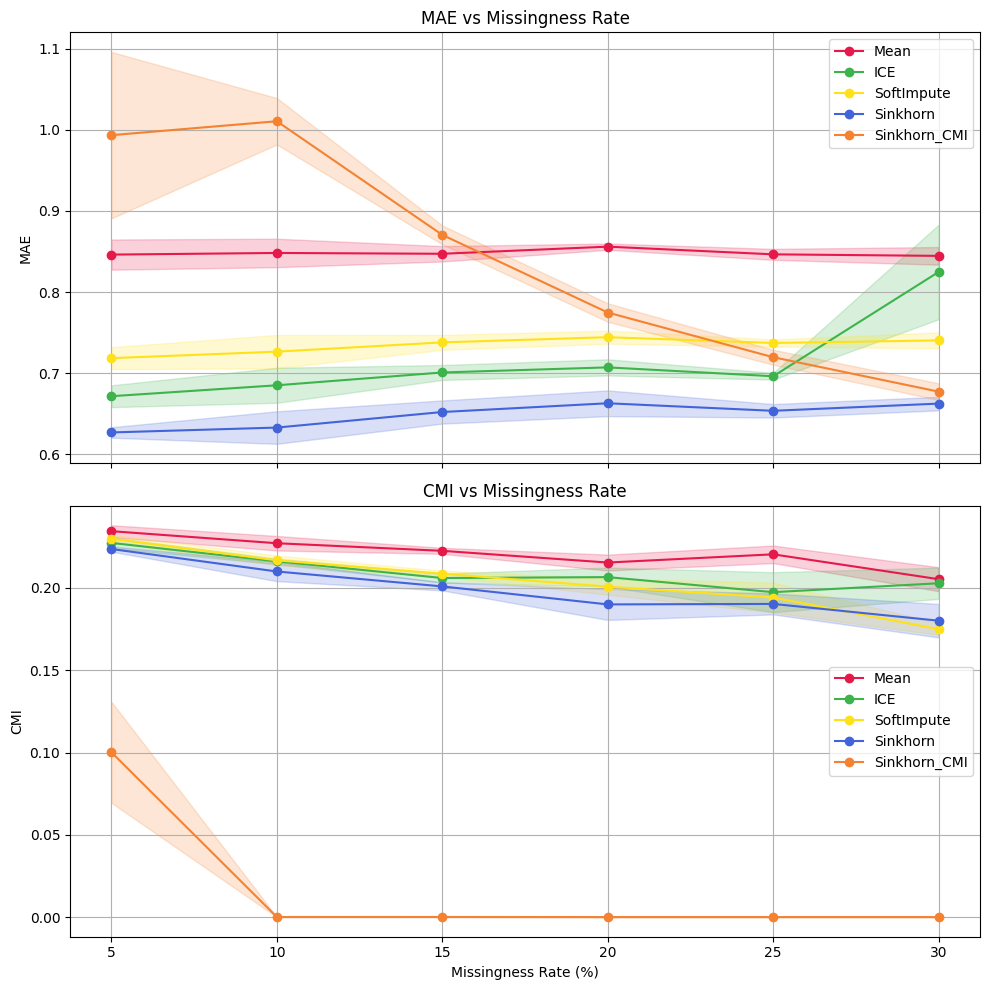

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mnar_mean_mae5, mnar_mean_mae10, mnar_mean_mae15, mnar_mean_mae20, mnar_mean_mae25, mnar_mean_mae30],
    'ICE': [mnar_ice_mae5, mnar_ice_mae10, mnar_ice_mae15, mnar_ice_mae20, mnar_ice_mae25, mnar_ice_mae30],
    'SoftImpute': [mnar_soft_mae5, mnar_soft_mae10, mnar_soft_mae15, mnar_soft_mae20, mnar_soft_mae25, mnar_soft_mae30],
    'Sinkhorn': [mnar_sk_mae5, mnar_sk_mae10, mnar_sk_mae15, mnar_sk_mae20, mnar_sk_mae25, mnar_sk_mae30],
    'Sinkhorn_CMI': [mnar_skCmi_mae5, mnar_skCmi_mae10, mnar_skCmi_mae15, mnar_skCmi_mae20, mnar_skCmi_mae25, mnar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mnar_mean_cmi5, mnar_mean_cmi10, mnar_mean_cmi15, mnar_mean_cmi20, mnar_mean_cmi25, mnar_mean_cmi30],
    'ICE': [mnar_ice_cmi5, mnar_ice_cmi10, mnar_ice_cmi15, mnar_ice_cmi20, mnar_ice_cmi25, mnar_ice_cmi30],
    'SoftImpute': [mnar_soft_cmi5, mnar_soft_cmi10, mnar_soft_cmi15, mnar_soft_cmi20, mnar_soft_cmi25, mnar_soft_cmi30],
    'Sinkhorn': [mnar_sk_cmi5, mnar_sk_cmi10, mnar_sk_cmi15, mnar_sk_cmi20, mnar_sk_cmi25, mnar_sk_cmi30],
    'Sinkhorn_CMI': [mnar_skCmi_cmi5, mnar_skCmi_cmi10, mnar_skCmi_cmi15, mnar_skCmi_cmi20, mnar_skCmi_cmi25, mnar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


### Data Fairness (IAPD)

In [ ]:
sensitive_attribute_index = 1

In [ ]:
groundTruth_scaled_numpy = groundTruth_scaled.to_numpy()
protected_attr = groundTruth_scaled_numpy[:,sensitive_attribute_index]
protected_attr  = bucketize(protected_attr)
groundTruth_scaled_numpy[:,sensitive_attribute_index] = protected_attr

MCAR

5% MCAR 

In [ ]:

missing_type = "MCAR"
missing_rate = 5
dependencies = None
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mcar5 = []
sk_cmi_iapd_mcar5 = []
mean_iapd_mcar5 = []
ice_iapd_mcar5 = []
soft_iapd_mcar5 = []


for i in range(0,4):
    sk_imp_data5, sk_cmi_imp_data5, mean_imp_data5, ice_imp_data5, soft_imp_data5= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap5, sk_cmi_iap5, mean_iap5, ice_iap5, soft_iap5 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data5, sk_cmi_imp_data5, mean_imp_data5, ice_imp_data5, soft_imp_data5 )

    
    sk_iapd_mcar5.append(sk_iap5)

    
    sk_cmi_iapd_mcar5.append(sk_cmi_iap5)

   
    mean_iapd_mcar5.append(mean_iap5)

    
    ice_iapd_mcar5.append(ice_iap5)


    soft_iapd_mcar5.append(soft_iap5)
    


INFO:root:batchsize = 128, epsilon = 0.5473
INFO:root:Iteration 0:	 Loss: 2.5277
INFO:root:Iteration 50:	 Loss: 2.7045
INFO:root:Iteration 100:	 Loss: 2.5489
INFO:root:Iteration 150:	 Loss: 2.3723
INFO:root:Iteration 200:	 Loss: 2.5042
INFO:root:Iteration 250:	 Loss: 2.1542
INFO:root:Iteration 300:	 Loss: 2.3083
INFO:root:Iteration 350:	 Loss: 2.7163
INFO:root:Iteration 400:	 Loss: 2.2206
INFO:root:Iteration 450:	 Loss: 2.4567
INFO:root:Iteration 500:	 Loss: 2.3191
INFO:root:Iteration 550:	 Loss: 2.4819
INFO:root:Iteration 600:	 Loss: 2.3904
INFO:root:Iteration 650:	 Loss: 2.4445
INFO:root:Iteration 700:	 Loss: 2.3094
INFO:root:Iteration 750:	 Loss: 2.5732
INFO:root:Iteration 800:	 Loss: 2.6038
INFO:root:Iteration 850:	 Loss: 2.9781
INFO:root:Iteration 900:	 Loss: 2.1650
INFO:root:Iteration 950:	 Loss: 2.4391
INFO:root:Iteration 1000:	 Loss: 2.0917
INFO:root:Iteration 1050:	 Loss: 2.3376
INFO:root:Iteration 1100:	 Loss: 2.5819
INFO:root:Iteration 1150:	 Loss: 2.6692
INFO:root:Iteration

10% MCAR

In [ ]:

missing_type = "MCAR"
missing_rate = 10
dependencies = None
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mcar10 = []
sk_cmi_iapd_mcar10 = []
mean_iapd_mcar10 = []
ice_iapd_mcar10 = []
soft_iapd_mcar10 = []


for i in range(0,4):
    sk_imp_data10, sk_cmi_imp_data10, mean_imp_data10, ice_imp_data10, soft_imp_data10= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap10, sk_cmi_iap10, mean_iap10, ice_iap10, soft_iap10 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data10, sk_cmi_imp_data10, mean_imp_data10, ice_imp_data10, soft_imp_data10 )

    
    sk_iapd_mcar10.append(sk_iap10)

    
    sk_cmi_iapd_mcar10.append(sk_cmi_iap10)

   
    mean_iapd_mcar10.append(mean_iap10)

    
    ice_iapd_mcar10.append(ice_iap10)


    soft_iapd_mcar10.append(soft_iap10)

INFO:root:batchsize = 128, epsilon = 0.5205
INFO:root:Iteration 0:	 Loss: 2.4362
INFO:root:Iteration 50:	 Loss: 2.2458
INFO:root:Iteration 100:	 Loss: 2.4312
INFO:root:Iteration 150:	 Loss: 2.5315
INFO:root:Iteration 200:	 Loss: 2.3825
INFO:root:Iteration 250:	 Loss: 2.2474
INFO:root:Iteration 300:	 Loss: 2.1872
INFO:root:Iteration 350:	 Loss: 2.3870
INFO:root:Iteration 400:	 Loss: 2.2734
INFO:root:Iteration 450:	 Loss: 2.1773
INFO:root:Iteration 500:	 Loss: 2.2903
INFO:root:Iteration 550:	 Loss: 2.3959
INFO:root:Iteration 600:	 Loss: 2.3536
INFO:root:Iteration 650:	 Loss: 2.2864
INFO:root:Iteration 700:	 Loss: 2.2899
INFO:root:Iteration 750:	 Loss: 2.3736
INFO:root:Iteration 800:	 Loss: 2.4234
INFO:root:Iteration 850:	 Loss: 2.3320
INFO:root:Iteration 900:	 Loss: 2.5886
INFO:root:Iteration 950:	 Loss: 2.3297
INFO:root:Iteration 1000:	 Loss: 2.1767
INFO:root:Iteration 1050:	 Loss: 2.2996
INFO:root:Iteration 1100:	 Loss: 2.2624
INFO:root:Iteration 1150:	 Loss: 2.5078
INFO:root:Iteration

15% MCAR

In [ ]:

missing_type = "MCAR"
missing_rate = 15
dependencies = None
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mcar15 = []
sk_cmi_iapd_mcar15 = []
mean_iapd_mcar15 = []
ice_iapd_mcar15 = []
soft_iapd_mcar15 = []


for i in range(0,4):
    sk_imp_data15, sk_cmi_imp_data15, mean_imp_data15, ice_imp_data15, soft_imp_data15 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap15, sk_cmi_iap15, mean_iap15, ice_iap15, soft_iap15 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data15, sk_cmi_imp_data15, mean_imp_data15, ice_imp_data15, soft_imp_data15 )

    
    sk_iapd_mcar15.append(sk_iap15)

    
    sk_cmi_iapd_mcar15.append(sk_cmi_iap15)

   
    mean_iapd_mcar15.append(mean_iap15)

    
    ice_iapd_mcar15.append(ice_iap15)


    soft_iapd_mcar15.append(soft_iap15)

INFO:root:batchsize = 128, epsilon = 0.4926
INFO:root:Iteration 0:	 Loss: 2.3689
INFO:root:Iteration 50:	 Loss: 2.3100
INFO:root:Iteration 100:	 Loss: 2.3322
INFO:root:Iteration 150:	 Loss: 2.4148
INFO:root:Iteration 200:	 Loss: 2.1983
INFO:root:Iteration 250:	 Loss: 2.4914
INFO:root:Iteration 300:	 Loss: 2.5135
INFO:root:Iteration 350:	 Loss: 1.9791
INFO:root:Iteration 400:	 Loss: 2.5136
INFO:root:Iteration 450:	 Loss: 2.2260
INFO:root:Iteration 500:	 Loss: 2.5163
INFO:root:Iteration 550:	 Loss: 2.3556
INFO:root:Iteration 600:	 Loss: 2.2695
INFO:root:Iteration 650:	 Loss: 2.2129
INFO:root:Iteration 700:	 Loss: 2.3386
INFO:root:Iteration 750:	 Loss: 2.0114
INFO:root:Iteration 800:	 Loss: 2.1785
INFO:root:Iteration 850:	 Loss: 2.3827
INFO:root:Iteration 900:	 Loss: 2.4192
INFO:root:Iteration 950:	 Loss: 2.6170
INFO:root:Iteration 1000:	 Loss: 2.3663
INFO:root:Iteration 1050:	 Loss: 2.2366
INFO:root:Iteration 1100:	 Loss: 2.1923
INFO:root:Iteration 1150:	 Loss: 2.2794
INFO:root:Iteration

20% MCAR

In [ ]:

missing_type = "MCAR"
missing_rate = 20
dependencies = None
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mcar20 = []
sk_cmi_iapd_mcar20 = []
mean_iapd_mcar20 = []
ice_iapd_mcar20 = []
soft_iapd_mcar20 = []


# X and Y is scaled to z-score

for i in range(0,4):
    sk_imp_data20, sk_cmi_imp_data20, mean_imp_data20, ice_imp_data20, soft_imp_data20 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap20, sk_cmi_iap20, mean_iap20, ice_iap20, soft_iap20 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data20, sk_cmi_imp_data20, mean_imp_data20, ice_imp_data20, soft_imp_data20)

    
    sk_iapd_mcar20.append(sk_iap20)

    
    sk_cmi_iapd_mcar20.append(sk_cmi_iap20)

   
    mean_iapd_mcar20.append(mean_iap20)

    
    ice_iapd_mcar20.append(ice_iap20)


    soft_iapd_mcar20.append(soft_iap20)

INFO:root:batchsize = 128, epsilon = 0.4639
INFO:root:Iteration 0:	 Loss: 2.4777
INFO:root:Iteration 50:	 Loss: 2.0835
INFO:root:Iteration 100:	 Loss: 1.9488
INFO:root:Iteration 150:	 Loss: 2.1571
INFO:root:Iteration 200:	 Loss: 2.4531
INFO:root:Iteration 250:	 Loss: 2.1031
INFO:root:Iteration 300:	 Loss: 2.1443
INFO:root:Iteration 350:	 Loss: 2.1215
INFO:root:Iteration 400:	 Loss: 2.4072
INFO:root:Iteration 450:	 Loss: 2.2743
INFO:root:Iteration 500:	 Loss: 2.1909
INFO:root:Iteration 550:	 Loss: 2.2410
INFO:root:Iteration 600:	 Loss: 2.1313
INFO:root:Iteration 650:	 Loss: 2.1696
INFO:root:Iteration 700:	 Loss: 2.1137
INFO:root:Iteration 750:	 Loss: 2.0960
INFO:root:Iteration 800:	 Loss: 2.0704
INFO:root:Iteration 850:	 Loss: 2.1402
INFO:root:Iteration 900:	 Loss: 1.8804
INFO:root:Iteration 950:	 Loss: 2.0953
INFO:root:Iteration 1000:	 Loss: 2.0441
INFO:root:Iteration 1050:	 Loss: 2.0036
INFO:root:Iteration 1100:	 Loss: 2.0603
INFO:root:Iteration 1150:	 Loss: 2.2348
INFO:root:Iteration

25% MCAR

In [ ]:

missing_type = "MCAR"
missing_rate = 25
dependencies = None
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mcar25 = []
sk_cmi_iapd_mcar25 = []
mean_iapd_mcar25 = []
ice_iapd_mcar25 = []
soft_iapd_mcar25 = []


for i in range(0,4):
    sk_imp_data25, sk_cmi_imp_data25, mean_imp_data25, ice_imp_data25, soft_imp_data25= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap25, sk_cmi_iap25, mean_iap25, ice_iap25, soft_iap25 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data25, sk_cmi_imp_data25, mean_imp_data25, ice_imp_data25, soft_imp_data25 )

    
    sk_iapd_mcar25.append(sk_iap25)

    
    sk_cmi_iapd_mcar25.append(sk_cmi_iap25)

   
    mean_iapd_mcar25.append(mean_iap25)

    
    ice_iapd_mcar25.append(ice_iap25)


    soft_iapd_mcar25.append(soft_iap25)

INFO:root:batchsize = 128, epsilon = 0.4362
INFO:root:Iteration 0:	 Loss: 2.2738
INFO:root:Iteration 50:	 Loss: 1.8830


INFO:root:Iteration 100:	 Loss: 2.0471
INFO:root:Iteration 150:	 Loss: 2.1578
INFO:root:Iteration 200:	 Loss: 1.9592
INFO:root:Iteration 250:	 Loss: 1.9477
INFO:root:Iteration 300:	 Loss: 1.9814
INFO:root:Iteration 350:	 Loss: 2.0898
INFO:root:Iteration 400:	 Loss: 2.0092
INFO:root:Iteration 450:	 Loss: 2.0271
INFO:root:Iteration 500:	 Loss: 2.3097
INFO:root:Iteration 550:	 Loss: 1.9605
INFO:root:Iteration 600:	 Loss: 2.0324
INFO:root:Iteration 650:	 Loss: 2.2092
INFO:root:Iteration 700:	 Loss: 2.5118
INFO:root:Iteration 750:	 Loss: 2.0903
INFO:root:Iteration 800:	 Loss: 1.9348
INFO:root:Iteration 850:	 Loss: 2.1703
INFO:root:Iteration 900:	 Loss: 2.0774
INFO:root:Iteration 950:	 Loss: 1.9999
INFO:root:Iteration 1000:	 Loss: 2.2154
INFO:root:Iteration 1050:	 Loss: 2.0279
INFO:root:Iteration 1100:	 Loss: 1.8104
INFO:root:Iteration 1150:	 Loss: 2.0040
INFO:root:Iteration 1200:	 Loss: 2.3891
INFO:root:Iteration 1250:	 Loss: 2.0204
INFO:root:Iteration 1300:	 Loss: 1.8575
INFO:root:Iteratio

30% MCAR

In [ ]:

missing_type = "MCAR"
missing_rate = 30
dependencies = None
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mcar30 = []
sk_cmi_iapd_mcar30 = []
mean_iapd_mcar30 = []
ice_iapd_mcar30 = []
soft_iapd_mcar30 = []


for i in range(0,4):
    sk_imp_data30, sk_cmi_imp_data30, mean_imp_data30, ice_imp_data30, soft_imp_data30 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap30, sk_cmi_iap30, mean_iap30, ice_iap30, soft_iap30 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data30,  sk_cmi_imp_data30, mean_imp_data30, ice_imp_data30, soft_imp_data30)

    
    sk_iapd_mcar30.append(sk_iap30)

    
    sk_cmi_iapd_mcar30.append(sk_cmi_iap30)

   
    mean_iapd_mcar30.append(mean_iap30)

    
    ice_iapd_mcar30.append(ice_iap30)


    soft_iapd_mcar30.append(soft_iap30)

INFO:root:batchsize = 128, epsilon = 0.4094
INFO:root:Iteration 0:	 Loss: 2.1429
INFO:root:Iteration 50:	 Loss: 2.2240


INFO:root:Iteration 100:	 Loss: 2.1515
INFO:root:Iteration 150:	 Loss: 1.7058
INFO:root:Iteration 200:	 Loss: 2.0483
INFO:root:Iteration 250:	 Loss: 2.0153
INFO:root:Iteration 300:	 Loss: 2.1649
INFO:root:Iteration 350:	 Loss: 1.9753
INFO:root:Iteration 400:	 Loss: 1.8454
INFO:root:Iteration 450:	 Loss: 1.7789
INFO:root:Iteration 500:	 Loss: 1.9526
INFO:root:Iteration 550:	 Loss: 1.8413
INFO:root:Iteration 600:	 Loss: 1.9655
INFO:root:Iteration 650:	 Loss: 1.8051
INFO:root:Iteration 700:	 Loss: 1.8367
INFO:root:Iteration 750:	 Loss: 1.7734
INFO:root:Iteration 800:	 Loss: 1.9608
INFO:root:Iteration 850:	 Loss: 1.7518
INFO:root:Iteration 900:	 Loss: 1.6271
INFO:root:Iteration 950:	 Loss: 1.8804
INFO:root:Iteration 1000:	 Loss: 2.0513
INFO:root:Iteration 1050:	 Loss: 1.8510
INFO:root:Iteration 1100:	 Loss: 2.0688
INFO:root:Iteration 1150:	 Loss: 2.0021
INFO:root:Iteration 1200:	 Loss: 1.7050
INFO:root:Iteration 1250:	 Loss: 2.0386
INFO:root:Iteration 1300:	 Loss: 1.8340
INFO:root:Iteratio

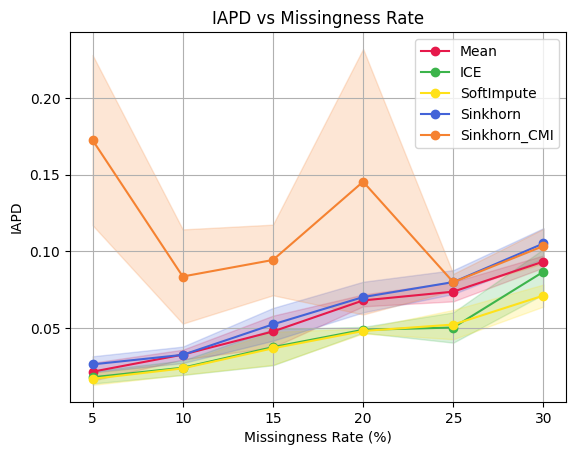

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5,10,15,20,25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
iapd_results_mcar = {
    'Mean': [mean_iapd_mcar5, mean_iapd_mcar10, mean_iapd_mcar15, mean_iapd_mcar20, mean_iapd_mcar25, mean_iapd_mcar30],
    'ICE': [ice_iapd_mcar5, ice_iapd_mcar10, ice_iapd_mcar15, ice_iapd_mcar20, ice_iapd_mcar25, ice_iapd_mcar30],
    'SoftImpute': [soft_iapd_mcar5, soft_iapd_mcar10, soft_iapd_mcar15, soft_iapd_mcar20, soft_iapd_mcar25, soft_iapd_mcar30],
    'Sinkhorn': [sk_iapd_mcar5, sk_iapd_mcar10, sk_iapd_mcar15, sk_iapd_mcar20, sk_iapd_mcar25,sk_iapd_mcar30],
    'Sinkhorn_CMI': [sk_cmi_iapd_mcar5,sk_cmi_iapd_mcar10,sk_cmi_iapd_mcar15,sk_cmi_iapd_mcar20,sk_cmi_iapd_mcar25,sk_cmi_iapd_mcar30]
}



fig, ax1 = plt.subplots()
# Now ax1 is a single Axes object



for i, algo in enumerate(algorithms):
    data = np.array(iapd_results_mcar[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('IAPD')
ax1.set_xlabel('Missingness Rate (%)')
ax1.set_title('IAPD vs Missingness Rate (MCAR)')
ax1.grid(True)
ax1.legend()



MAR

5% MAR 

In [ ]:

missing_type = "MAR"
missing_rate = 5
dependencies = dependencies_mar
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mar5 = []
sk_cmi_iapd_mar5 = []
mean_iapd_mar5 = []
ice_iapd_mar5 = []
soft_iapd_mar5 = []


for i in range(0,4):
    sk_imp_data5, sk_cmi_imp_data5, mean_imp_data5, ice_imp_data5, soft_imp_data5= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap5, sk_cmi_iap5, mean_iap5, ice_iap5, soft_iap5 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data5, sk_cmi_imp_data5, mean_imp_data5, ice_imp_data5, soft_imp_data5 )

    
    sk_iapd_mar5.append(sk_iap5)

    
    sk_cmi_iapd_mar5.append(sk_cmi_iap5)

   
    mean_iapd_mar5.append(mean_iap5)

    
    ice_iapd_mar5.append(ice_iap5)


    soft_iapd_mar5.append(soft_iap5)
    


INFO:root:batchsize = 128, epsilon = 0.5473
INFO:root:Iteration 0:	 Loss: 2.5277
INFO:root:Iteration 50:	 Loss: 2.7045
INFO:root:Iteration 100:	 Loss: 2.5489
INFO:root:Iteration 150:	 Loss: 2.3723
INFO:root:Iteration 200:	 Loss: 2.5042
INFO:root:Iteration 250:	 Loss: 2.1542
INFO:root:Iteration 300:	 Loss: 2.3083
INFO:root:Iteration 350:	 Loss: 2.7163
INFO:root:Iteration 400:	 Loss: 2.2206
INFO:root:Iteration 450:	 Loss: 2.4567
INFO:root:Iteration 500:	 Loss: 2.3191
INFO:root:Iteration 550:	 Loss: 2.4819
INFO:root:Iteration 600:	 Loss: 2.3904
INFO:root:Iteration 650:	 Loss: 2.4445
INFO:root:Iteration 700:	 Loss: 2.3094
INFO:root:Iteration 750:	 Loss: 2.5732
INFO:root:Iteration 800:	 Loss: 2.6038
INFO:root:Iteration 850:	 Loss: 2.9781
INFO:root:Iteration 900:	 Loss: 2.1650
INFO:root:Iteration 950:	 Loss: 2.4391
INFO:root:Iteration 1000:	 Loss: 2.0917
INFO:root:Iteration 1050:	 Loss: 2.3376
INFO:root:Iteration 1100:	 Loss: 2.5819
INFO:root:Iteration 1150:	 Loss: 2.6692
INFO:root:Iteration

10% MAR

In [ ]:

missing_type = "MAR"
missing_rate = 10
dependencies = dependencies_mar
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mar10 = []
sk_cmi_iapd_mar10 = []
mean_iapd_mar10 = []
ice_iapd_mar10 = []
soft_iapd_mar10 = []


for i in range(0,4):
    sk_imp_data10, sk_cmi_imp_data10, mean_imp_data10, ice_imp_data10, soft_imp_data10= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap10, sk_cmi_iap10, mean_iap10, ice_iap10, soft_iap10 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data10, sk_cmi_imp_data10, mean_imp_data10, ice_imp_data10, soft_imp_data10 )

    
    sk_iapd_mar10.append(sk_iap10)

    
    sk_cmi_iapd_mar10.append(sk_cmi_iap10)

   
    mean_iapd_mar10.append(mean_iap10)

    
    ice_iapd_mar10.append(ice_iap10)


    soft_iapd_mar10.append(soft_iap10)

INFO:root:batchsize = 128, epsilon = 0.5205
INFO:root:Iteration 0:	 Loss: 2.4362
INFO:root:Iteration 50:	 Loss: 2.2458
INFO:root:Iteration 100:	 Loss: 2.4312
INFO:root:Iteration 150:	 Loss: 2.5315
INFO:root:Iteration 200:	 Loss: 2.3825
INFO:root:Iteration 250:	 Loss: 2.2474
INFO:root:Iteration 300:	 Loss: 2.1872
INFO:root:Iteration 350:	 Loss: 2.3870
INFO:root:Iteration 400:	 Loss: 2.2734
INFO:root:Iteration 450:	 Loss: 2.1773
INFO:root:Iteration 500:	 Loss: 2.2903
INFO:root:Iteration 550:	 Loss: 2.3959
INFO:root:Iteration 600:	 Loss: 2.3536
INFO:root:Iteration 650:	 Loss: 2.2864
INFO:root:Iteration 700:	 Loss: 2.2899
INFO:root:Iteration 750:	 Loss: 2.3736
INFO:root:Iteration 800:	 Loss: 2.4234
INFO:root:Iteration 850:	 Loss: 2.3320
INFO:root:Iteration 900:	 Loss: 2.5886
INFO:root:Iteration 950:	 Loss: 2.3297
INFO:root:Iteration 1000:	 Loss: 2.1767
INFO:root:Iteration 1050:	 Loss: 2.2996
INFO:root:Iteration 1100:	 Loss: 2.2624
INFO:root:Iteration 1150:	 Loss: 2.5078
INFO:root:Iteration

15% MAR

In [ ]:

missing_type = "MAR"
missing_rate = 15
dependencies = dependencies_mar
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mar15 = []
sk_cmi_iapd_mar15 = []
mean_iapd_mar15 = []
ice_iapd_mar15 = []
soft_iapd_mar15 = []


for i in range(0,4):
    sk_imp_data15, sk_cmi_imp_data15, mean_imp_data15, ice_imp_data15, soft_imp_data15 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap15, sk_cmi_iap15, mean_iap15, ice_iap15, soft_iap15 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data15, sk_cmi_imp_data15, mean_imp_data15, ice_imp_data15, soft_imp_data15 )

    
    sk_iapd_mar15.append(sk_iap15)

    
    sk_cmi_iapd_mar15.append(sk_cmi_iap15)

   
    mean_iapd_mar15.append(mean_iap15)

    
    ice_iapd_mar15.append(ice_iap15)


    soft_iapd_mar15.append(soft_iap15)

INFO:root:batchsize = 128, epsilon = 0.4926
INFO:root:Iteration 0:	 Loss: 2.3689
INFO:root:Iteration 50:	 Loss: 2.3100
INFO:root:Iteration 100:	 Loss: 2.3322
INFO:root:Iteration 150:	 Loss: 2.4148
INFO:root:Iteration 200:	 Loss: 2.1983
INFO:root:Iteration 250:	 Loss: 2.4914
INFO:root:Iteration 300:	 Loss: 2.5135
INFO:root:Iteration 350:	 Loss: 1.9791
INFO:root:Iteration 400:	 Loss: 2.5136
INFO:root:Iteration 450:	 Loss: 2.2260
INFO:root:Iteration 500:	 Loss: 2.5163
INFO:root:Iteration 550:	 Loss: 2.3556
INFO:root:Iteration 600:	 Loss: 2.2695
INFO:root:Iteration 650:	 Loss: 2.2129
INFO:root:Iteration 700:	 Loss: 2.3386
INFO:root:Iteration 750:	 Loss: 2.0114
INFO:root:Iteration 800:	 Loss: 2.1785
INFO:root:Iteration 850:	 Loss: 2.3827
INFO:root:Iteration 900:	 Loss: 2.4192
INFO:root:Iteration 950:	 Loss: 2.6170
INFO:root:Iteration 1000:	 Loss: 2.3663
INFO:root:Iteration 1050:	 Loss: 2.2366
INFO:root:Iteration 1100:	 Loss: 2.1923
INFO:root:Iteration 1150:	 Loss: 2.2794
INFO:root:Iteration

20% MAR

In [ ]:

missing_type = "MAR"
missing_rate = 20
dependencies = dependencies_mar
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mar20 = []
sk_cmi_iapd_mar20 = []
mean_iapd_mar20 = []
ice_iapd_mar20 = []
soft_iapd_mar20 = []


# X and Y is scaled to z-score

for i in range(0,4):
    sk_imp_data20, sk_cmi_imp_data20, mean_imp_data20, ice_imp_data20, soft_imp_data20 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap20, sk_cmi_iap20, mean_iap20, ice_iap20, soft_iap20 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data20, sk_cmi_imp_data20, mean_imp_data20, ice_imp_data20, soft_imp_data20)

    
    sk_iapd_mar20.append(sk_iap20)

    
    sk_cmi_iapd_mar20.append(sk_cmi_iap20)

   
    mean_iapd_mar20.append(mean_iap20)

    
    ice_iapd_mar20.append(ice_iap20)


    soft_iapd_mar20.append(soft_iap20)

INFO:root:batchsize = 128, epsilon = 0.4639
INFO:root:Iteration 0:	 Loss: 2.4777
INFO:root:Iteration 50:	 Loss: 2.0835
INFO:root:Iteration 100:	 Loss: 1.9488
INFO:root:Iteration 150:	 Loss: 2.1571
INFO:root:Iteration 200:	 Loss: 2.4531
INFO:root:Iteration 250:	 Loss: 2.1031
INFO:root:Iteration 300:	 Loss: 2.1443
INFO:root:Iteration 350:	 Loss: 2.1215
INFO:root:Iteration 400:	 Loss: 2.4072
INFO:root:Iteration 450:	 Loss: 2.2743
INFO:root:Iteration 500:	 Loss: 2.1909
INFO:root:Iteration 550:	 Loss: 2.2410
INFO:root:Iteration 600:	 Loss: 2.1313
INFO:root:Iteration 650:	 Loss: 2.1696
INFO:root:Iteration 700:	 Loss: 2.1137
INFO:root:Iteration 750:	 Loss: 2.0960
INFO:root:Iteration 800:	 Loss: 2.0704
INFO:root:Iteration 850:	 Loss: 2.1402
INFO:root:Iteration 900:	 Loss: 1.8804
INFO:root:Iteration 950:	 Loss: 2.0953
INFO:root:Iteration 1000:	 Loss: 2.0441
INFO:root:Iteration 1050:	 Loss: 2.0036
INFO:root:Iteration 1100:	 Loss: 2.0603
INFO:root:Iteration 1150:	 Loss: 2.2348
INFO:root:Iteration

25% MAR

In [ ]:

missing_type = "MAR"
missing_rate = 25
dependencies = dependencies_mar
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mar25 = []
sk_cmi_iapd_mar25 = []
mean_iapd_mar25 = []
ice_iapd_mar25 = []
soft_iapd_mar25 = []


for i in range(0,4):
    sk_imp_data25, sk_cmi_imp_data25, mean_imp_data25, ice_imp_data25, soft_imp_data25= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap25, sk_cmi_iap25, mean_iap25, ice_iap25, soft_iap25 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data25, sk_cmi_imp_data25, mean_imp_data25, ice_imp_data25, soft_imp_data25 )

    
    sk_iapd_mar25.append(sk_iap25)

    
    sk_cmi_iapd_mar25.append(sk_cmi_iap25)

   
    mean_iapd_mar25.append(mean_iap25)

    
    ice_iapd_mar25.append(ice_iap25)


    soft_iapd_mar25.append(soft_iap25)

INFO:root:batchsize = 128, epsilon = 0.4362
INFO:root:Iteration 0:	 Loss: 2.2738
INFO:root:Iteration 50:	 Loss: 1.8830


INFO:root:Iteration 100:	 Loss: 2.0471
INFO:root:Iteration 150:	 Loss: 2.1578
INFO:root:Iteration 200:	 Loss: 1.9592
INFO:root:Iteration 250:	 Loss: 1.9477
INFO:root:Iteration 300:	 Loss: 1.9814
INFO:root:Iteration 350:	 Loss: 2.0898
INFO:root:Iteration 400:	 Loss: 2.0092
INFO:root:Iteration 450:	 Loss: 2.0271
INFO:root:Iteration 500:	 Loss: 2.3097
INFO:root:Iteration 550:	 Loss: 1.9605
INFO:root:Iteration 600:	 Loss: 2.0324
INFO:root:Iteration 650:	 Loss: 2.2092
INFO:root:Iteration 700:	 Loss: 2.5118
INFO:root:Iteration 750:	 Loss: 2.0903
INFO:root:Iteration 800:	 Loss: 1.9348
INFO:root:Iteration 850:	 Loss: 2.1703
INFO:root:Iteration 900:	 Loss: 2.0774
INFO:root:Iteration 950:	 Loss: 1.9999
INFO:root:Iteration 1000:	 Loss: 2.2154
INFO:root:Iteration 1050:	 Loss: 2.0279
INFO:root:Iteration 1100:	 Loss: 1.8104
INFO:root:Iteration 1150:	 Loss: 2.0040
INFO:root:Iteration 1200:	 Loss: 2.3891
INFO:root:Iteration 1250:	 Loss: 2.0204
INFO:root:Iteration 1300:	 Loss: 1.8575
INFO:root:Iteratio

30% MAR

In [ ]:

missing_type = "MAR"
missing_rate = 30
dependencies = None
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mar30 = []
sk_cmi_iapd_mar30 = []
mean_iapd_mar30 = []
ice_iapd_mar30 = []
soft_iapd_mar30 = []


for i in range(0,4):
    sk_imp_data30, sk_cmi_imp_data30, mean_imp_data30, ice_imp_data30, soft_imp_data30 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap30, sk_cmi_iap30, mean_iap30, ice_iap30, soft_iap30 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data30,  sk_cmi_imp_data30, mean_imp_data30, ice_imp_data30, soft_imp_data30)

    
    sk_iapd_mar30.append(sk_iap30)

    
    sk_cmi_iapd_mar30.append(sk_cmi_iap30)

   
    mean_iapd_mar30.append(mean_iap30)

    
    ice_iapd_mar30.append(ice_iap30)


    soft_iapd_mar30.append(soft_iap30)

INFO:root:batchsize = 128, epsilon = 0.4094
INFO:root:Iteration 0:	 Loss: 2.1429
INFO:root:Iteration 50:	 Loss: 2.2240


INFO:root:Iteration 100:	 Loss: 2.1515
INFO:root:Iteration 150:	 Loss: 1.7058
INFO:root:Iteration 200:	 Loss: 2.0483
INFO:root:Iteration 250:	 Loss: 2.0153
INFO:root:Iteration 300:	 Loss: 2.1649
INFO:root:Iteration 350:	 Loss: 1.9753
INFO:root:Iteration 400:	 Loss: 1.8454
INFO:root:Iteration 450:	 Loss: 1.7789
INFO:root:Iteration 500:	 Loss: 1.9526
INFO:root:Iteration 550:	 Loss: 1.8413
INFO:root:Iteration 600:	 Loss: 1.9655
INFO:root:Iteration 650:	 Loss: 1.8051
INFO:root:Iteration 700:	 Loss: 1.8367
INFO:root:Iteration 750:	 Loss: 1.7734
INFO:root:Iteration 800:	 Loss: 1.9608
INFO:root:Iteration 850:	 Loss: 1.7518
INFO:root:Iteration 900:	 Loss: 1.6271
INFO:root:Iteration 950:	 Loss: 1.8804
INFO:root:Iteration 1000:	 Loss: 2.0513
INFO:root:Iteration 1050:	 Loss: 1.8510
INFO:root:Iteration 1100:	 Loss: 2.0688
INFO:root:Iteration 1150:	 Loss: 2.0021
INFO:root:Iteration 1200:	 Loss: 1.7050
INFO:root:Iteration 1250:	 Loss: 2.0386
INFO:root:Iteration 1300:	 Loss: 1.8340
INFO:root:Iteratio

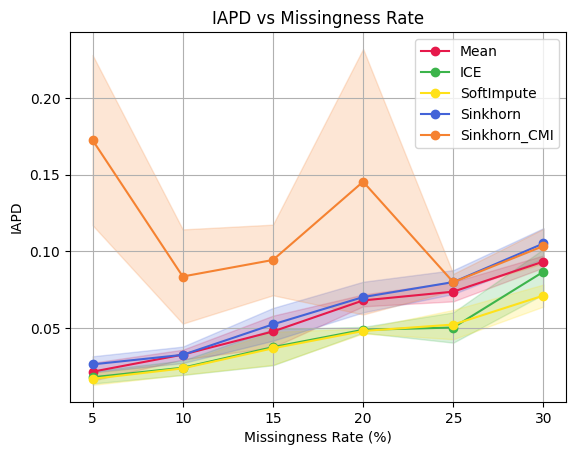

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5,10,15,20,25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
iapd_results_mar = {
    'Mean': [mean_iapd_mar5, mean_iapd_mar10, mean_iapd_mar15, mean_iapd_mar20, mean_iapd_mar25, mean_iapd_mar30],
    'ICE': [ice_iapd_mar5, ice_iapd_mar10, ice_iapd_mar15, ice_iapd_mar20, ice_iapd_mar25, ice_iapd_mar30],
    'SoftImpute': [soft_iapd_mar5, soft_iapd_mar10, soft_iapd_mar15, soft_iapd_mar20, soft_iapd_mar25, soft_iapd_mar30],
    'Sinkhorn': [sk_iapd_mar5, sk_iapd_mar10, sk_iapd_mar15, sk_iapd_mar20, sk_iapd_mar25,sk_iapd_mar30],
    'Sinkhorn_CMI': [sk_cmi_iapd_mar5,sk_cmi_iapd_mar10,sk_cmi_iapd_mar15,sk_cmi_iapd_mar20,sk_cmi_iapd_mar25,sk_cmi_iapd_mar30]
}



fig, ax1 = plt.subplots()
# Now ax1 is a single Axes object



for i, algo in enumerate(algorithms):
    data = np.array(iapd_results_mar[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('IAPD')
ax1.set_xlabel('Missingness Rate (%)')
ax1.set_title('IAPD vs Missingness Rate (MAR)')
ax1.grid(True)
ax1.legend()



MNAR

5% MNAR 

In [ ]:

missing_type = "MNAR"
missing_rate = 5
dependencies = dependencies_mnar
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mnar5 = []
sk_cmi_iapd_mnar5 = []
mean_iapd_mnar5 = []
ice_iapd_mnar5 = []
soft_iapd_mnar5 = []


for i in range(0,4):
    sk_imp_data5, sk_cmi_imp_data5, mean_imp_data5, ice_imp_data5, soft_imp_data5= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap5, sk_cmi_iap5, mean_iap5, ice_iap5, soft_iap5 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data5, sk_cmi_imp_data5, mean_imp_data5, ice_imp_data5, soft_imp_data5 )

    
    sk_iapd_mnar5.append(sk_iap5)

    
    sk_cmi_iapd_mnar5.append(sk_cmi_iap5)

   
    mean_iapd_mnar5.append(mean_iap5)

    
    ice_iapd_mnar5.append(ice_iap5)


    soft_iapd_mnar5.append(soft_iap5)
    


INFO:root:batchsize = 128, epsilon = 0.5473
INFO:root:Iteration 0:	 Loss: 2.5277
INFO:root:Iteration 50:	 Loss: 2.7045
INFO:root:Iteration 100:	 Loss: 2.5489
INFO:root:Iteration 150:	 Loss: 2.3723
INFO:root:Iteration 200:	 Loss: 2.5042
INFO:root:Iteration 250:	 Loss: 2.1542
INFO:root:Iteration 300:	 Loss: 2.3083
INFO:root:Iteration 350:	 Loss: 2.7163
INFO:root:Iteration 400:	 Loss: 2.2206
INFO:root:Iteration 450:	 Loss: 2.4567
INFO:root:Iteration 500:	 Loss: 2.3191
INFO:root:Iteration 550:	 Loss: 2.4819
INFO:root:Iteration 600:	 Loss: 2.3904
INFO:root:Iteration 650:	 Loss: 2.4445
INFO:root:Iteration 700:	 Loss: 2.3094
INFO:root:Iteration 750:	 Loss: 2.5732
INFO:root:Iteration 800:	 Loss: 2.6038
INFO:root:Iteration 850:	 Loss: 2.9781
INFO:root:Iteration 900:	 Loss: 2.1650
INFO:root:Iteration 950:	 Loss: 2.4391
INFO:root:Iteration 1000:	 Loss: 2.0917
INFO:root:Iteration 1050:	 Loss: 2.3376
INFO:root:Iteration 1100:	 Loss: 2.5819
INFO:root:Iteration 1150:	 Loss: 2.6692
INFO:root:Iteration

10% MNAR

In [ ]:

missing_type = "MNAR"
missing_rate = 10
dependencies = dependencies_mnar
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mnar10 = []
sk_cmi_iapd_mnar10 = []
mean_iapd_mnar10 = []
ice_iapd_mnar10 = []
soft_iapd_mnar10 = []


for i in range(0,4):
    sk_imp_data10, sk_cmi_imp_data10, mean_imp_data10, ice_imp_data10, soft_imp_data10= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap10, sk_cmi_iap10, mean_iap10, ice_iap10, soft_iap10 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data10, sk_cmi_imp_data10, mean_imp_data10, ice_imp_data10, soft_imp_data10 )

    
    sk_iapd_mnar10.append(sk_iap10)

    
    sk_cmi_iapd_mnar10.append(sk_cmi_iap10)

   
    mean_iapd_mnar10.append(mean_iap10)

    
    ice_iapd_mnar10.append(ice_iap10)


    soft_iapd_mnar10.append(soft_iap10)

INFO:root:batchsize = 128, epsilon = 0.5205
INFO:root:Iteration 0:	 Loss: 2.4362
INFO:root:Iteration 50:	 Loss: 2.2458
INFO:root:Iteration 100:	 Loss: 2.4312
INFO:root:Iteration 150:	 Loss: 2.5315
INFO:root:Iteration 200:	 Loss: 2.3825
INFO:root:Iteration 250:	 Loss: 2.2474
INFO:root:Iteration 300:	 Loss: 2.1872
INFO:root:Iteration 350:	 Loss: 2.3870
INFO:root:Iteration 400:	 Loss: 2.2734
INFO:root:Iteration 450:	 Loss: 2.1773
INFO:root:Iteration 500:	 Loss: 2.2903
INFO:root:Iteration 550:	 Loss: 2.3959
INFO:root:Iteration 600:	 Loss: 2.3536
INFO:root:Iteration 650:	 Loss: 2.2864
INFO:root:Iteration 700:	 Loss: 2.2899
INFO:root:Iteration 750:	 Loss: 2.3736
INFO:root:Iteration 800:	 Loss: 2.4234
INFO:root:Iteration 850:	 Loss: 2.3320
INFO:root:Iteration 900:	 Loss: 2.5886
INFO:root:Iteration 950:	 Loss: 2.3297
INFO:root:Iteration 1000:	 Loss: 2.1767
INFO:root:Iteration 1050:	 Loss: 2.2996
INFO:root:Iteration 1100:	 Loss: 2.2624
INFO:root:Iteration 1150:	 Loss: 2.5078
INFO:root:Iteration

15% MNAR

In [ ]:

missing_type = "MNAR"
missing_rate = 15
dependencies = dependencies_mnar
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mnar15 = []
sk_cmi_iapd_mnar15 = []
mean_iapd_mnar15 = []
ice_iapd_mnar15 = []
soft_iapd_mnar15 = []


for i in range(0,4):
    sk_imp_data15, sk_cmi_imp_data15, mean_imp_data15, ice_imp_data15, soft_imp_data15 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap15, sk_cmi_iap15, mean_iap15, ice_iap15, soft_iap15 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data15, sk_cmi_imp_data15, mean_imp_data15, ice_imp_data15, soft_imp_data15 )

    
    sk_iapd_mnar15.append(sk_iap15)

    
    sk_cmi_iapd_mnar15.append(sk_cmi_iap15)

   
    mean_iapd_mnar15.append(mean_iap15)

    
    ice_iapd_mnar15.append(ice_iap15)


    soft_iapd_mnar15.append(soft_iap15)

INFO:root:batchsize = 128, epsilon = 0.4926
INFO:root:Iteration 0:	 Loss: 2.3689
INFO:root:Iteration 50:	 Loss: 2.3100
INFO:root:Iteration 100:	 Loss: 2.3322
INFO:root:Iteration 150:	 Loss: 2.4148
INFO:root:Iteration 200:	 Loss: 2.1983
INFO:root:Iteration 250:	 Loss: 2.4914
INFO:root:Iteration 300:	 Loss: 2.5135
INFO:root:Iteration 350:	 Loss: 1.9791
INFO:root:Iteration 400:	 Loss: 2.5136
INFO:root:Iteration 450:	 Loss: 2.2260
INFO:root:Iteration 500:	 Loss: 2.5163
INFO:root:Iteration 550:	 Loss: 2.3556
INFO:root:Iteration 600:	 Loss: 2.2695
INFO:root:Iteration 650:	 Loss: 2.2129
INFO:root:Iteration 700:	 Loss: 2.3386
INFO:root:Iteration 750:	 Loss: 2.0114
INFO:root:Iteration 800:	 Loss: 2.1785
INFO:root:Iteration 850:	 Loss: 2.3827
INFO:root:Iteration 900:	 Loss: 2.4192
INFO:root:Iteration 950:	 Loss: 2.6170
INFO:root:Iteration 1000:	 Loss: 2.3663
INFO:root:Iteration 1050:	 Loss: 2.2366
INFO:root:Iteration 1100:	 Loss: 2.1923
INFO:root:Iteration 1150:	 Loss: 2.2794
INFO:root:Iteration

20% MNAR

In [ ]:

missing_type = "MNAR"
missing_rate = 20
dependencies = dependencies_mnar
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mnar20 = []
sk_cmi_iapd_mnar20 = []
mean_iapd_mnar20 = []
ice_iapd_mnar20 = []
soft_iapd_mnar20 = []


# X and Y is scaled to z-score

for i in range(0,4):
    sk_imp_data20, sk_cmi_imp_data20, mean_imp_data20, ice_imp_data20, soft_imp_data20 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap20, sk_cmi_iap20, mean_iap20, ice_iap20, soft_iap20 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data20, sk_cmi_imp_data20, mean_imp_data20, ice_imp_data20, soft_imp_data20)

    
    sk_iapd_mnar20.append(sk_iap20)

    
    sk_cmi_iapd_mnar20.append(sk_cmi_iap20)

   
    mean_iapd_mnar20.append(mean_iap20)

    
    ice_iapd_mnar20.append(ice_iap20)


    soft_iapd_mnar20.append(soft_iap20)

INFO:root:batchsize = 128, epsilon = 0.4639
INFO:root:Iteration 0:	 Loss: 2.4777
INFO:root:Iteration 50:	 Loss: 2.0835
INFO:root:Iteration 100:	 Loss: 1.9488
INFO:root:Iteration 150:	 Loss: 2.1571
INFO:root:Iteration 200:	 Loss: 2.4531
INFO:root:Iteration 250:	 Loss: 2.1031
INFO:root:Iteration 300:	 Loss: 2.1443
INFO:root:Iteration 350:	 Loss: 2.1215
INFO:root:Iteration 400:	 Loss: 2.4072
INFO:root:Iteration 450:	 Loss: 2.2743
INFO:root:Iteration 500:	 Loss: 2.1909
INFO:root:Iteration 550:	 Loss: 2.2410
INFO:root:Iteration 600:	 Loss: 2.1313
INFO:root:Iteration 650:	 Loss: 2.1696
INFO:root:Iteration 700:	 Loss: 2.1137
INFO:root:Iteration 750:	 Loss: 2.0960
INFO:root:Iteration 800:	 Loss: 2.0704
INFO:root:Iteration 850:	 Loss: 2.1402
INFO:root:Iteration 900:	 Loss: 1.8804
INFO:root:Iteration 950:	 Loss: 2.0953
INFO:root:Iteration 1000:	 Loss: 2.0441
INFO:root:Iteration 1050:	 Loss: 2.0036
INFO:root:Iteration 1100:	 Loss: 2.0603
INFO:root:Iteration 1150:	 Loss: 2.2348
INFO:root:Iteration

25% MNAR

In [ ]:

missing_type = "MNAR"
missing_rate = 25
dependencies = dependencies_mnar
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mnar25 = []
sk_cmi_iapd_mnar25 = []
mean_iapd_mnar25 = []
ice_iapd_mnar25 = []
soft_iapd_mnar25 = []


for i in range(0,4):
    sk_imp_data25, sk_cmi_imp_data25, mean_imp_data25, ice_imp_data25, soft_imp_data25= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap25, sk_cmi_iap25, mean_iap25, ice_iap25, soft_iap25 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data25, sk_cmi_imp_data25, mean_imp_data25, ice_imp_data25, soft_imp_data25 )

    
    sk_iapd_mnar25.append(sk_iap25)

    
    sk_cmi_iapd_mnar25.append(sk_cmi_iap25)

   
    mean_iapd_mnar25.append(mean_iap25)

    
    ice_iapd_mnar25.append(ice_iap25)


    soft_iapd_mnar25.append(soft_iap25)

INFO:root:batchsize = 128, epsilon = 0.4362
INFO:root:Iteration 0:	 Loss: 2.2738
INFO:root:Iteration 50:	 Loss: 1.8830


INFO:root:Iteration 100:	 Loss: 2.0471
INFO:root:Iteration 150:	 Loss: 2.1578
INFO:root:Iteration 200:	 Loss: 1.9592
INFO:root:Iteration 250:	 Loss: 1.9477
INFO:root:Iteration 300:	 Loss: 1.9814
INFO:root:Iteration 350:	 Loss: 2.0898
INFO:root:Iteration 400:	 Loss: 2.0092
INFO:root:Iteration 450:	 Loss: 2.0271
INFO:root:Iteration 500:	 Loss: 2.3097
INFO:root:Iteration 550:	 Loss: 1.9605
INFO:root:Iteration 600:	 Loss: 2.0324
INFO:root:Iteration 650:	 Loss: 2.2092
INFO:root:Iteration 700:	 Loss: 2.5118
INFO:root:Iteration 750:	 Loss: 2.0903
INFO:root:Iteration 800:	 Loss: 1.9348
INFO:root:Iteration 850:	 Loss: 2.1703
INFO:root:Iteration 900:	 Loss: 2.0774
INFO:root:Iteration 950:	 Loss: 1.9999
INFO:root:Iteration 1000:	 Loss: 2.2154
INFO:root:Iteration 1050:	 Loss: 2.0279
INFO:root:Iteration 1100:	 Loss: 1.8104
INFO:root:Iteration 1150:	 Loss: 2.0040
INFO:root:Iteration 1200:	 Loss: 2.3891
INFO:root:Iteration 1250:	 Loss: 2.0204
INFO:root:Iteration 1300:	 Loss: 1.8575
INFO:root:Iteratio

30% MNAR

In [ ]:

missing_type = "MNAR"
missing_rate = 30
dependencies = dependencies_mnar
highest_lamda_cmi = 30
niter = 5000
sk_iapd_mnar30 = []
sk_cmi_iapd_mnar30 = []
mean_iapd_mnar30 = []
ice_iapd_mnar30 = []
soft_iapd_mnar30 = []


for i in range(0,4):
    sk_imp_data30, sk_cmi_imp_data30, mean_imp_data30, ice_imp_data30, soft_imp_data30 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap30, sk_cmi_iap30, mean_iap30, ice_iap30, soft_iap30 = IAPD(groundTruth_scaled_numpy, protected_attr, sensitive_attribute_index, sk_imp_data30,  sk_cmi_imp_data30, mean_imp_data30, ice_imp_data30, soft_imp_data30)

    
    sk_iapd_mnar30.append(sk_iap30)

    
    sk_cmi_iapd_mnar30.append(sk_cmi_iap30)

   
    mean_iapd_mnar30.append(mean_iap30)

    
    ice_iapd_mnar30.append(ice_iap30)


    soft_iapd_mnar30.append(soft_iap30)

INFO:root:batchsize = 128, epsilon = 0.4094
INFO:root:Iteration 0:	 Loss: 2.1429
INFO:root:Iteration 50:	 Loss: 2.2240


INFO:root:Iteration 100:	 Loss: 2.1515
INFO:root:Iteration 150:	 Loss: 1.7058
INFO:root:Iteration 200:	 Loss: 2.0483
INFO:root:Iteration 250:	 Loss: 2.0153
INFO:root:Iteration 300:	 Loss: 2.1649
INFO:root:Iteration 350:	 Loss: 1.9753
INFO:root:Iteration 400:	 Loss: 1.8454
INFO:root:Iteration 450:	 Loss: 1.7789
INFO:root:Iteration 500:	 Loss: 1.9526
INFO:root:Iteration 550:	 Loss: 1.8413
INFO:root:Iteration 600:	 Loss: 1.9655
INFO:root:Iteration 650:	 Loss: 1.8051
INFO:root:Iteration 700:	 Loss: 1.8367
INFO:root:Iteration 750:	 Loss: 1.7734
INFO:root:Iteration 800:	 Loss: 1.9608
INFO:root:Iteration 850:	 Loss: 1.7518
INFO:root:Iteration 900:	 Loss: 1.6271
INFO:root:Iteration 950:	 Loss: 1.8804
INFO:root:Iteration 1000:	 Loss: 2.0513
INFO:root:Iteration 1050:	 Loss: 1.8510
INFO:root:Iteration 1100:	 Loss: 2.0688
INFO:root:Iteration 1150:	 Loss: 2.0021
INFO:root:Iteration 1200:	 Loss: 1.7050
INFO:root:Iteration 1250:	 Loss: 2.0386
INFO:root:Iteration 1300:	 Loss: 1.8340
INFO:root:Iteratio

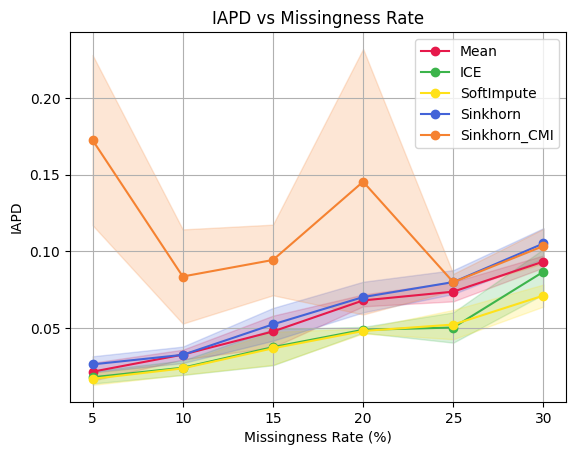

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5,10,15,20,25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
iapd_results_mnar = {
    'Mean': [mean_iapd_mnar5, mean_iapd_mnar10, mean_iapd_mnar15, mean_iapd_mnar20, mean_iapd_mnar25, mean_iapd_mnar30],
    'ICE': [ice_iapd_mnar5, ice_iapd_mnar10, ice_iapd_mnar15, ice_iapd_mnar20, ice_iapd_mnar25, ice_iapd_mnar30],
    'SoftImpute': [soft_iapd_mnar5, soft_iapd_mnar10, soft_iapd_mnar15, soft_iapd_mnar20, soft_iapd_mnar25, soft_iapd_mnar30],
    'Sinkhorn': [sk_iapd_mnar5, sk_iapd_mnar10, sk_iapd_mnar15, sk_iapd_mnar20, sk_iapd_mnar25,sk_iapd_mnar30],
    'Sinkhorn_CMI': [sk_cmi_iapd_mnar5,sk_cmi_iapd_mnar10,sk_cmi_iapd_mnar15,sk_cmi_iapd_mnar20,sk_cmi_iapd_mnar25,sk_cmi_iapd_mnar30]
}



fig, ax1 = plt.subplots()
# Now ax1 is a single Axes object



for i, algo in enumerate(algorithms):
    data = np.array(iapd_results_mnar[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('IAPD')
ax1.set_xlabel('Missingness Rate (%)')
ax1.set_title('IAPD vs Missingness Rate (MNAR)')
ax1.grid(True)
ax1.legend()



### Machine Learning

In [ ]:
k = 5  # Choose the number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)


In [ ]:
x = groundTruth.iloc[:, :-1]  # x is not scaled
y = groundTruth.iloc[:, -1]  # y is not scaled

30% MCAR

In [ ]:

missing_type = "MCAR"
missing_rate = 30
dependencies = None
highest_lamda_cmi = 30
niter = 5000
protected_index = 1
accuracy_sk_mcar30 = []
accuracy_sk_cmi_mcar30 = []
accuracy_mean_mcar30 = []
accuracy_ice_mcar30 = []
accuracy_soft_imp_mcar30 = []
demoP_sk_mcar30 = []
demoP_sk_cmi_mcar30 = []
demoP_mean_mcar30 = []
demoP_ice_mcar30 = []
demoP_soft_imp_mcar30 = []
equiod_sk_mcar30 = []
equiod_sk_cmi_mcar30 = []
equiod_mean_mcar30 = []
equiod_ice_mcar30 = []
equiod_soft_imp_mcar30 = []
bucket = {1:2} 


# X and Y is scaled to z-score

for fold, (train_index, test_index) in enumerate(kf.split(x)):
    x_train = x.iloc[train_index].reset_index(drop=True)  # No index numbers
    x_test = x.iloc[test_index].reset_index(drop=True)    # No index numbers
    y_train = y.iloc[train_index].reset_index(drop=True)  # No index numbers
    y_test = y.iloc[test_index].reset_index(drop=True)    # No index numbers

    #z-score

    scaler = StandardScaler()
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns) # converting x_trian and x_test to z-score
    x_test = scaler.transform(x_test)
   

    
    x_train_sk_imp_data, x_train_sk_cmi_imp_data, x_train_mean_imp_data, x_train_ice_imp_data, x_train_soft_imp_data = imputation(x_train, y_train, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    
   

    

    y_test = y_test.to_numpy()
    y_train = y_train.to_numpy()

    
    acc_sk, dp_sk, eod_sk = machineLearning(x_train_sk_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_sk_mcar30.append(eod_sk)
    accuracy_sk_mcar30.append(acc_sk)
    demoP_sk_mcar30.append(dp_sk)

    acc_sk_cmi, dp_sk_cmi, eod_sk_cmi = machineLearning(x_train_sk_cmi_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_sk_cmi_mcar30.append(eod_sk_cmi)
    accuracy_sk_cmi_mcar30.append(acc_sk_cmi)
    demoP_sk_cmi_mcar30.append(dp_sk_cmi)

    acc_mean, dp_mean, eod_mean = machineLearning(x_train_mean_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_mean_mcar30.append(eod_mean)
    accuracy_mean_mcar30.append(acc_mean)
    demoP_mean_mcar30.append(dp_mean)

    acc_ice, dp_ice, eod_ice = machineLearning(x_train_ice_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_ice_mcar30.append(eod_ice)
    accuracy_ice_mcar30.append(acc_ice)
    demoP_ice_mcar30.append(dp_ice)

    acc_soft_imp, dp_soft_imp, eod_soft_imp = machineLearning(x_train_soft_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_soft_imp_mcar30.append(eod_soft_imp)
    accuracy_soft_imp_mcar30.append(acc_soft_imp)
    demoP_soft_imp_mcar30.append(dp_soft_imp) 


INFO:root:batchsize = 128, epsilon = 0.4080
INFO:root:Iteration 0:	 Loss: 1.8731
INFO:root:Iteration 0:	 Loss: 2.0624


[[-1.4975383   0.         -1.7423915  ... -0.83441341 -0.38867084
  -1.11040502]
 [ 0.03553776  1.         -0.53612046 ... -0.83441341  0.06143132
   0.61090244]
 [-1.81792141  0.         -1.7423915  ... -0.83441341 -0.13482147
  -1.11040502]
 ...
 [-0.0821691   0.          0.67015058 ... -0.83441341  2.24291713
   0.61090244]
 [ 0.31796595  0.          0.18399093 ...  1.19844671  0.2432218
   0.61090244]
 [-1.71112704  0.         -0.53612046 ... -0.83441341  0.0095576
   0.10937485]]
[[-1.57220366  0.         -0.53315896 ... -0.84599688 -0.83473854
  -1.08005542]
 [ 0.026175    0.         -1.72025722 ... -0.84599688 -0.83473854
  -1.08005542]
 [-1.78532082  1.         -0.53315896 ... -0.84599688 -0.83473854
  -1.08005542]
 ...
 [ 0.34585073  1.          0.6539393  ...  1.18203745 -0.6523921
   0.604929  ]
 [-0.9328522   0.          1.84103756 ... -0.84599688  0.2593401
   0.604929  ]
 [ 0.34585073  1.         -1.72025722 ... -0.84599688 -0.83473854
   0.604929  ]]
[0. 0. 1. 0. 0. 0. 0

INFO:root:batchsize = 128, epsilon = 0.4104
INFO:root:Iteration 0:	 Loss: 2.0626
INFO:root:Iteration 0:	 Loss: 1.9687


[[-1.44409964  0.          0.0434353  ... -0.84604342 -0.3070531
  -1.04973197]
 [-0.48381937  1.         -0.50946432 ...  0.09267898  0.05723557
   0.18834271]
 [ 0.04966967  0.         -0.03517962 ... -0.84604342 -0.86499877
  -1.04973197]
 ...
 [ 0.36976309  0.         -0.12657896 ... -0.11412183  0.24168244
   0.56817176]
 [ 0.36976309  1.          0.0508131  ... -0.84604342 -0.86499877
   0.56817176]
 [-1.65749526  0.         -0.50946432 ... -0.28982656 -0.86499877
  -0.26128834]]
[[-1.72576442  0.         -1.69351227 ... -0.81847597 -0.83622761
  -1.0507024 ]
 [-0.57230817  1.          0.62747666 ...  1.22178297  0.57273059
   0.60349268]
 [-0.88688715  1.         -1.69351227 ... -0.81847597 -0.83622761
  -1.0507024 ]
 ...
 [ 0.47628842  1.          0.62747666 ...  1.22178297  1.79382769
   0.60349268]
 [ 0.26656911  0.         -1.69351227 ... -0.81847597 -0.83622761
   2.25768777]
 [ 0.16170945  1.         -1.69351227 ... -0.81847597  0.29093895
  -1.0507024 ]]
[0. 1. 1. 1. 0. 0

INFO:root:batchsize = 128, epsilon = 0.4085
INFO:root:Iteration 0:	 Loss: 2.0431
INFO:root:Iteration 0:	 Loss: 1.8239


[[-0.48616553  1.         -0.08232872 ... -0.78776099  0.10379823
   0.58525552]
 [-1.76121163  0.         -1.79125518 ... -0.78776099 -0.80993203
  -0.98069843]
 [-0.59241938  1.          0.6698178  ...  0.42661211  0.23069028
   0.41237101]
 ...
 [ 0.23945996  0.          0.39032343 ... -0.19435051  0.28654428
   0.58525552]
 [ 0.10828703  0.          0.6698178  ... -0.78776099  2.29675084
   0.58525552]
 [ 0.36386519  0.         -1.79125518 ... -0.78776099 -0.80993203
   0.58525552]]
[[-1.45216045  0.         -1.72740741 ... -0.81501608 -0.82123745
  -1.02496347]
 [-1.77384255  0.          0.63641326 ...  1.22696966  0.59950059
   0.59105445]
 [-1.66661518  0.          0.63641326 ... -0.81501608 -0.82123745
   0.59105445]
 ...
 [ 1.01406896  1.          0.63641326 ...  1.22696966 -0.82123745
   0.59105445]
 [ 0.37070477  0.          0.63641326 ...  1.22696966  0.31535298
   0.59105445]
 [-1.66661518  0.         -0.54549708 ... -0.81501608 -0.82123745
  -1.02496347]]
[0. 0. 0. 1. 0. 

INFO:root:batchsize = 128, epsilon = 0.4108
INFO:root:Iteration 0:	 Loss: 2.2192
INFO:root:Iteration 0:	 Loss: 2.3084


[[-1.48244723  0.         -1.75723628 ... -0.79582243 -0.83616312
  -0.29061359]
 [ 0.17210947  0.         -0.05212044 ... -0.79582243 -0.83616312
  -1.04295683]
 [-0.02988282  0.          0.21118362 ... -0.03300928  0.59559646
   0.10747826]
 ...
 [ 0.36637989  0.          0.61321487 ...  1.25656172  0.30924455
   0.61067867]
 [ 0.36637989  1.         -1.75723628 ... -0.79582243 -0.83616312
   0.61067867]
 [ 0.09160372  0.         -0.57201071 ... -0.79582243 -0.24759068
  -1.04295683]]
[[-0.45357081  1.         -0.51267508 ... -0.81501608  0.11800232
   0.58554834]
 [ 0.0752114   0.         -0.51267508 ... -0.81501608 -0.83851061
  -1.05446306]
 [-0.45357081  0.          0.65697104 ...  1.22696966  0.11800232
   0.58554834]
 ...
 [ 1.45004515  0.         -0.51267508 ... -0.81501608 -0.07330027
   0.58554834]
 [-1.29962235  0.         -1.6823212  ... -0.81501608 -0.83851061
  -1.05446306]
 [ 1.5558016   0.          0.65697104 ... -0.81501608  2.41363335
   0.58554834]]
[1. 0. 0. 1. 1. 

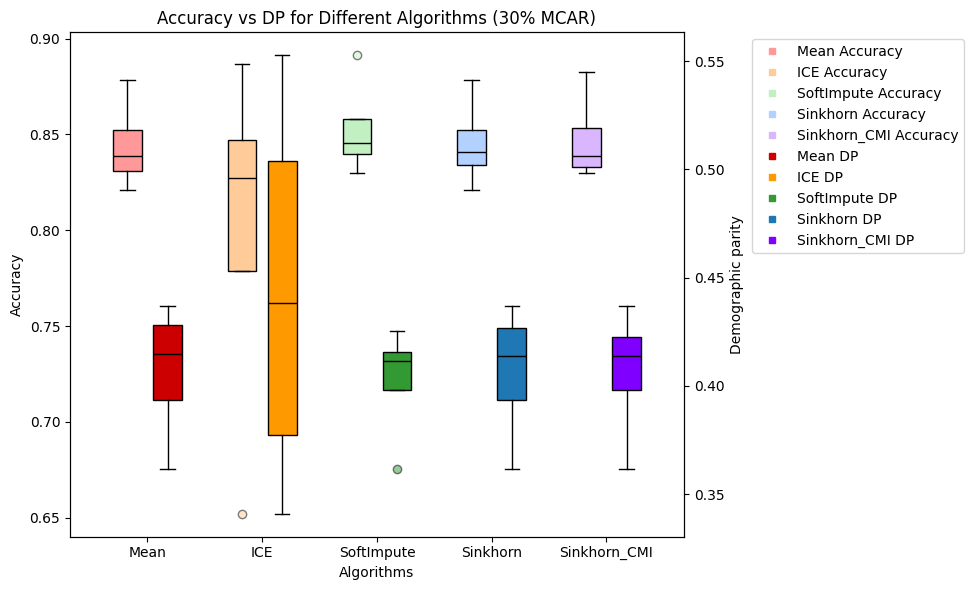

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
accuracy_mcar30 = {
    'Mean': accuracy_mean_mcar30,
    'ICE': accuracy_ice_mcar30,
    'SoftImpute': accuracy_soft_imp_mcar30,
    'Sinkhorn': accuracy_sk_mcar30,
    'Sinkhorn_CMI': accuracy_sk_cmi_mcar30
}
dp_mcar30 = {
    'Mean': demoP_mean_mcar30,
    'ICE': demoP_ice_mcar30,
    'SoftImpute': demoP_soft_imp_mcar30,
    'Sinkhorn': demoP_sk_mcar30,
    'Sinkhorn_CMI': demoP_sk_cmi_mcar30
}




# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    accuracy_vals = accuracy_mcar30[algo]
    dp_vals = dp_mcar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(accuracy_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(dp_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy', color='black')
ax2.set_ylabel('Demographic parity', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('Accuracy vs DP for Different Algorithms (30% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} Accuracy')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} DP')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


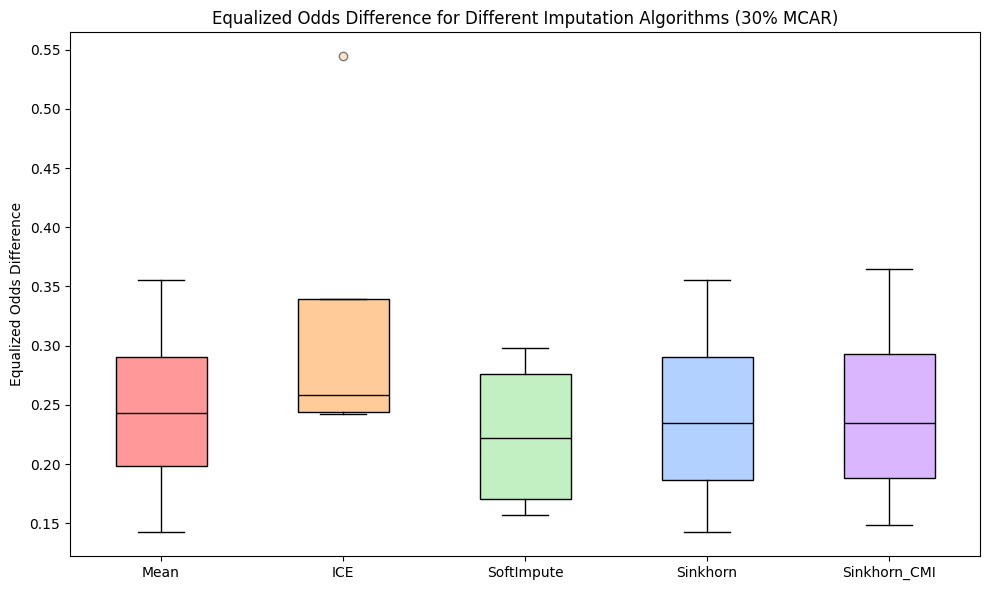

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with your actual EOD results (lists or numpy arrays)
eod_mcar30 = {
    'Mean': equiod_mean_mcar30,
    'ICE': equiod_ice_mcar30,
    'SoftImpute': equiod_soft_imp_mcar30,
    'Sinkhorn': equiod_sk_mcar30,
    'Sinkhorn_CMI': equiod_sk_cmi_mcar30
}

# Colors for EOD
colors = ['#ff9999', '#ffcc99', '#c2f0c2', '#b3d1ff', '#dab6ff']

# Create boxplot
x = np.arange(len(algorithms))

fig, ax = plt.subplots(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    eod_vals = eod_mcar30[algo]
    ax.boxplot(eod_vals, positions=[x[i]], widths=0.5, patch_artist=True,
               boxprops=dict(facecolor=colors[i], color='black'),
               medianprops=dict(color='black'),
               capprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               flierprops=dict(markerfacecolor=colors[i], marker='o', alpha=0.5))

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylabel('Equalized Odds Difference')
ax.set_title('Equalized Odds Difference for Different Imputation Algorithms (30% MCAR)')

plt.tight_layout()
plt.show()


30% MAR

In [ ]:

missing_type = "MAR"
missing_rate = 30
dependencies = dependencies_mar
highest_lamda_cmi = 30
niter = 5000
protected_index = 1
accuracy_sk_mar30 = []
accuracy_sk_cmi_mar30 = []
accuracy_mean_mar30 = []
accuracy_ice_mar30 = []
accuracy_soft_imp_mar30 = []
demoP_sk_mar30 = []
demoP_sk_cmi_mar30 = []
demoP_mean_mar30 = []
demoP_ice_mar30 = []
demoP_soft_imp_mar30 = []
equiod_sk_mar30 = []
equiod_sk_cmi_mar30 = []
equiod_mean_mar30 = []
equiod_ice_mar30 = []
equiod_soft_imp_mar30 = []
bucket = {1:2} 


# X and Y is scaled to z-score

for fold, (train_index, test_index) in enumerate(kf.split(x)):
    x_train = x.iloc[train_index].reset_index(drop=True)  # No index numbers
    x_test = x.iloc[test_index].reset_index(drop=True)    # No index numbers
    y_train = y.iloc[train_index].reset_index(drop=True)  # No index numbers
    y_test = y.iloc[test_index].reset_index(drop=True)    # No index numbers

    #z-score

    scaler = StandardScaler()
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
    x_test = scaler.transform(x_test)
   

    
    x_train_sk_imp_data, x_train_sk_cmi_imp_data, x_train_mean_imp_data, x_train_ice_imp_data, x_train_soft_imp_data = imputation(x_train, y_train, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    
   

    

    y_test = y_test.to_numpy()
    y_train = y_train.to_numpy()

    
    acc_sk, dp_sk, eod_sk = machineLearning(x_train_sk_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_mar30.append(eod_sk)
    accuracy_sk_mar30.append(acc_sk)
    demoP_sk_mar30.append(dp_sk)

    acc_sk_cmi, dp_sk_cmi, eod_sk_cmi = machineLearning(x_train_sk_cmi_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_cmi_mar30.append(eod_sk_cmi)
    accuracy_sk_cmi_mar30.append(acc_sk_cmi)
    demoP_sk_cmi_mar30.append(dp_sk_cmi)

    acc_mean, dp_mean, eod_mean = machineLearning(x_train_mean_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_mean_mar30.append(eod_mean)
    accuracy_mean_mar30.append(acc_mean)
    demoP_mean_mar30.append(dp_mean)

    acc_ice, dp_ice, eod_ice = machineLearning(x_train_ice_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_ice_mar30.append(eod_ice)
    accuracy_ice_mar30.append(acc_ice)
    demoP_ice_mar30.append(dp_ice)

    acc_soft_imp, dp_soft_imp, eod_soft_imp = machineLearning(x_train_soft_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_soft_imp_mar30.append(eod_soft_imp)
    accuracy_soft_imp_mar30.append(acc_soft_imp)
    demoP_soft_imp_mar30.append(dp_soft_imp) 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
accuracy_mar30 = {
    'Mean': accuracy_mean_mar30,
    'ICE': accuracy_ice_mar30,
    'SoftImpute': accuracy_soft_imp_mar30,
    'Sinkhorn': accuracy_sk_mar30,
    'Sinkhorn_CMI': accuracy_sk_cmi_mar30
}
dp_mar30 = {
    'Mean': demoP_mean_mar30,
    'ICE': demoP_ice_mar30,
    'SoftImpute': demoP_soft_imp_mar30,
    'Sinkhorn': demoP_sk_mar30,
    'Sinkhorn_CMI': demoP_sk_cmi_mar30
}




# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    accuracy_vals = accuracy_mar30[algo]
    dp_vals = dp_mar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(accuracy_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(dp_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy', color='black')
ax2.set_ylabel('Demographic parity', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('Accuracy vs DP for Different Algorithms (30% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} Accuracy')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} DP')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'accuracy_mean_mar30' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with your actual EOD results (lists or numpy arrays)
eod_mar30 = {
    'Mean': equiod_mean_mar30,
    'ICE': equiod_ice_mar30,
    'SoftImpute': equiod_soft_imp_mar30,
    'Sinkhorn': equiod_sk_mar30,
    'Sinkhorn_CMI': equiod_sk_cmi_mar30
}

# Colors for EOD
colors = ['#ff9999', '#ffcc99', '#c2f0c2', '#b3d1ff', '#dab6ff']

# Create boxplot
x = np.arange(len(algorithms))

fig, ax = plt.subplots(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    eod_vals = eod_mar30[algo]
    ax.boxplot(eod_vals, positions=[x[i]], widths=0.5, patch_artist=True,
               boxprops=dict(facecolor=colors[i], color='black'),
               medianprops=dict(color='black'),
               capprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               flierprops=dict(markerfacecolor=colors[i], marker='o', alpha=0.5))

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylabel('Equalized Odds Difference')
ax.set_title('Equalized Odds Difference for Different Imputation Algorithms (30% MAR)')

plt.tight_layout()
plt.show()


30% MNAR

In [ ]:

missing_type = "MNAR"
missing_rate = 30
dependencies = dependencies_mnar
highest_lamda_cmi = 30
niter = 5000
protected_index = 1
accuracy_sk_mnar30 = []
accuracy_sk_cmi_mnar30 = []
accuracy_mean_mnar30 = []
accuracy_ice_mnar30 = []
accuracy_soft_imp_mnar30 = []
demoP_sk_mnar30 = []
demoP_sk_cmi_mnar30 = []
demoP_mean_mnar30 = []
demoP_ice_mnar30 = []
demoP_soft_imp_mnar30 = []
equiod_sk_mnar30 = []
equiod_sk_cmi_mnar30 = []
equiod_mean_mnar30 = []
equiod_ice_mnar30 = []
equiod_soft_imp_mnar30 = []
bucket = {1:2} 


# X and Y is scaled to z-score

for fold, (train_index, test_index) in enumerate(kf.split(x)):
    x_train = x.iloc[train_index].reset_index(drop=True)  # No index numbers
    x_test = x.iloc[test_index].reset_index(drop=True)    # No index numbers
    y_train = y.iloc[train_index].reset_index(drop=True)  # No index numbers
    y_test = y.iloc[test_index].reset_index(drop=True)    # No index numbers

    #z-score

    scaler = StandardScaler()
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
    x_test = scaler.transform(x_test)
   

    
    x_train_sk_imp_data, x_train_sk_cmi_imp_data, x_train_mean_imp_data, x_train_ice_imp_data, x_train_soft_imp_data = imputation(x_train, y_train, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    
   

    

    y_test = y_test.to_numpy()
    y_train = y_train.to_numpy()

    
    acc_sk, dp_sk, eod_sk = machineLearning(x_train_sk_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_mnar30.append(eod_sk)
    accuracy_sk_mnar30.append(acc_sk)
    demoP_sk_mnar30.append(dp_sk)

    acc_sk_cmi, dp_sk_cmi, eod_sk_cmi = machineLearning(x_train_sk_cmi_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_cmi_mnar30.append(eod_sk_cmi)
    accuracy_sk_cmi_mnar30.append(acc_sk_cmi)
    demoP_sk_cmi_mnar30.append(dp_sk_cmi)

    acc_mean, dp_mean, eod_mean = machineLearning(x_train_mean_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_mean_mnar30.append(eod_mean)
    accuracy_mean_mnar30.append(acc_mean)
    demoP_mean_mnar30.append(dp_mean)

    acc_ice, dp_ice, eod_ice = machineLearning(x_train_ice_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_ice_mnar30.append(eod_ice)
    accuracy_ice_mnar30.append(acc_ice)
    demoP_ice_mnar30.append(dp_ice)

    acc_soft_imp, dp_soft_imp, eod_soft_imp = machineLearning(x_train_soft_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_soft_imp_mnar30.append(eod_soft_imp)
    accuracy_soft_imp_mnar30.append(acc_soft_imp)
    demoP_soft_imp_mnar30.append(dp_soft_imp) 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
accuracy_mnar30 = {
    'Mean': accuracy_mean_mnar30,
    'ICE': accuracy_ice_mnar30,
    'SoftImpute': accuracy_soft_imp_mnar30,
    'Sinkhorn': accuracy_sk_mnar30,
    'Sinkhorn_CMI': accuracy_sk_cmi_mnar30
}
dp_mnar30 = {
    'Mean': demoP_mean_mnar30,
    'ICE': demoP_ice_mnar30,
    'SoftImpute': demoP_soft_imp_mnar30,
    'Sinkhorn': demoP_sk_mnar30,
    'Sinkhorn_CMI': demoP_sk_cmi_mnar30
}




# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    accuracy_vals = accuracy_mnar30[algo]
    dp_vals = dp_mnar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(accuracy_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(dp_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy', color='black')
ax2.set_ylabel('Demographic parity', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('Accuracy vs DP for Different Algorithms (30% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} Accuracy')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} DP')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'accuracy_mean_mar30' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with your actual EOD results (lists or numpy arrays)
eod_mnar30 = {
    'Mean': equiod_mean_mnar30,
    'ICE': equiod_ice_mnar30,
    'SoftImpute': equiod_soft_imp_mnar30,
    'Sinkhorn': equiod_sk_mnar30,
    'Sinkhorn_CMI': equiod_sk_cmi_mnar30
}

# Colors for EOD
colors = ['#ff9999', '#ffcc99', '#c2f0c2', '#b3d1ff', '#dab6ff']

# Create boxplot
x = np.arange(len(algorithms))

fig, ax = plt.subplots(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    eod_vals = eod_mnar30[algo]
    ax.boxplot(eod_vals, positions=[x[i]], widths=0.5, patch_artist=True,
               boxprops=dict(facecolor=colors[i], color='black'),
               medianprops=dict(color='black'),
               capprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               flierprops=dict(markerfacecolor=colors[i], marker='o', alpha=0.5))

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylabel('Equalized Odds Difference')
ax.set_title('Equalized Odds Difference for Different Imputation Algorithms (30% MNAR)')

plt.tight_layout()
plt.show()
